In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist

from plotter import *

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagWeightUp','btagWeightDown','btagEffStatUp','btagEffStatDown',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
               'PS_weightUp','PS_weightDown'
              ]

In [3]:
year = '2016'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

In [4]:
# Load all files
for n in range(1,nfiles+1):

    with open('infiles-split/'+year+'_'+str(n)+'.json') as f:
      infiles = json.load(f)
    
    filename = '/myeosdir/inclusive/outfiles/'+year+'_'+str(n)+'.coffea'
    #filename = 'outfiles/'+year+'_'+str(n)+'.coffea'
    if os.path.isfile(filename):
        out = util.load(filename)
        outsum.add(out)
    else:
        print(n,infiles.keys())
        #print("File " + filename + " is missing")
        
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
outsum['templates'].scale(scale_lumi, 'dataset')

In [5]:
templates = outsum['templates'].group('dataset', hist.Cat('process', 'Process'), pmap)
templates.sum('pt1','msd1','ddb1').integrate('region','signal').integrate('systematic', 'nominal').values()

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f19ce8371c0>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


{('ZH',): array(1.01398058),
 ('WH',): array(0.55456365),
 ('VBF',): array(39.65404332),
 ('ggF',): array(79.83782764),
 ('ggF-powheg',): array(203.62061428),
 ('QCD',): array(5383997.77016793),
 ('VV',): array(1409.59445743),
 ('Wjets',): array(128068.41064864),
 ('Zjets',): array(34463.67838772),
 ('ttbar',): array(21302.55858533),
 ('singlet',): array(3365.38731466),
 ('data',): array(5253870.),
 ('muondata',): array(91381.)}

In [6]:
mc = ['QCD','Wjets','Zjets','ttbar','singlet','VV','ggF','WH','ZH']#,'VBF','ttH']

In [7]:
h = templates.sum('pt1','ddb1').integrate('region', 'signal')
g = templates.sum('pt1').integrate('ddb1',int_range=slice(0.89,1)).integrate('region', 'signal')

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])


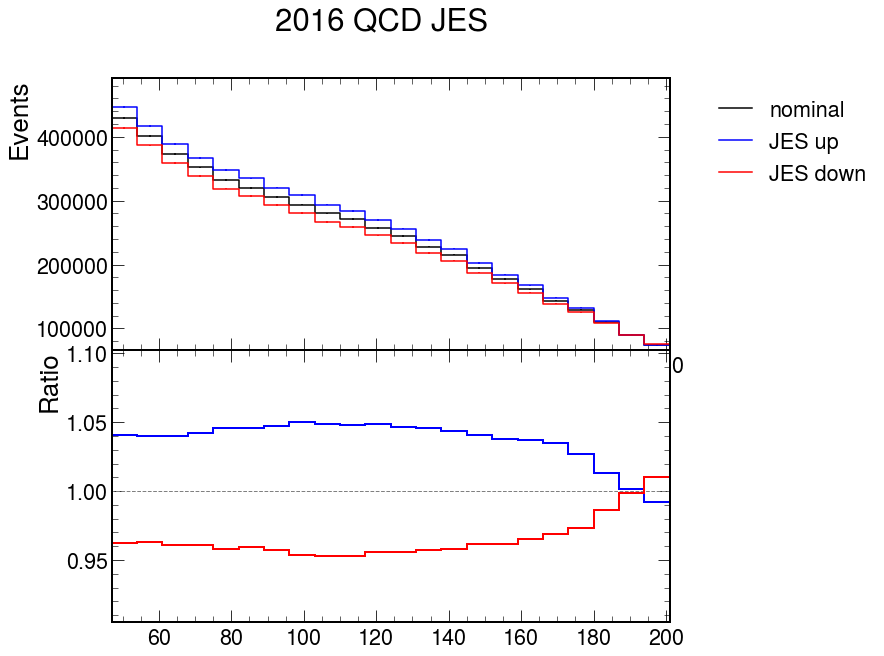

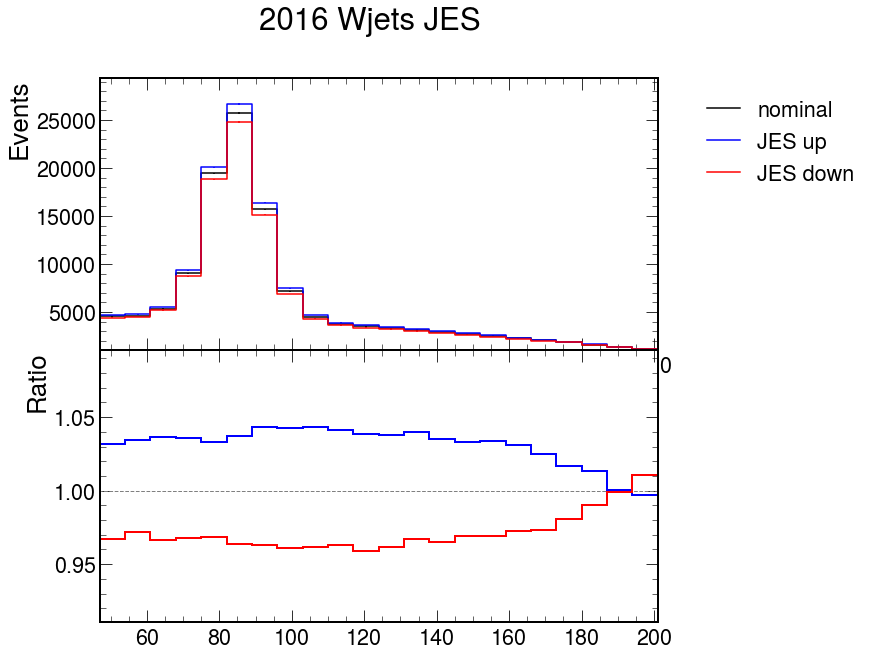

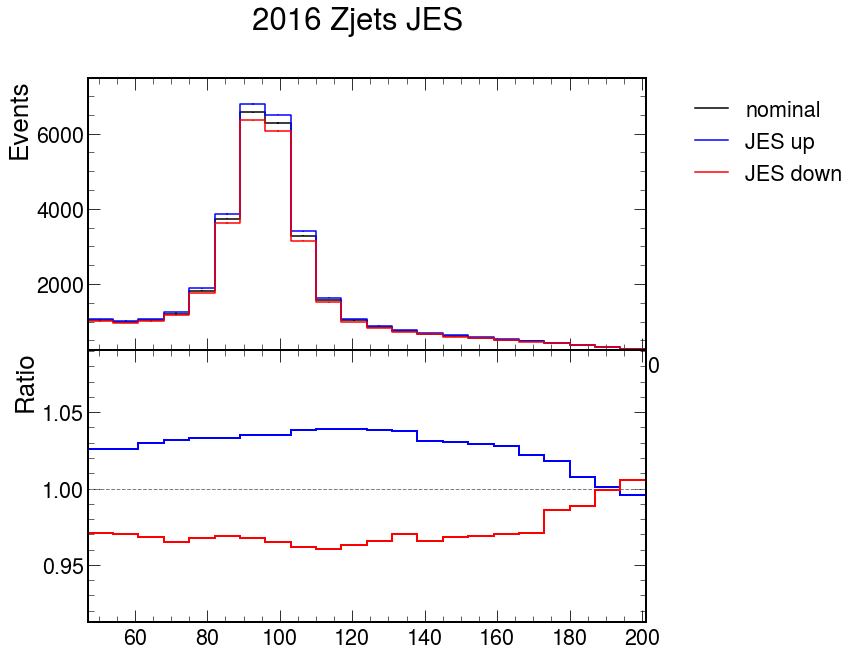

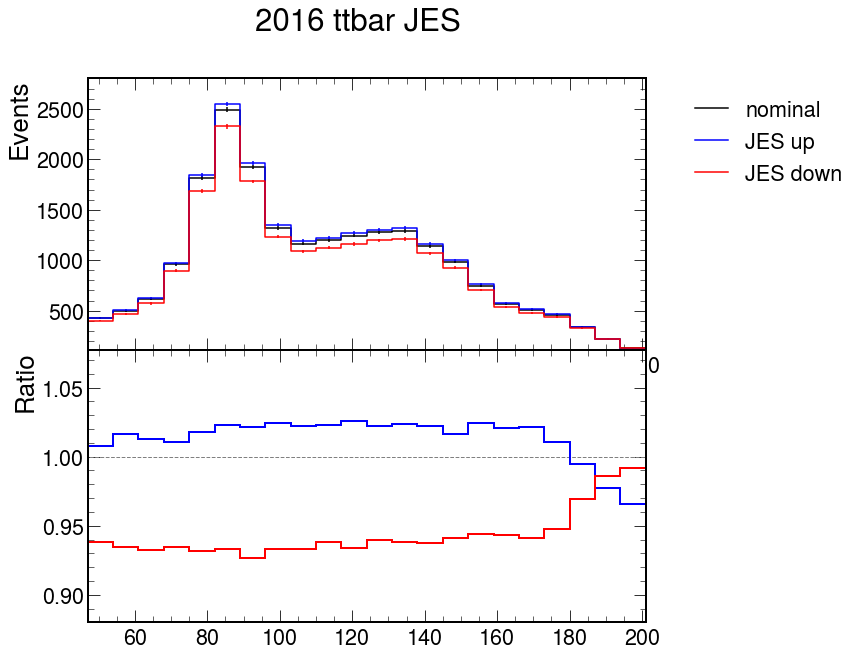

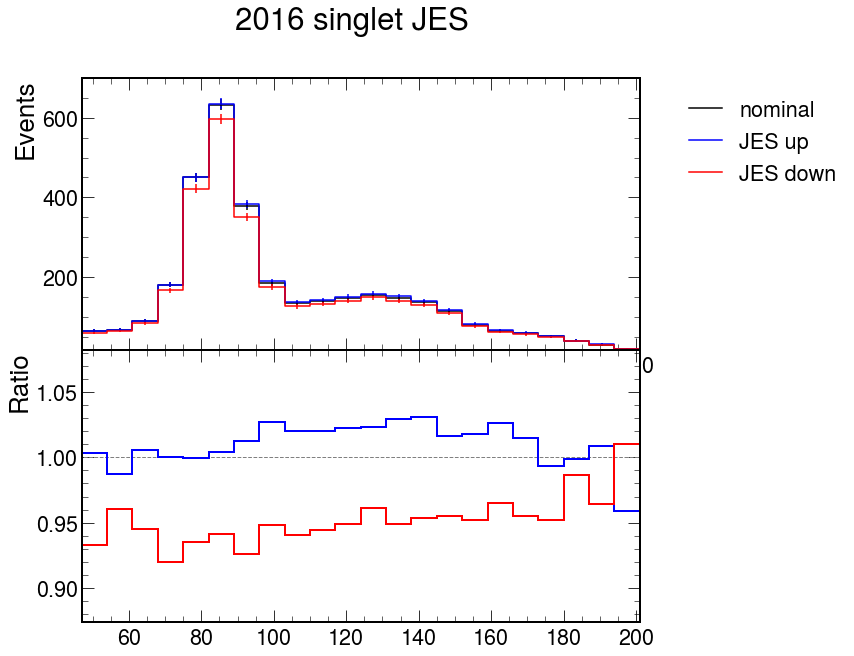

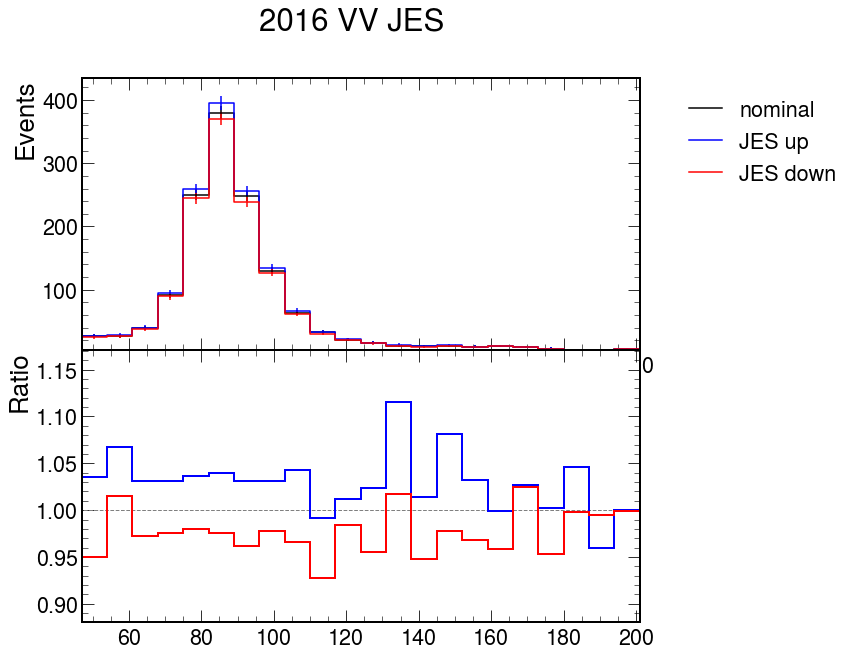

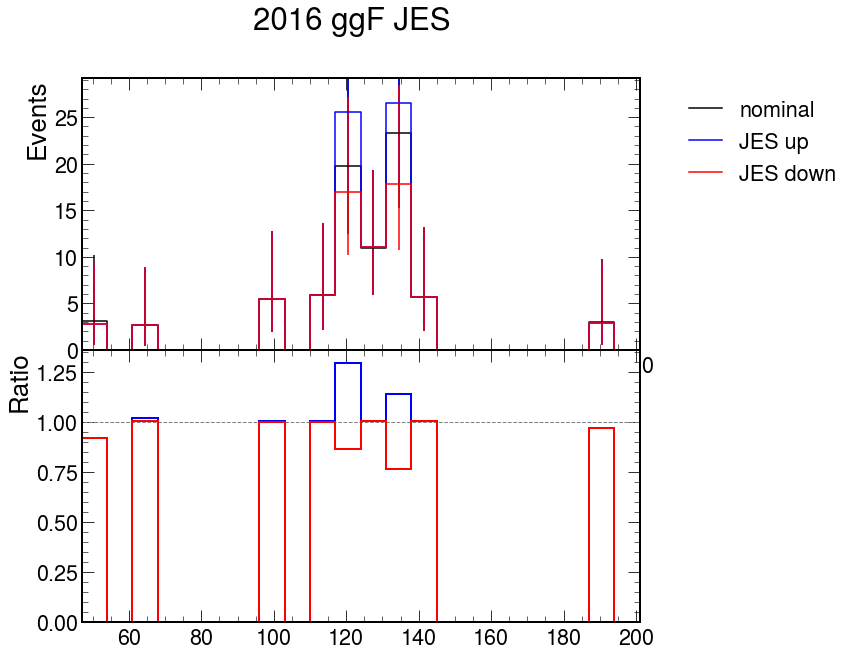

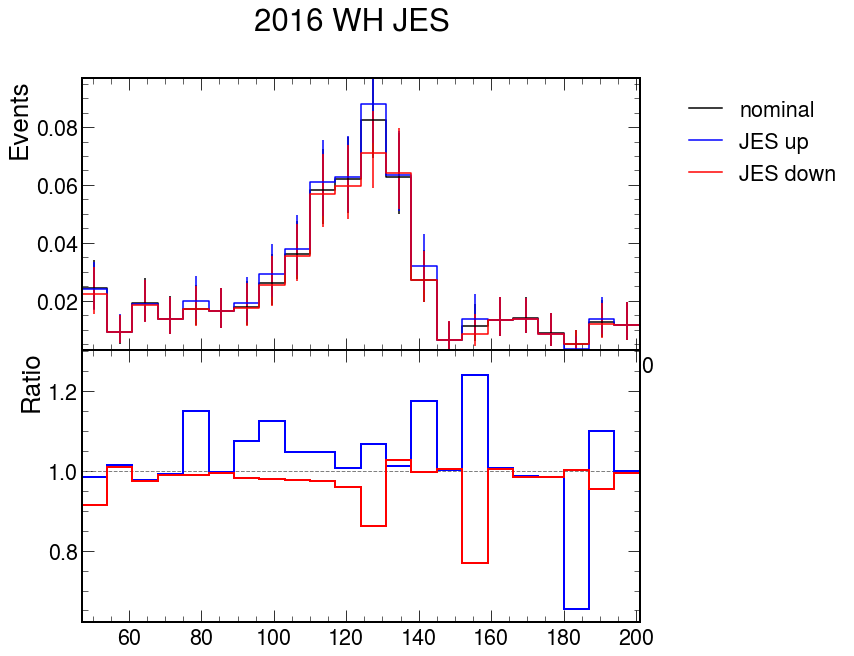

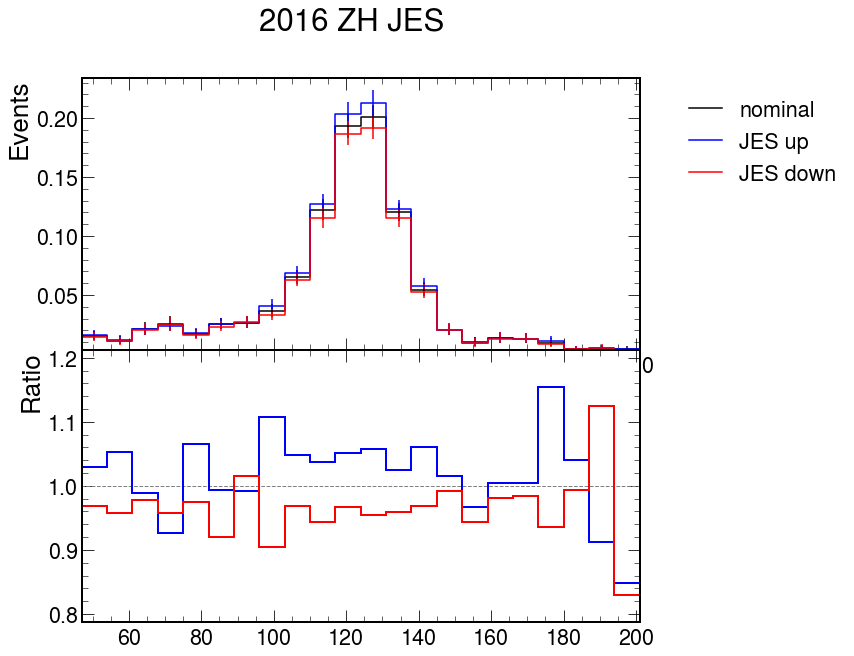

In [8]:
for p in mc:
    plot_syst(h.integrate('process',p),'JES',year + ' ' + p + ' JES', year+'/syst_JES/'+p)

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i i

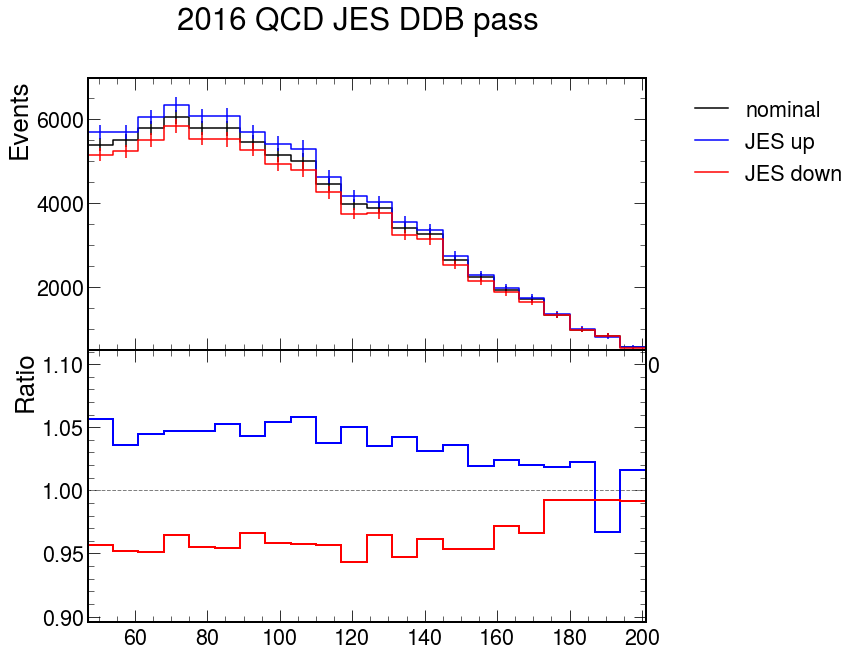

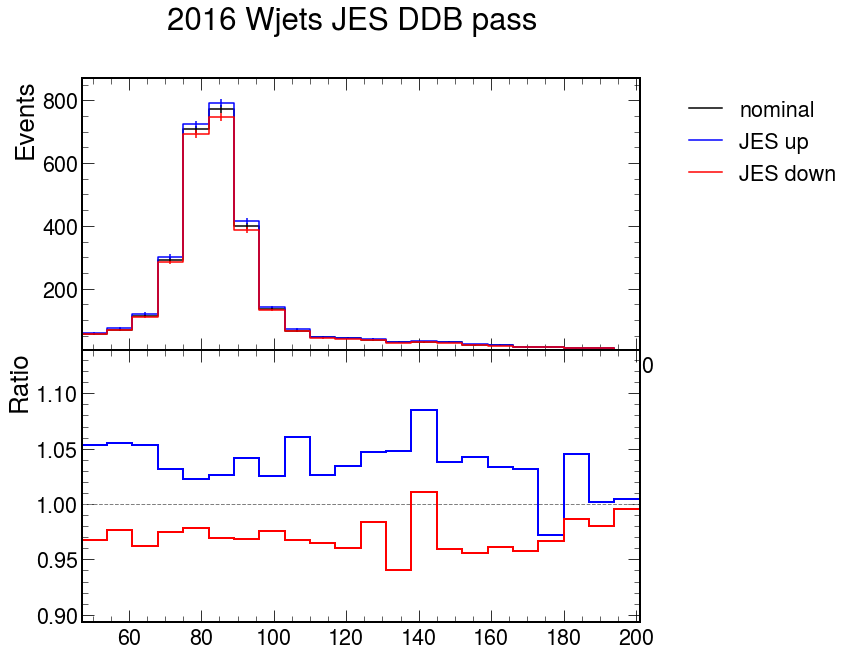

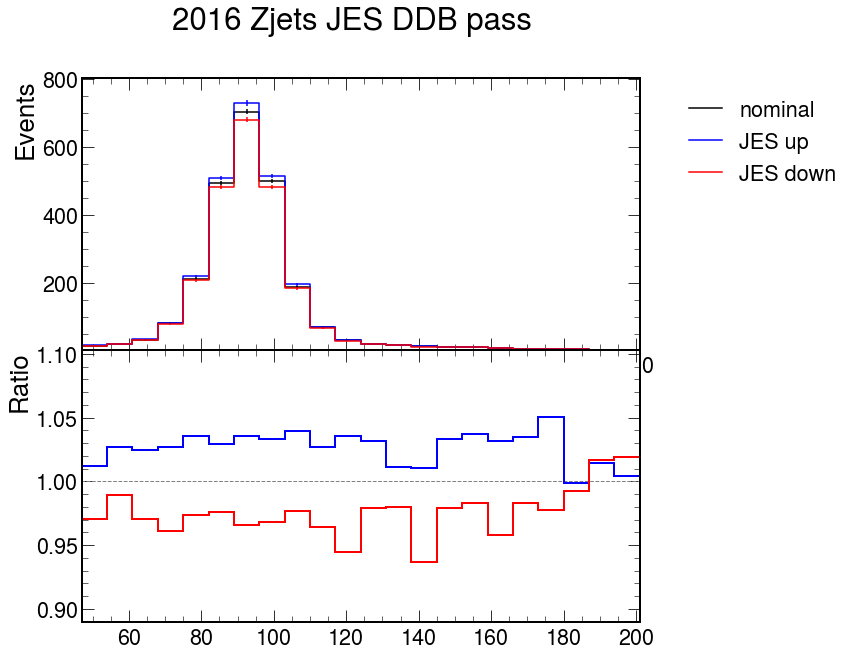

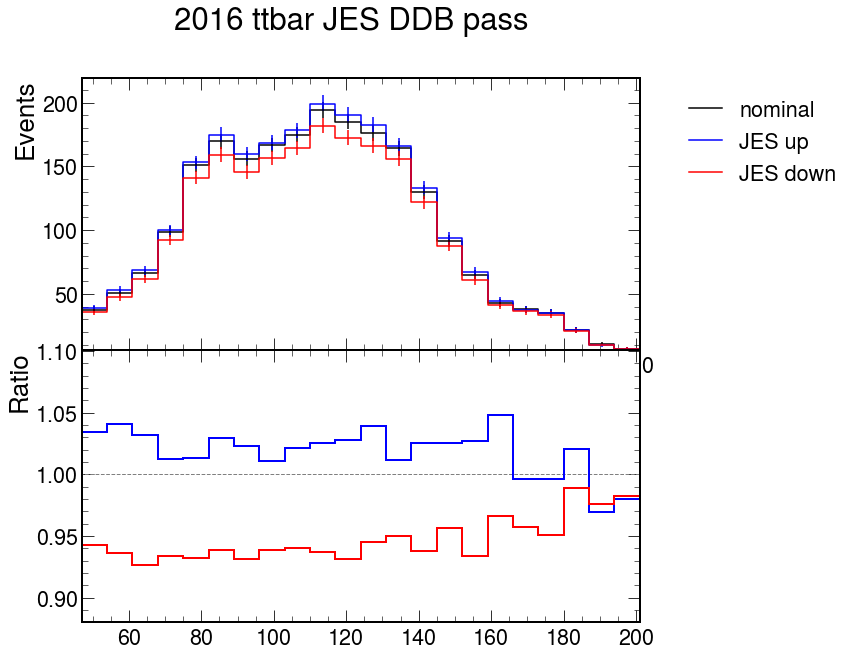

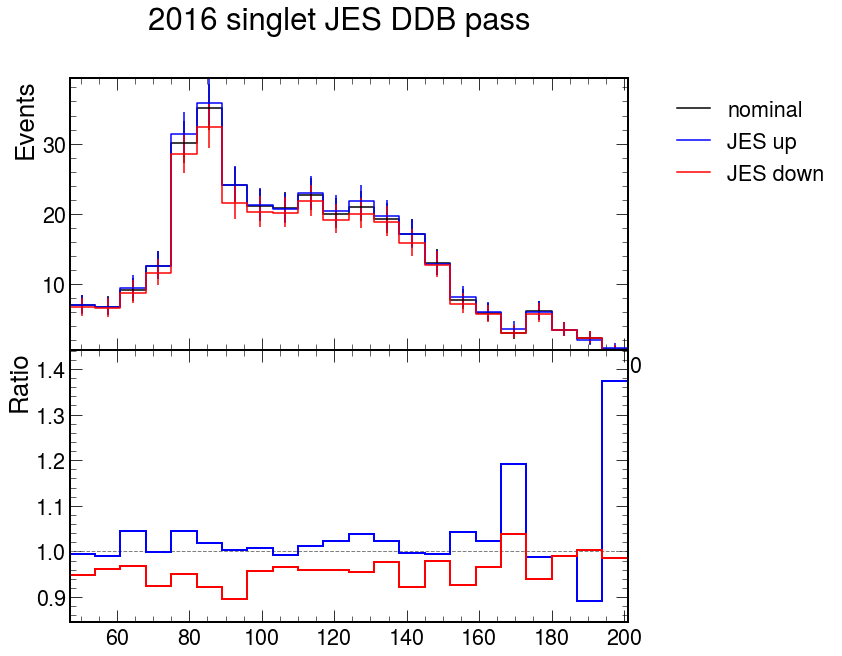

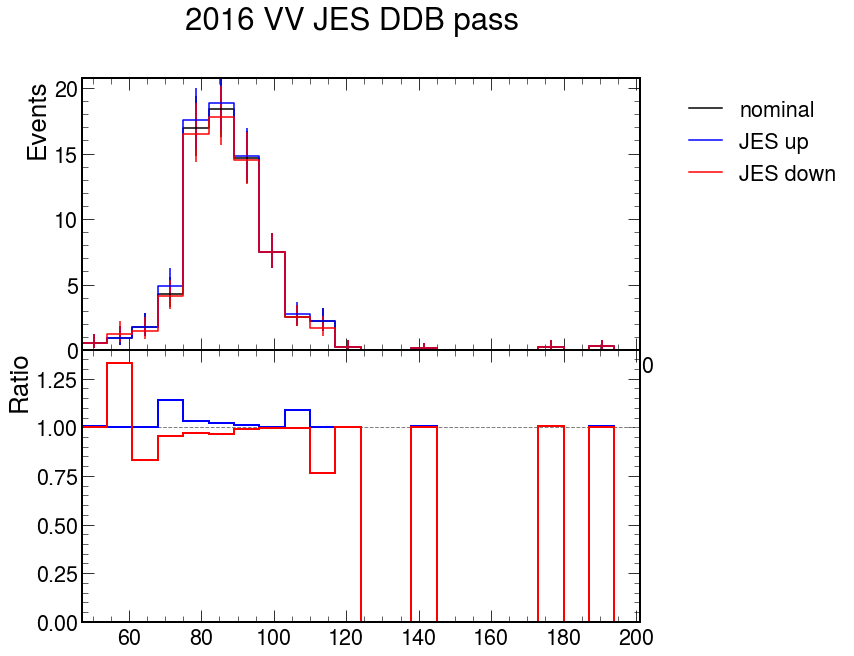

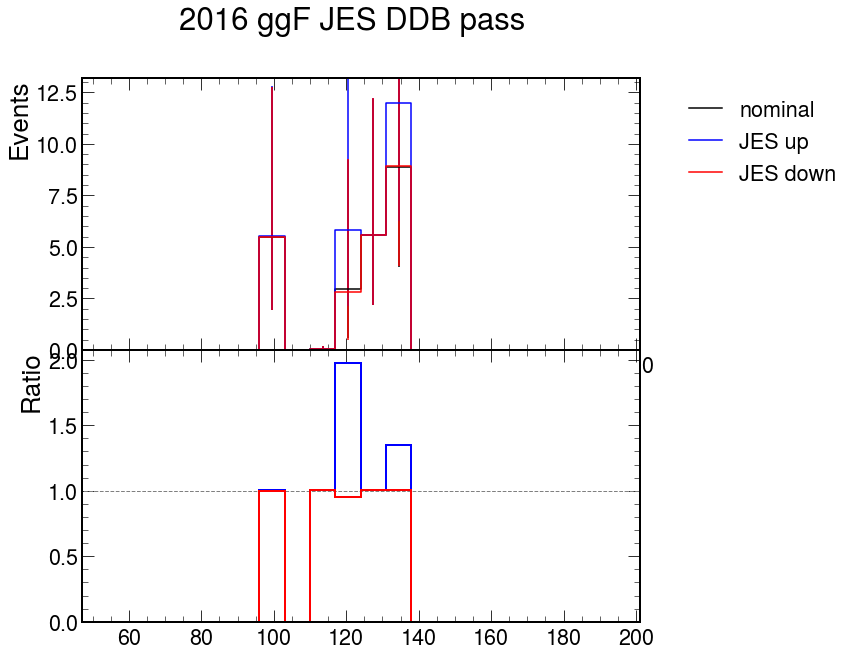

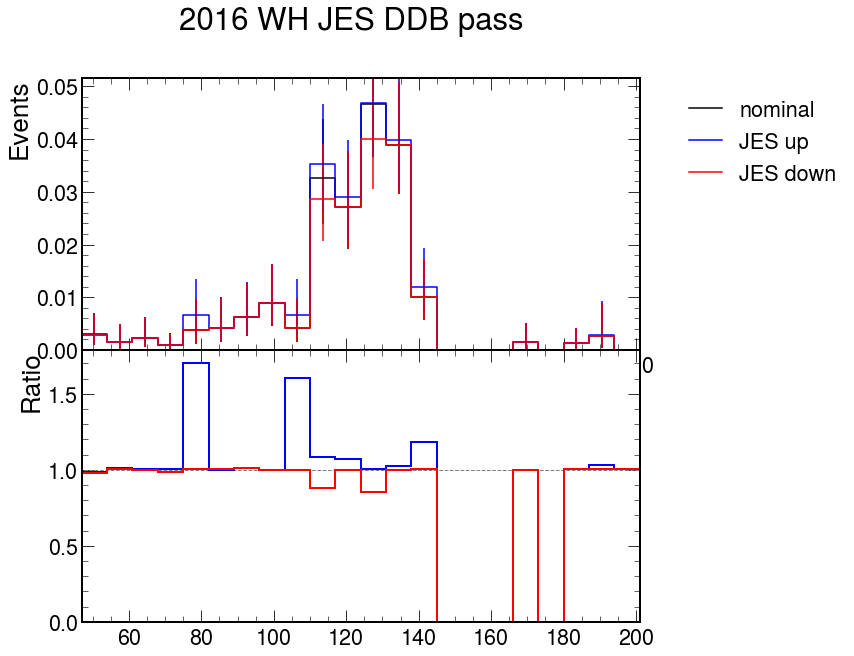

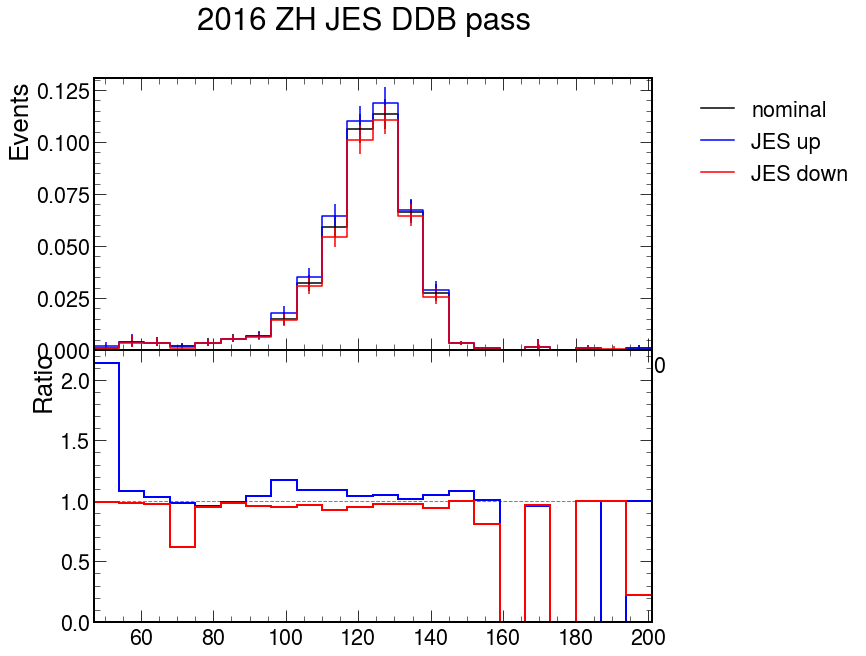

In [9]:
for p in mc:
    plot_syst(g.integrate('process',p),'JES',year + ' ' + p + ' JES DDB pass', year+'/syst_JES/'+p+"_pass")

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])


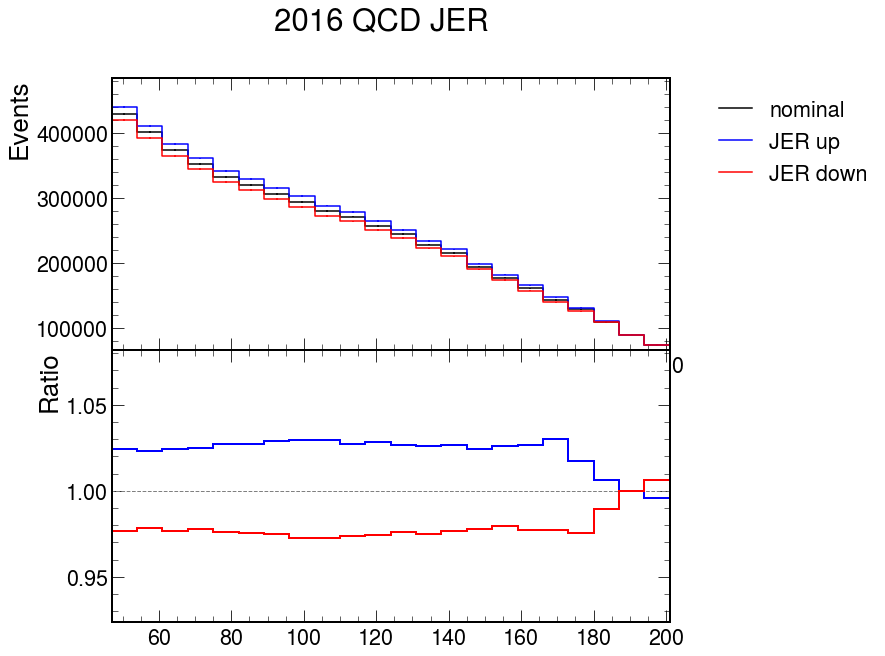

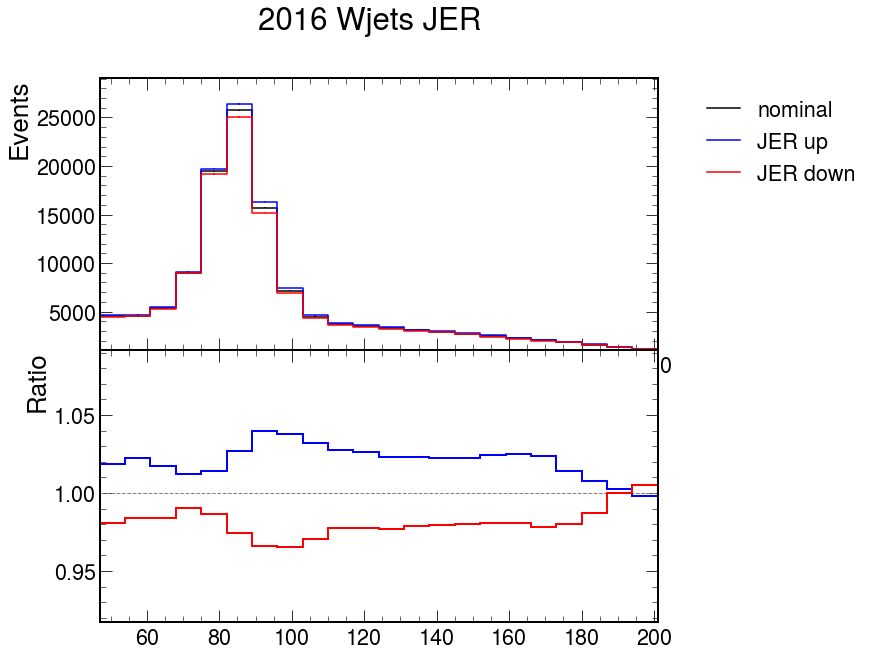

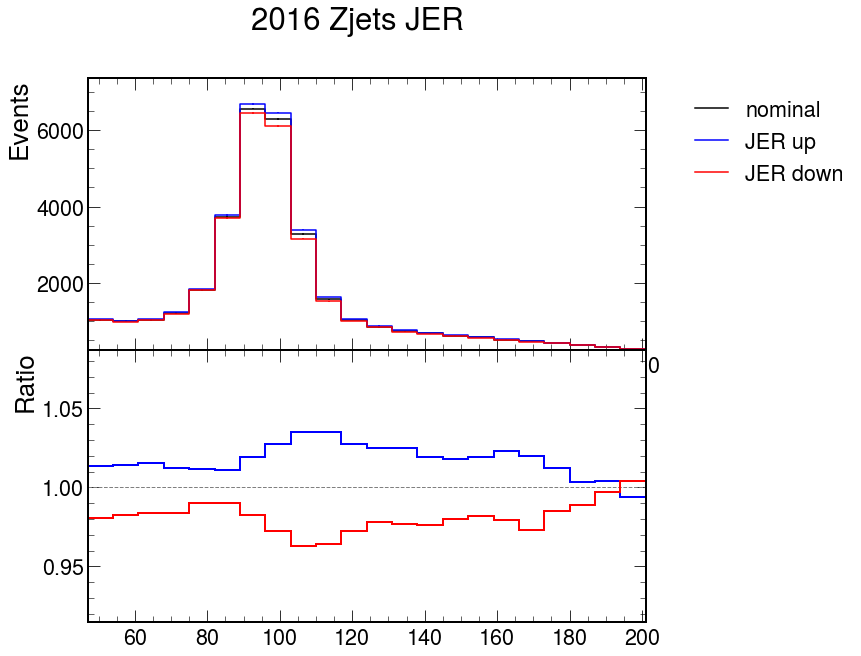

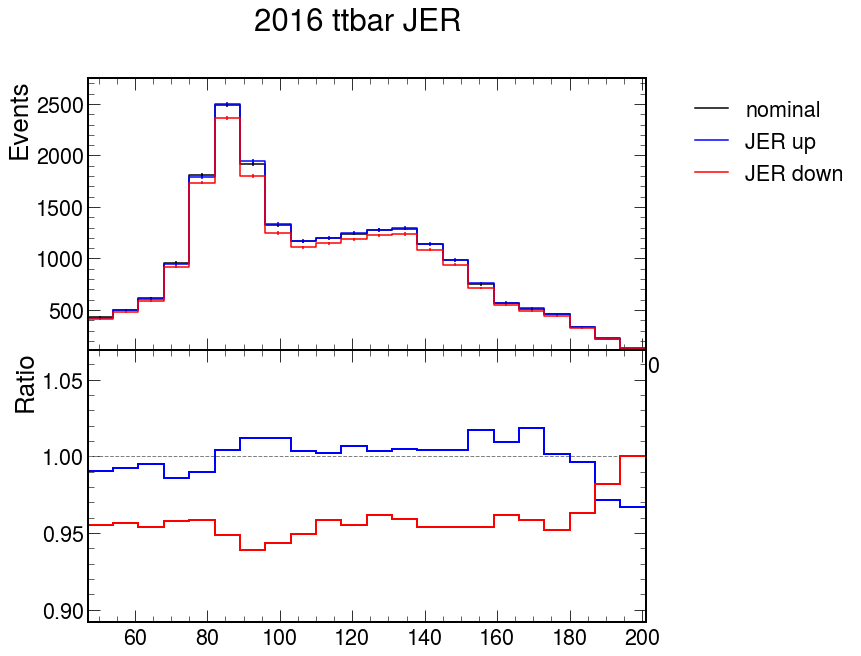

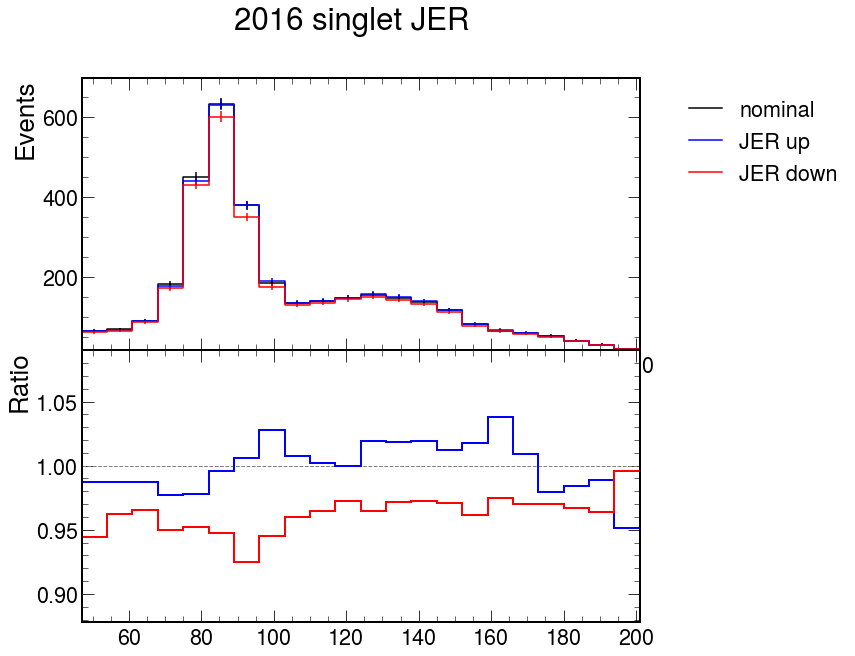

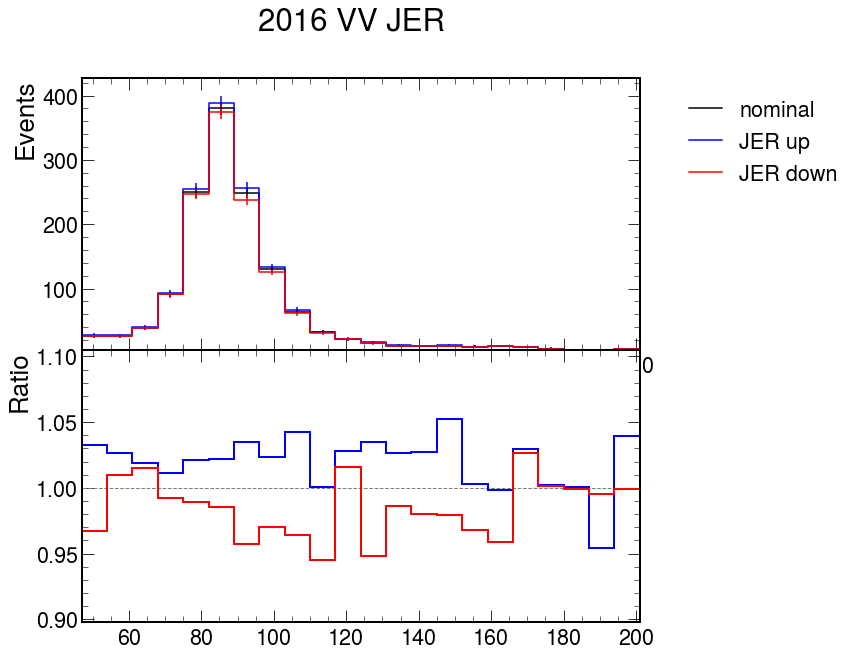

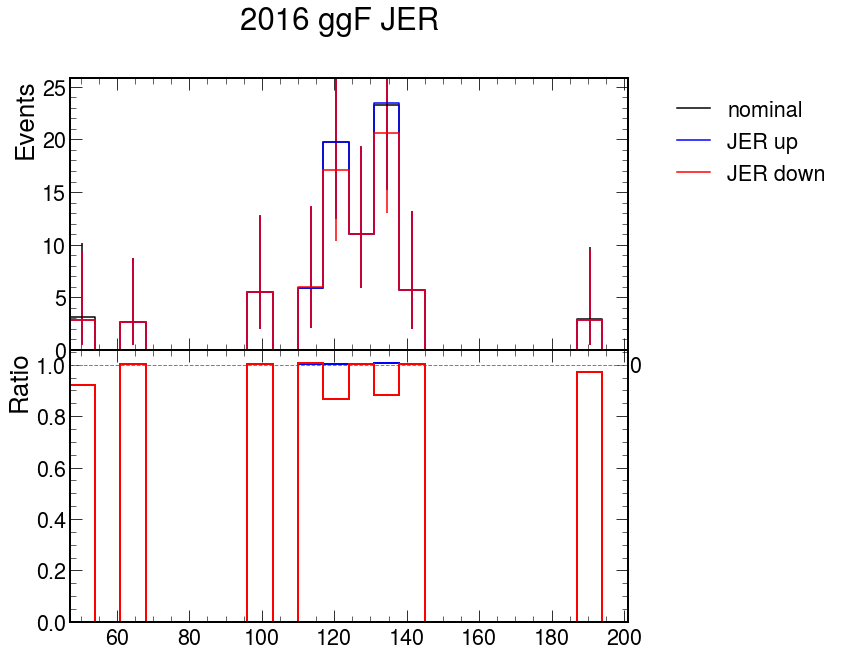

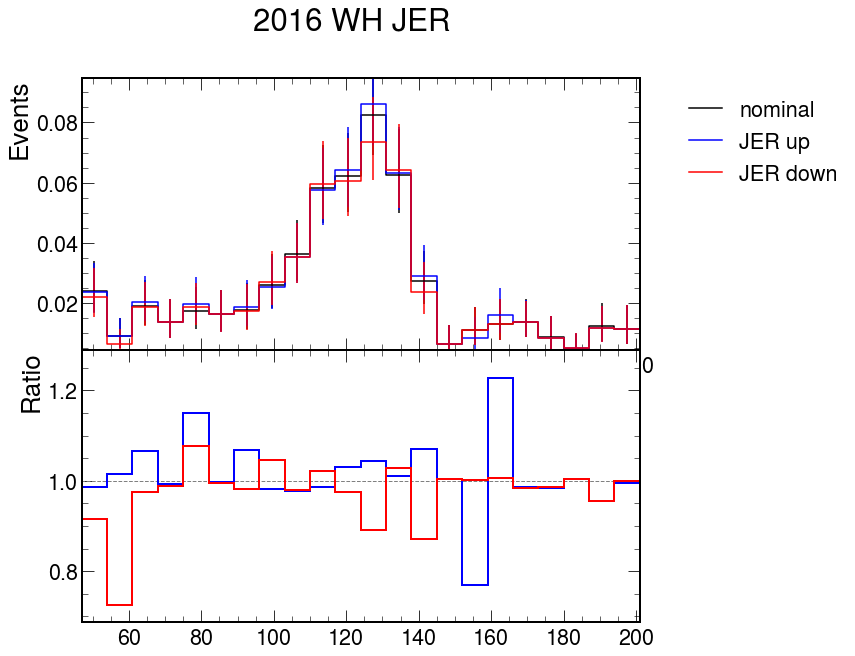

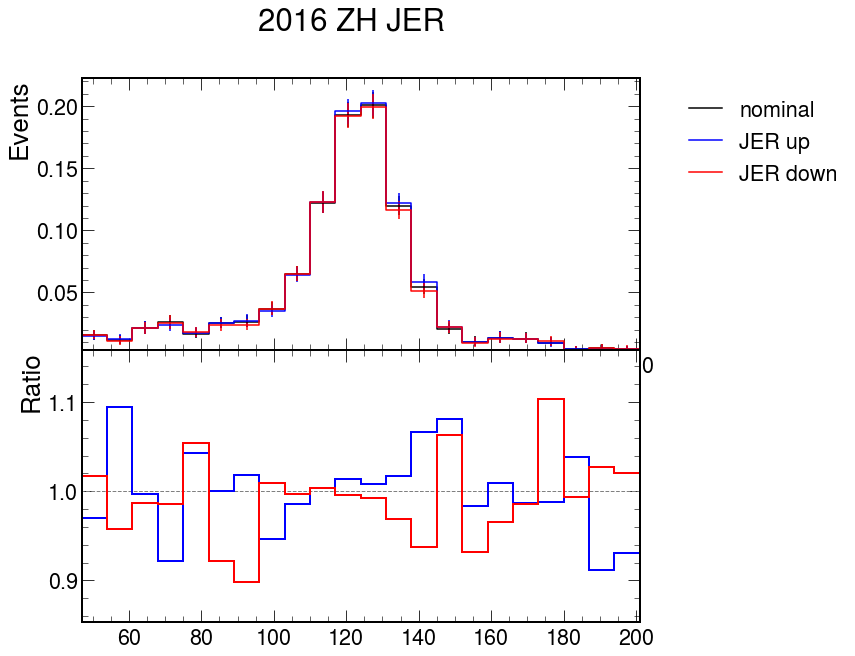

In [10]:
for p in mc:
    plot_syst(h.integrate('process',p),'JER',year+' '+p + ' JER',year+'/syst_JER/'+p)

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i i

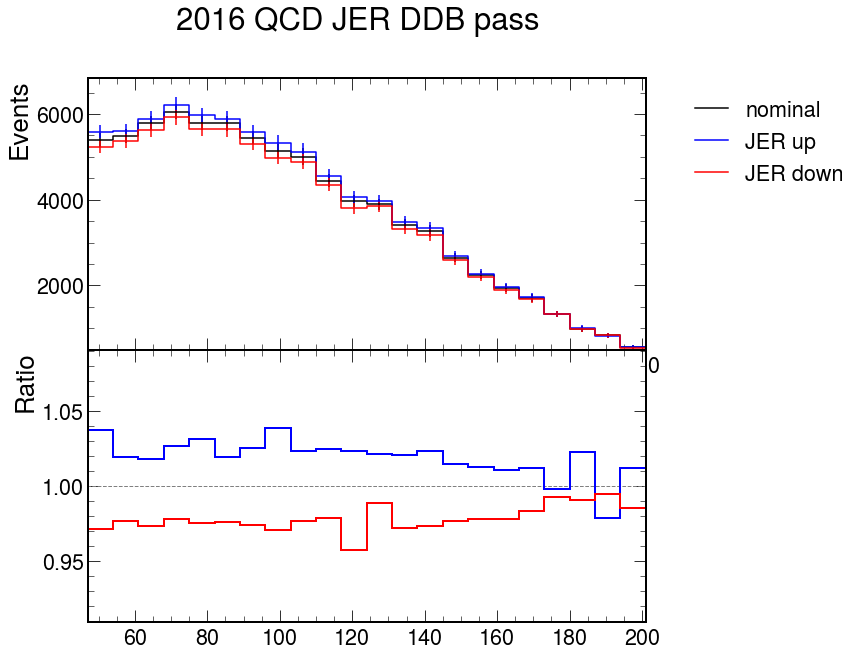

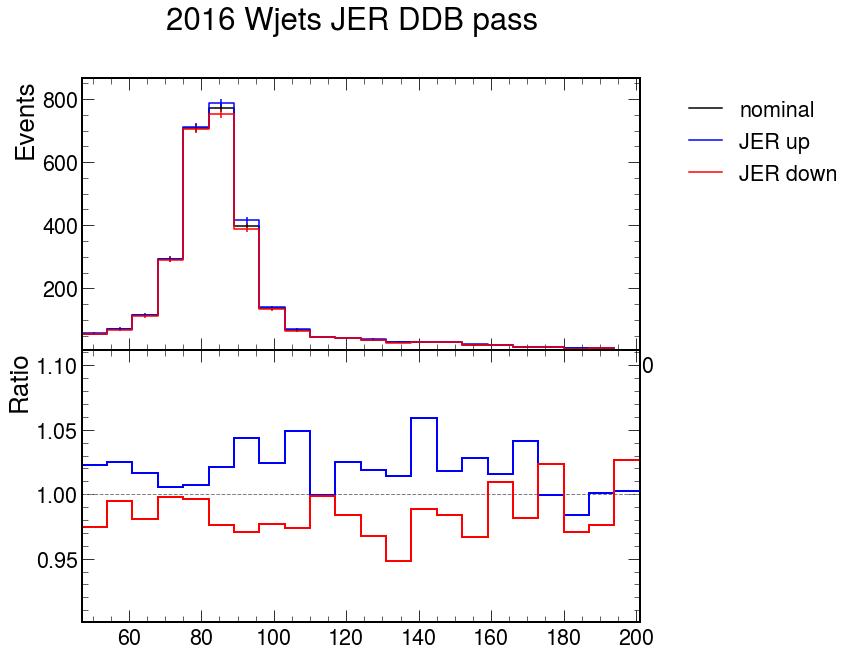

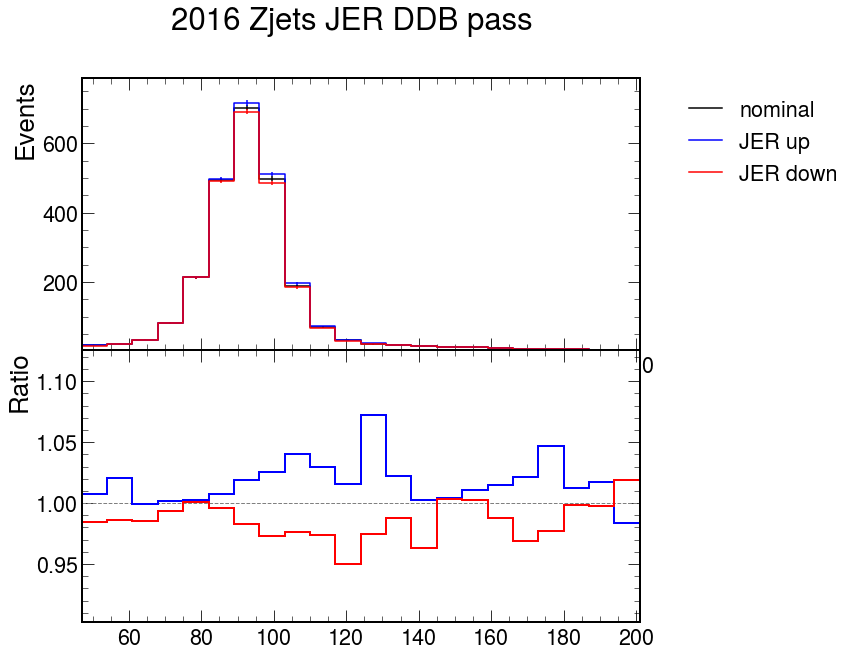

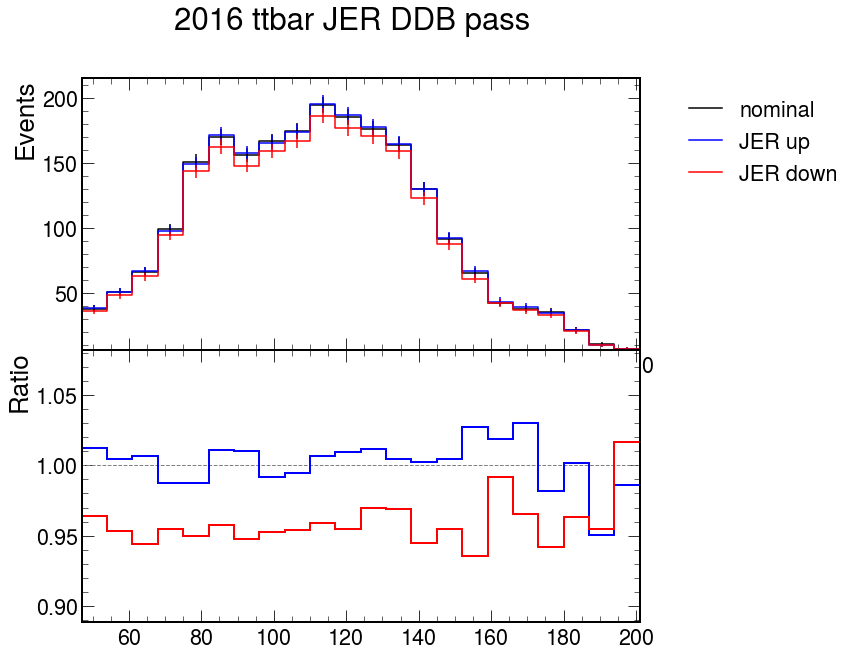

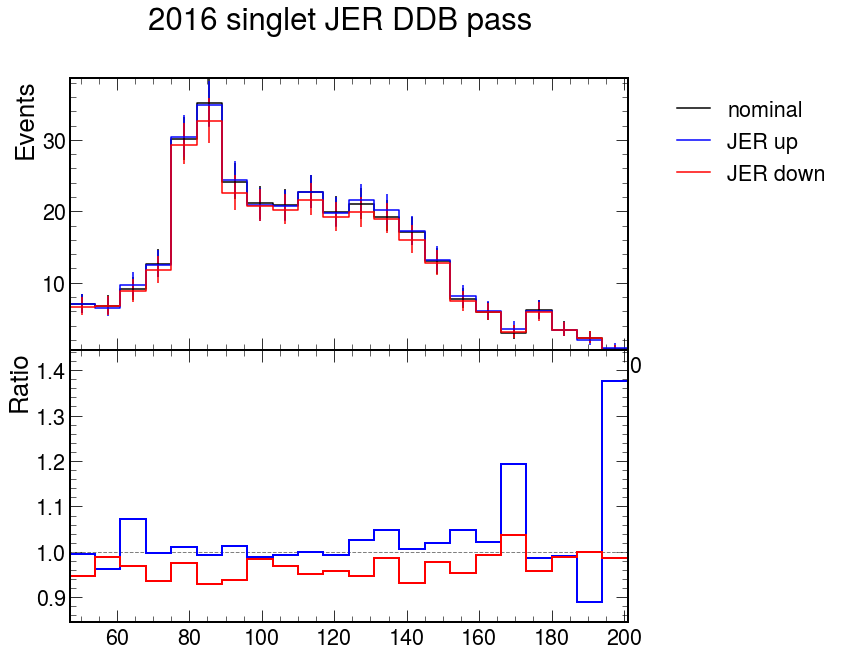

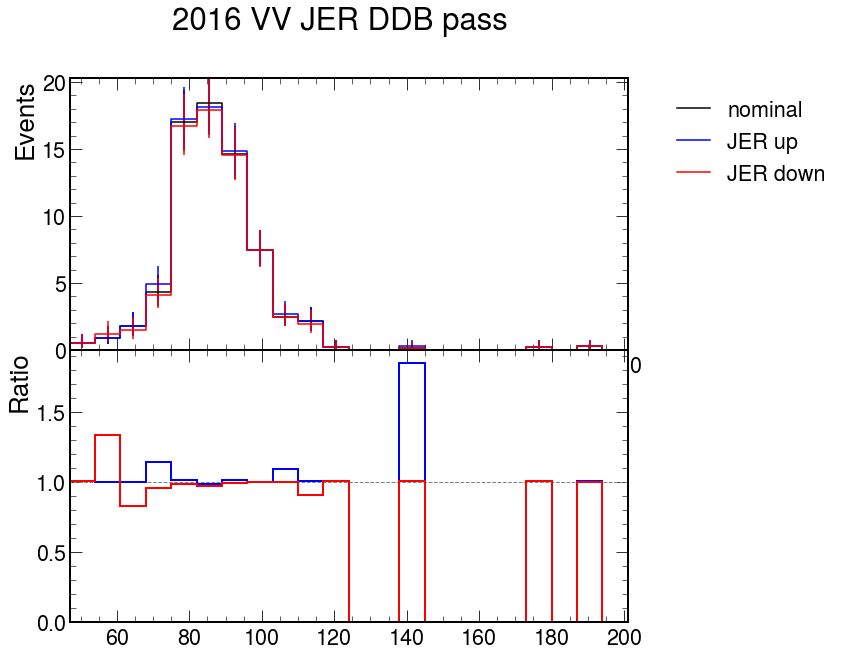

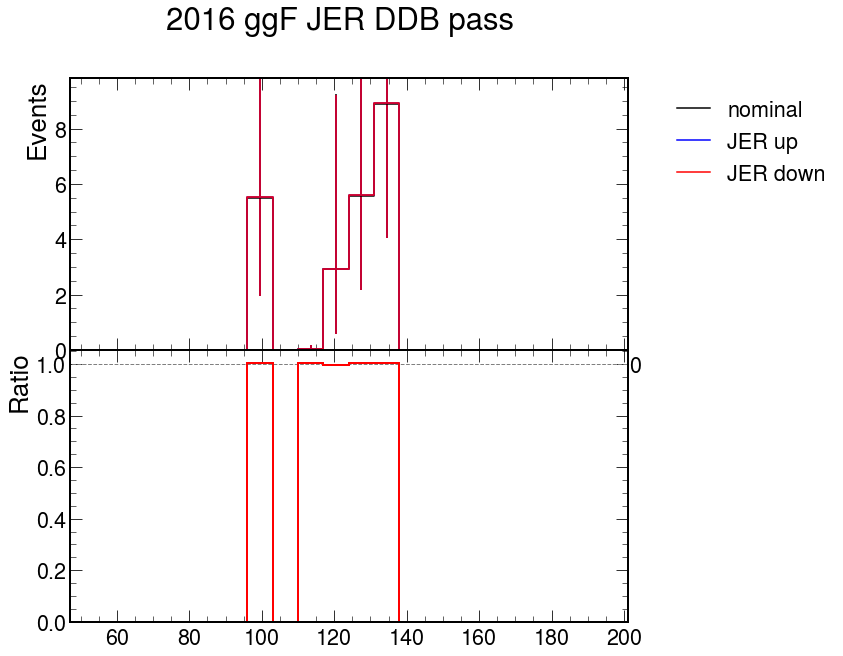

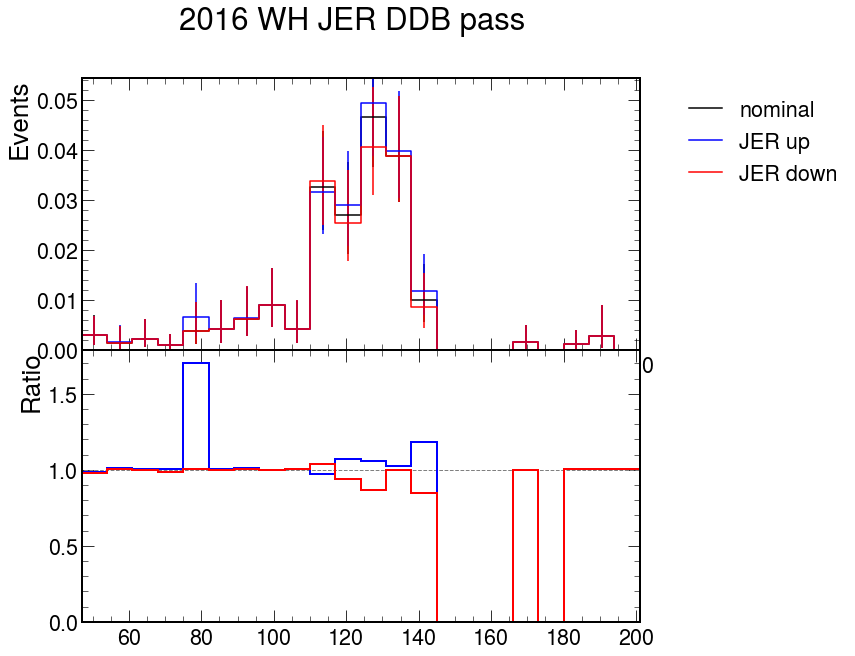

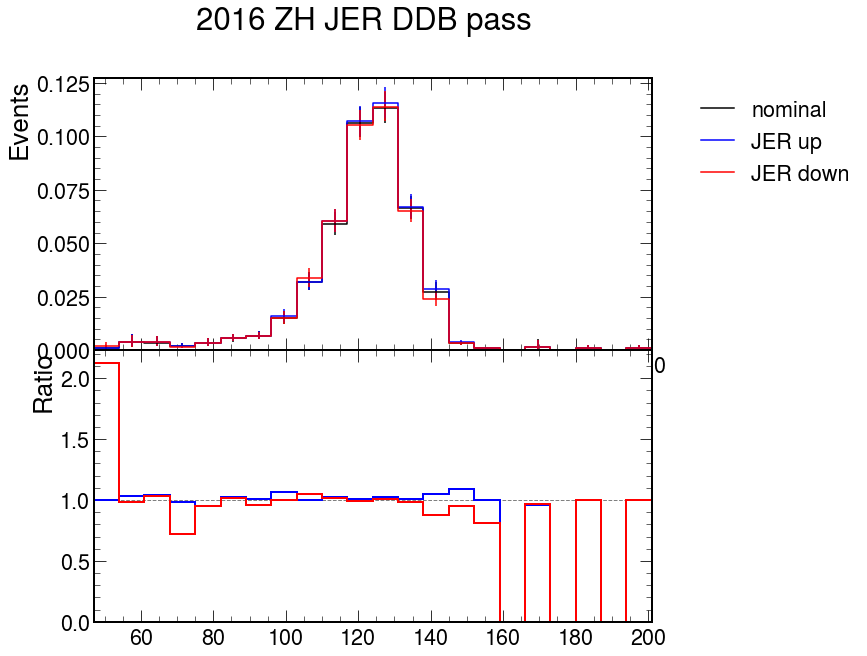

In [11]:
for p in mc:
    plot_syst(g.integrate('process',p),'JER',year + ' ' + p + ' JER DDB pass', year+'/syst_JER/'+p+"_pass")

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])


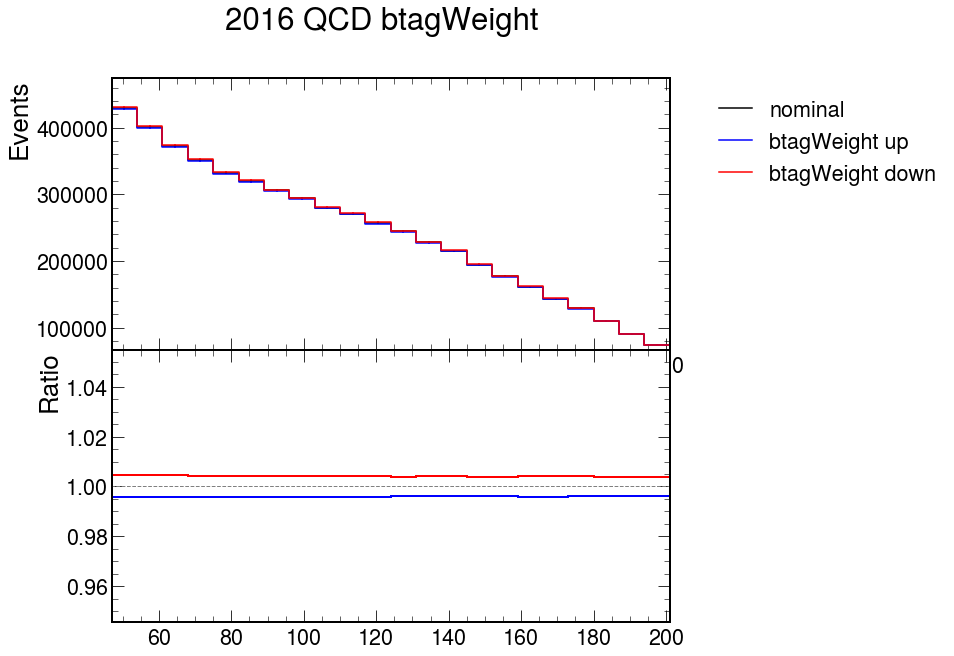

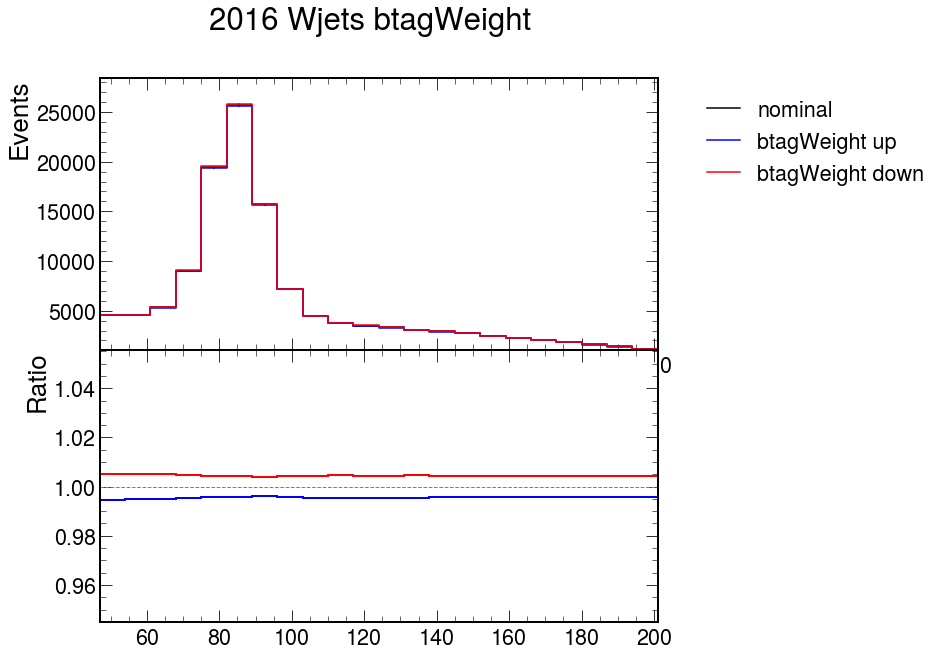

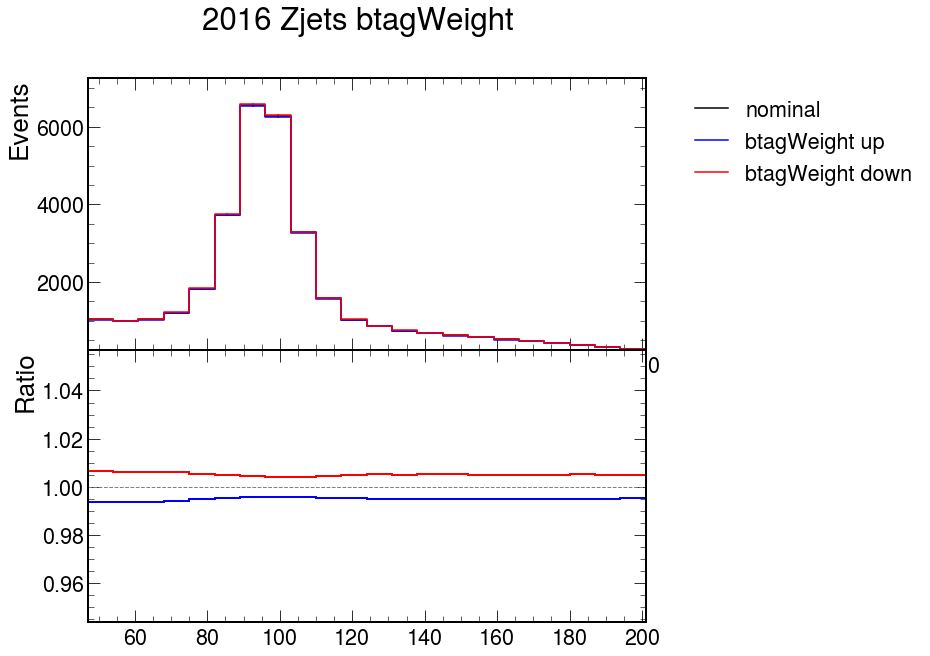

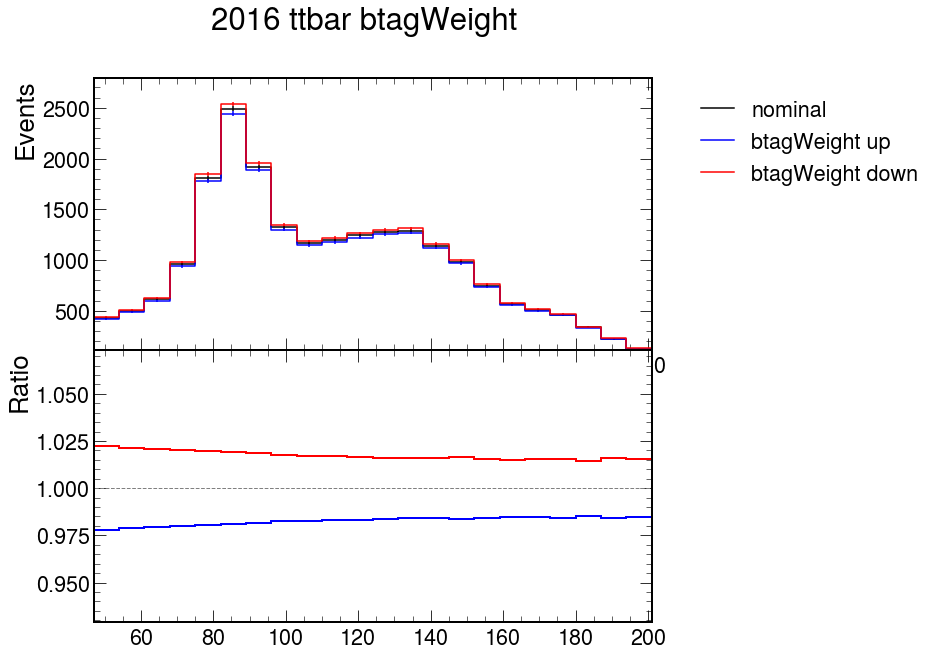

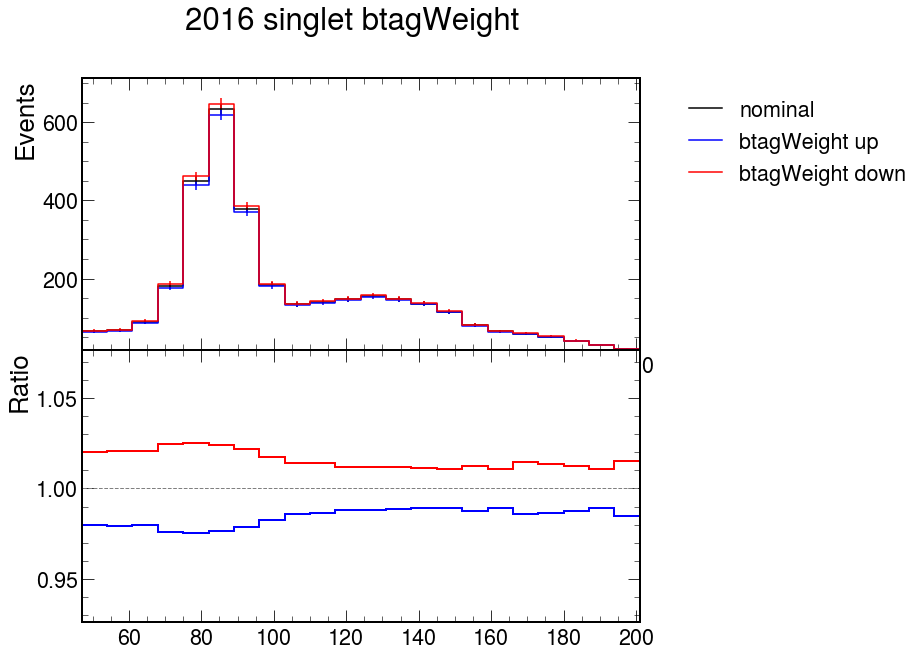

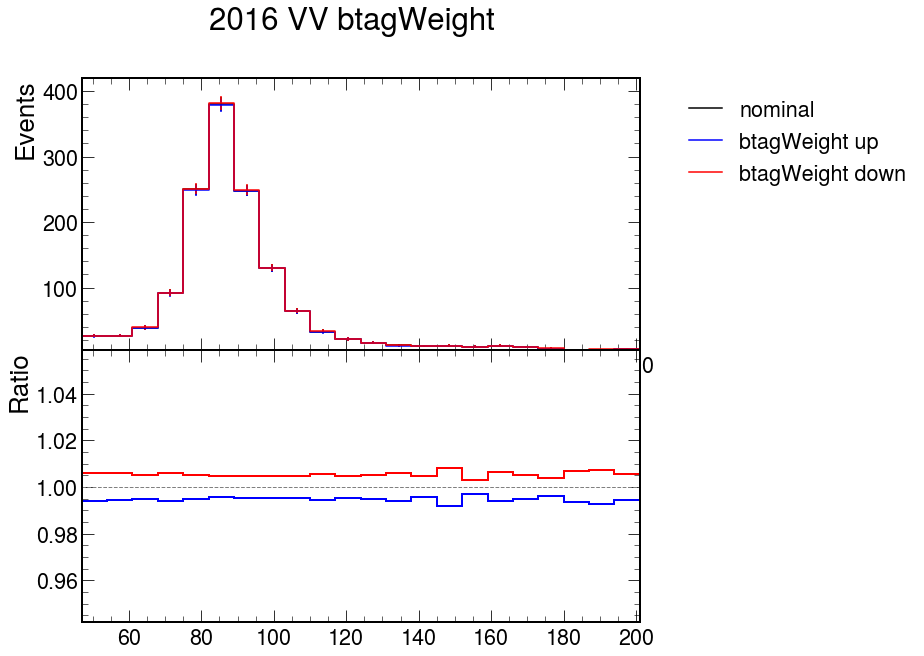

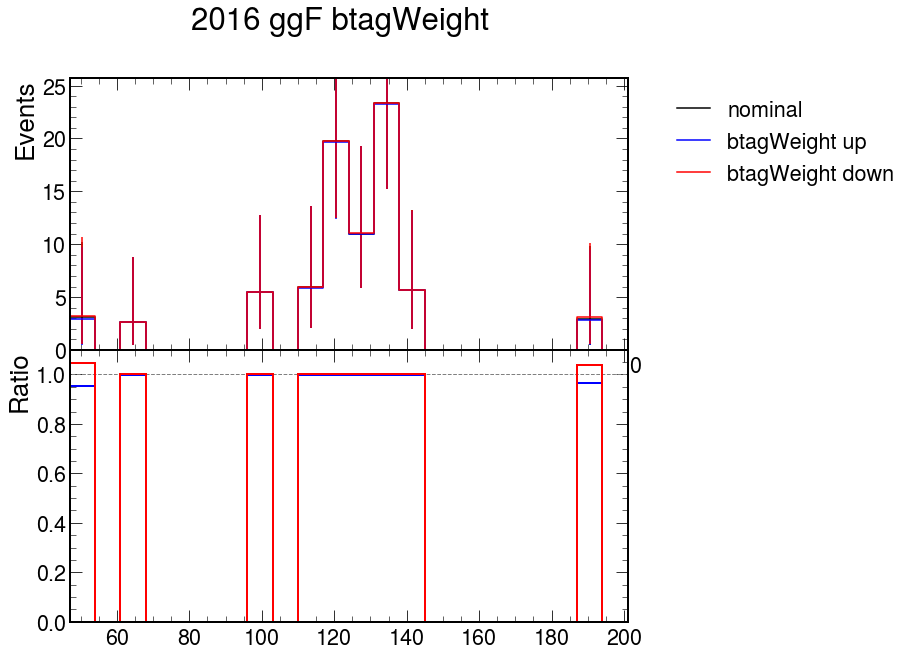

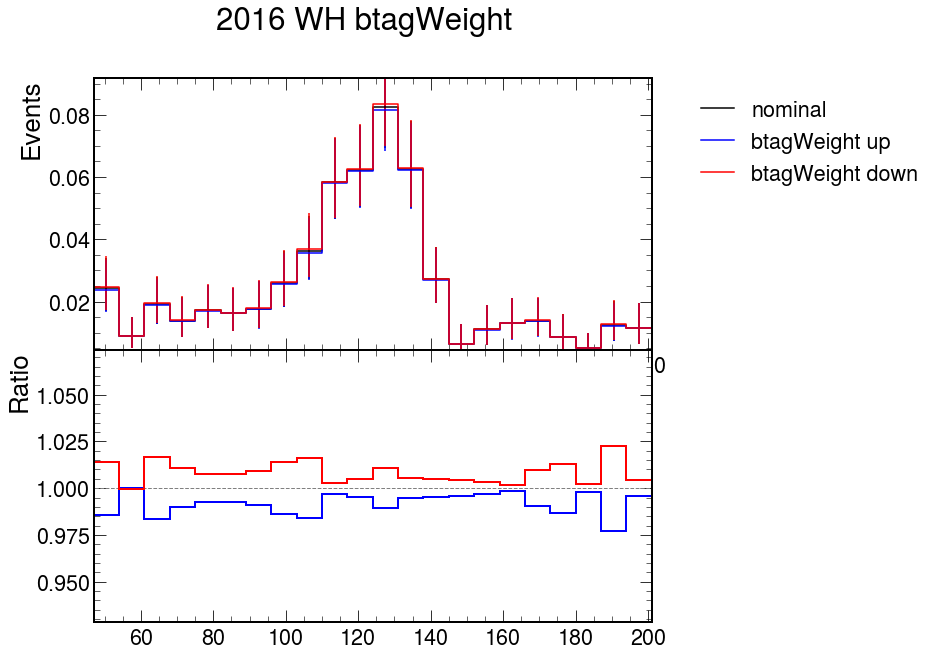

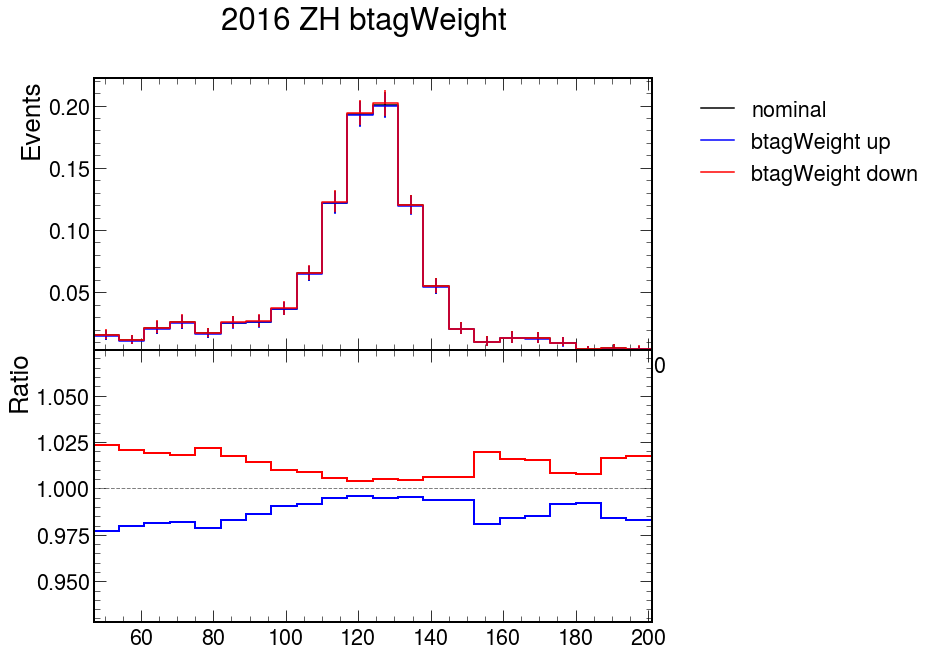

In [12]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagWeight',year+' '+p + ' btagWeight',year+'/syst_btagWeight/'+p)

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i i

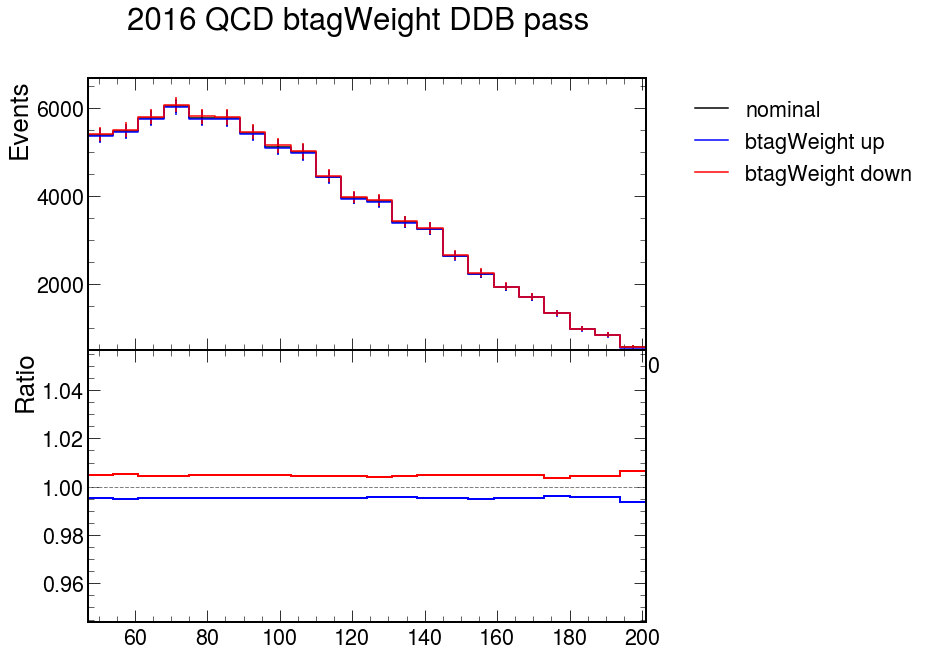

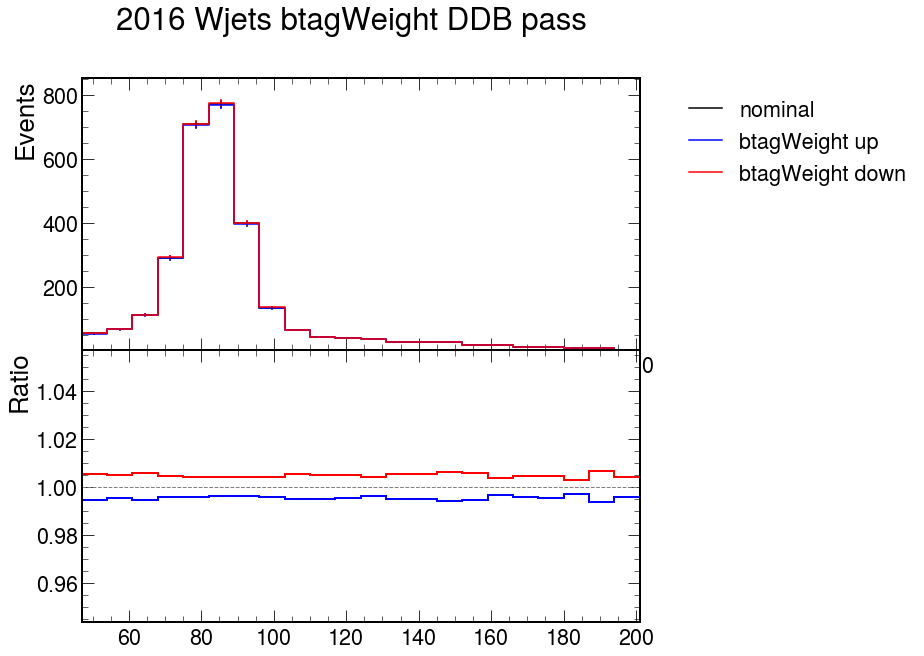

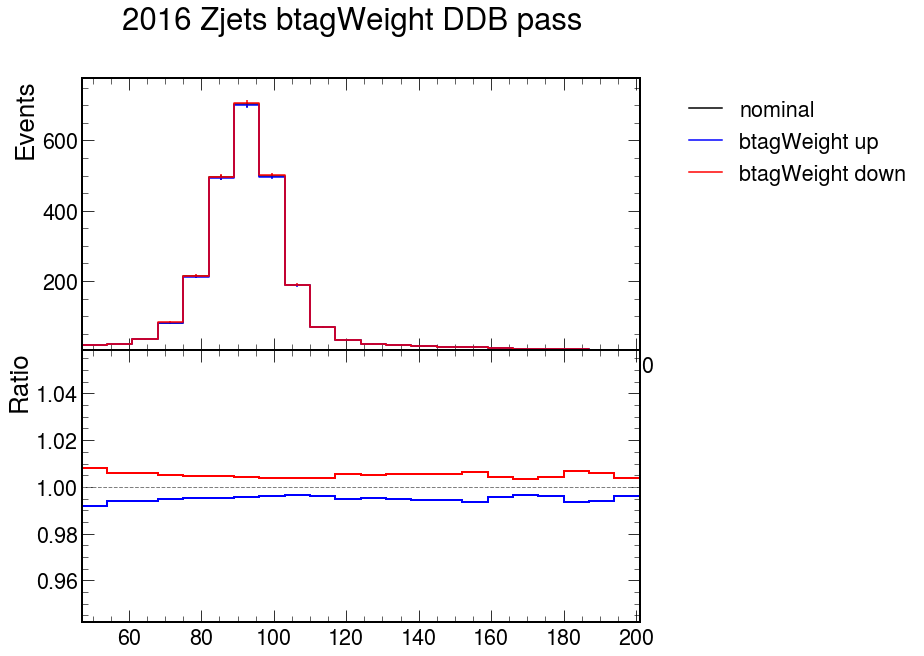

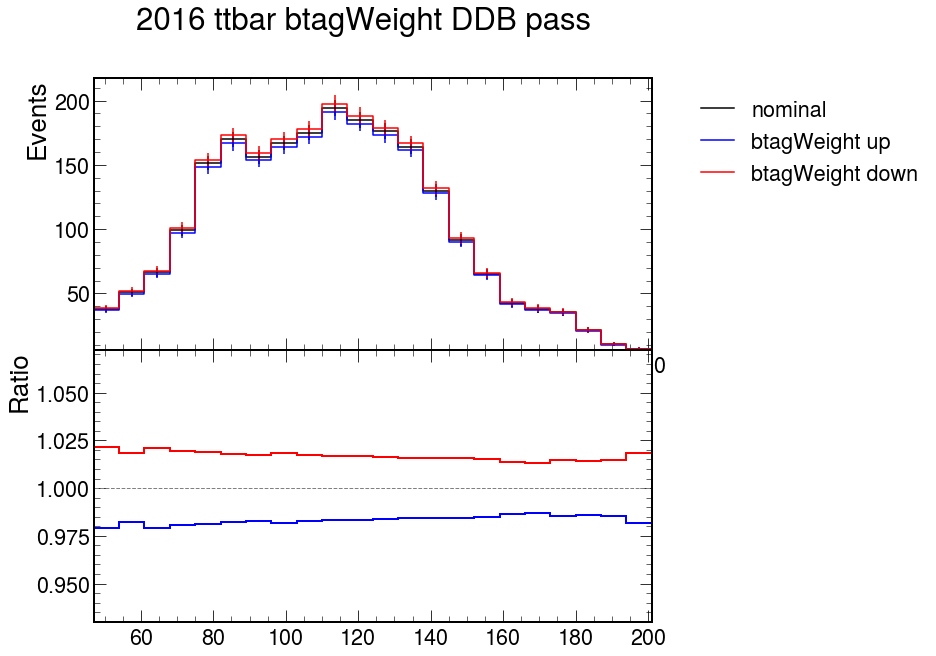

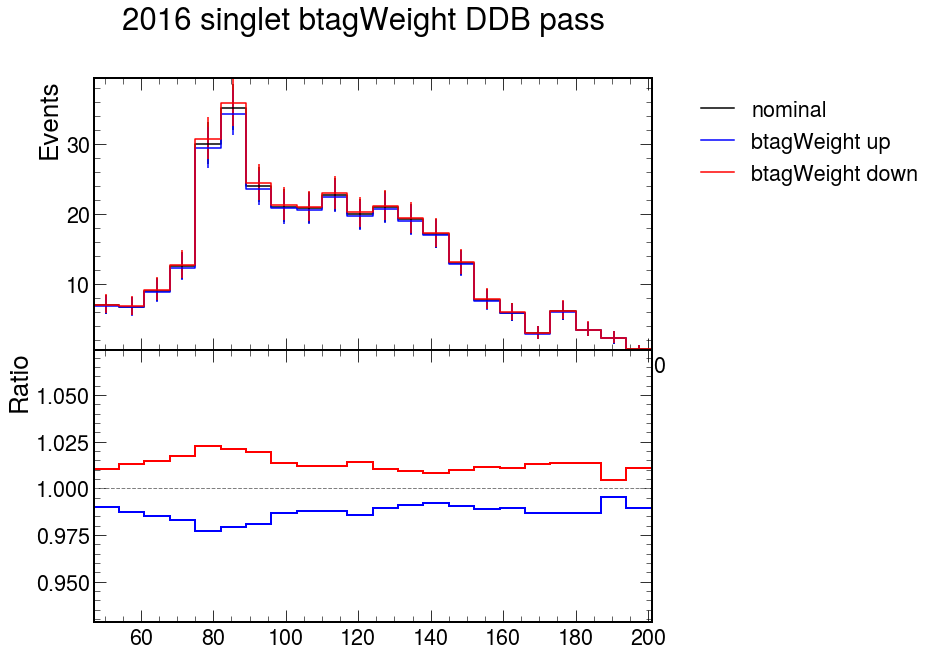

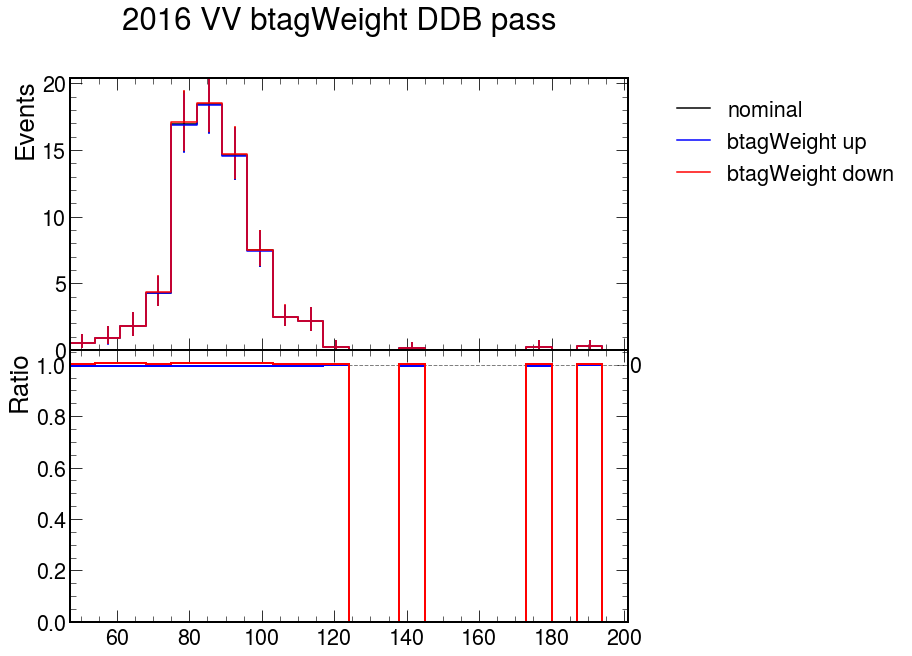

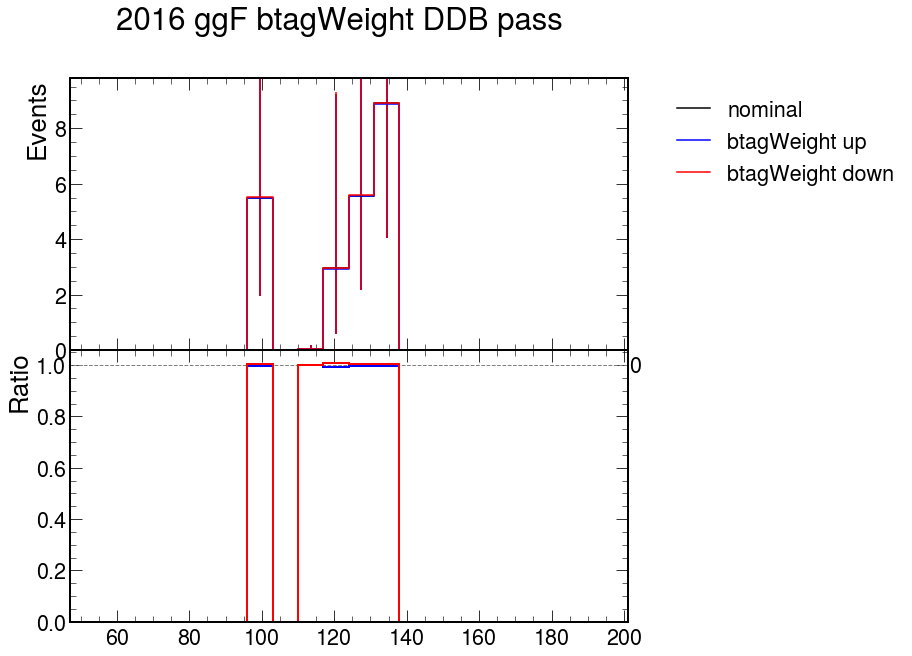

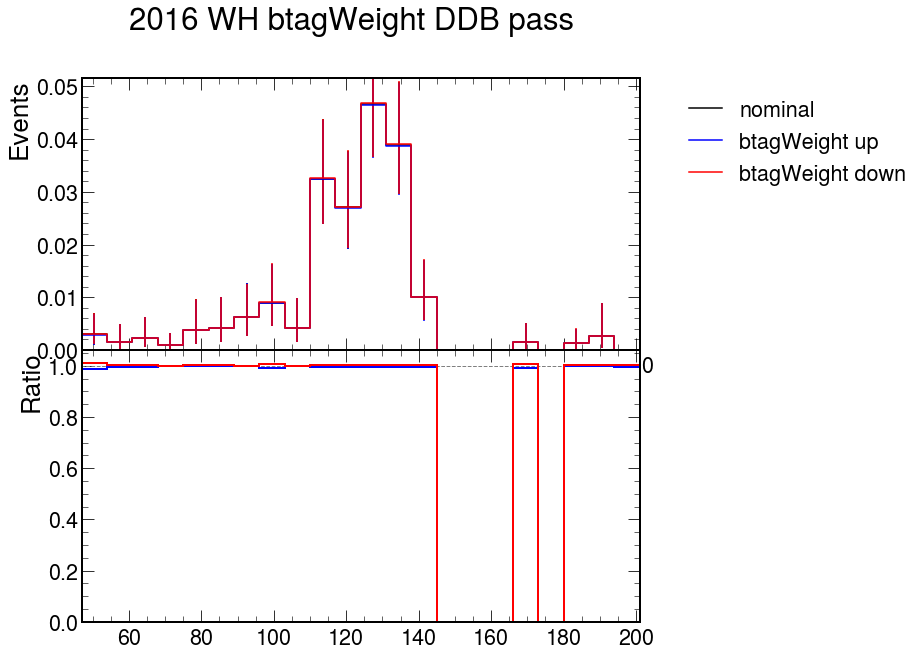

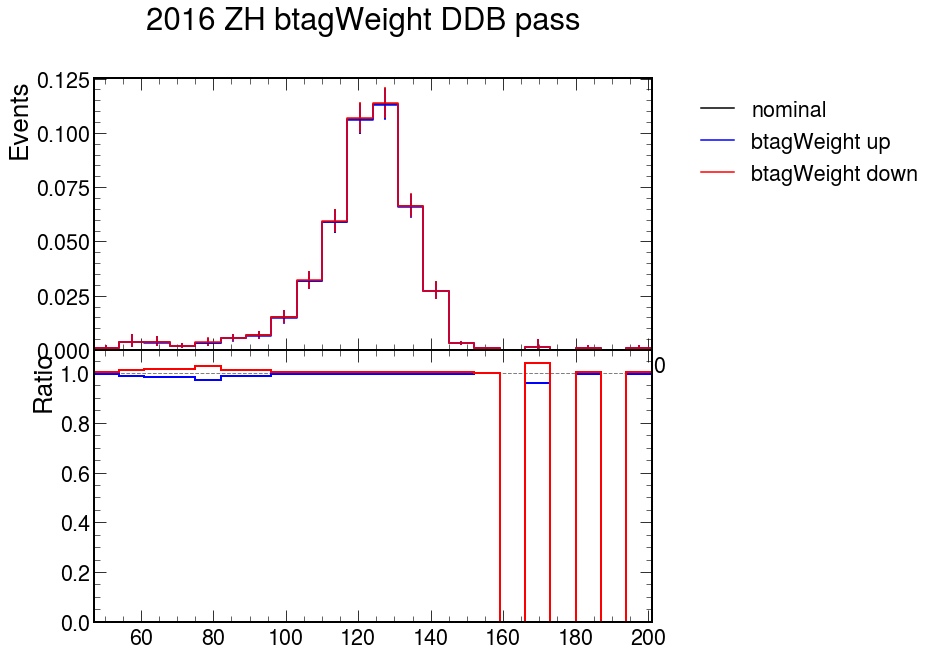

In [13]:
for p in mc:
    plot_syst(g.integrate('process',p),'btagWeight',year + ' ' + p + ' btagWeight DDB pass', year+'/syst_btagWeight/'+p+"_pass")

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])


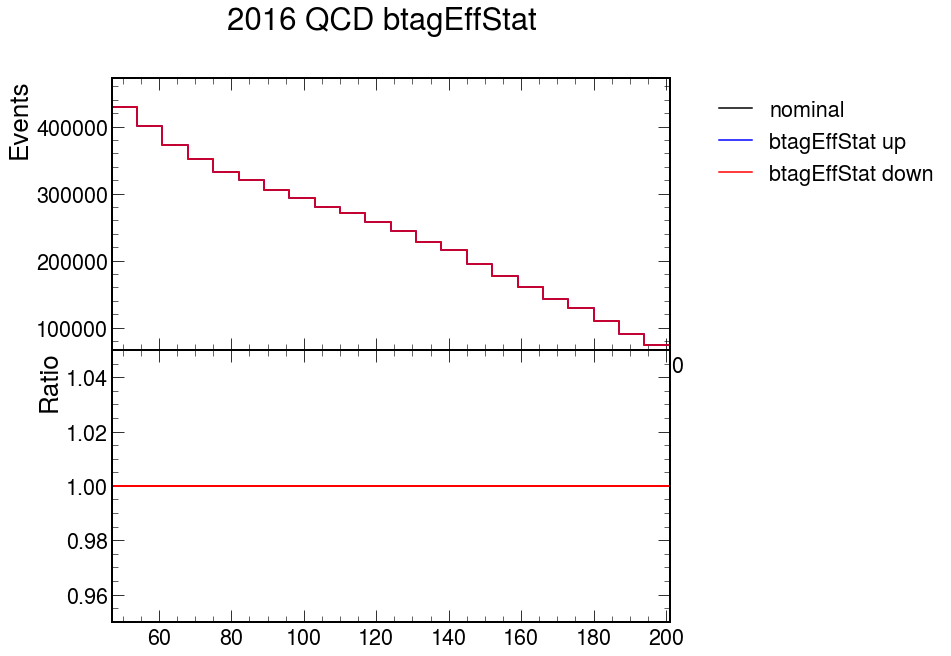

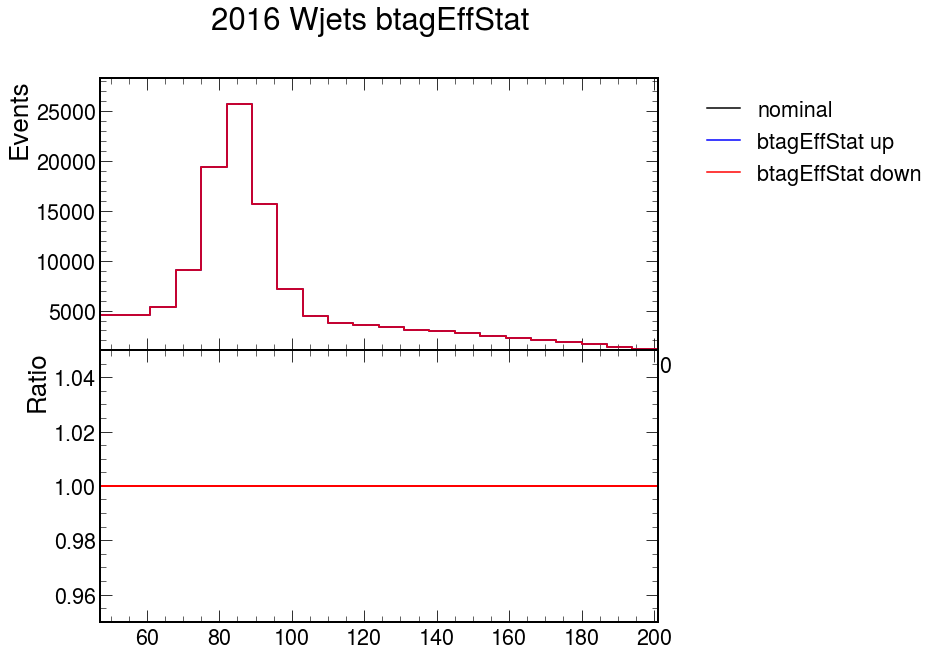

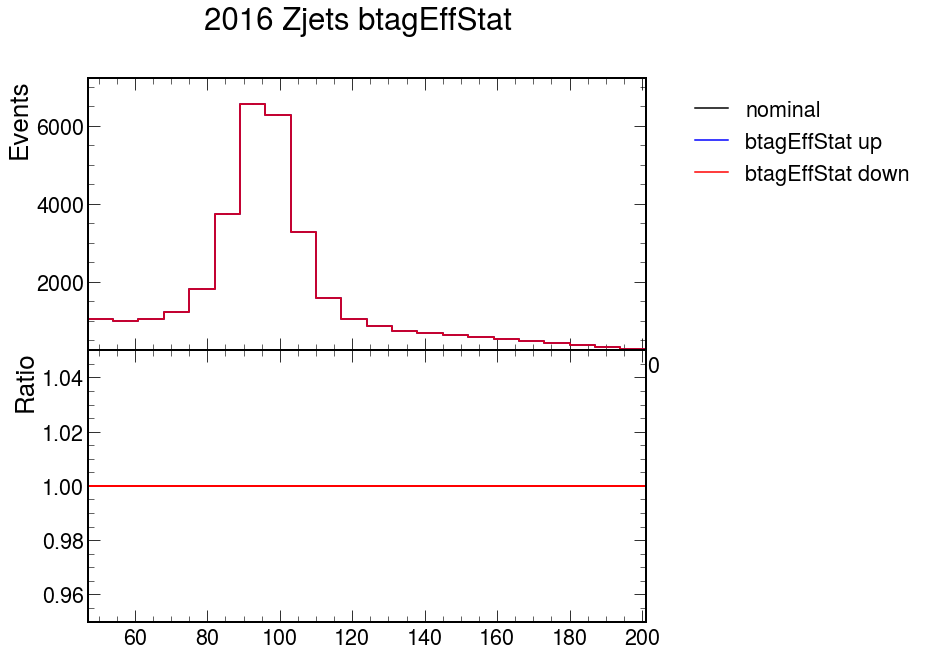

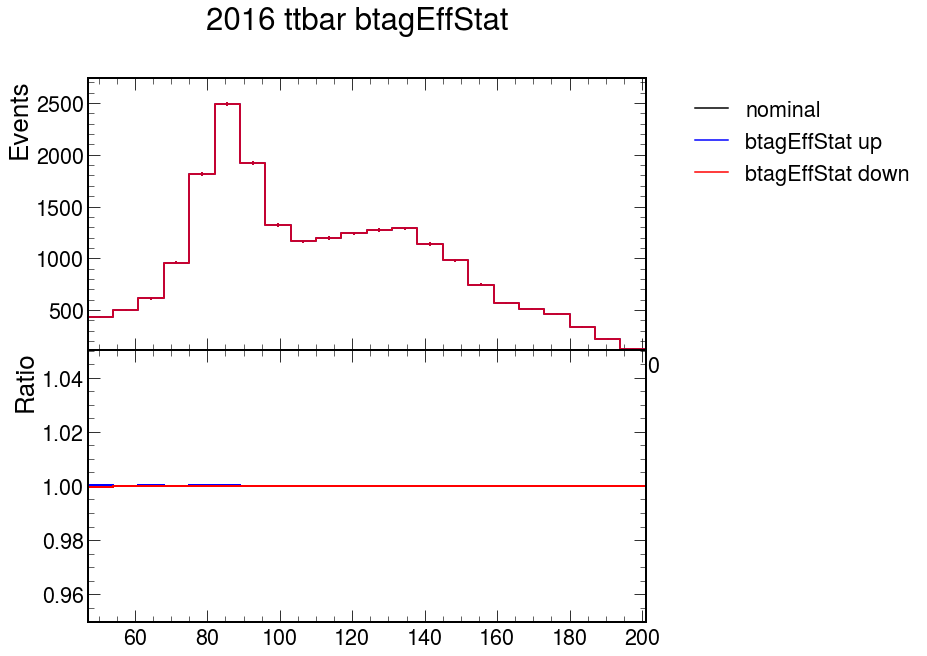

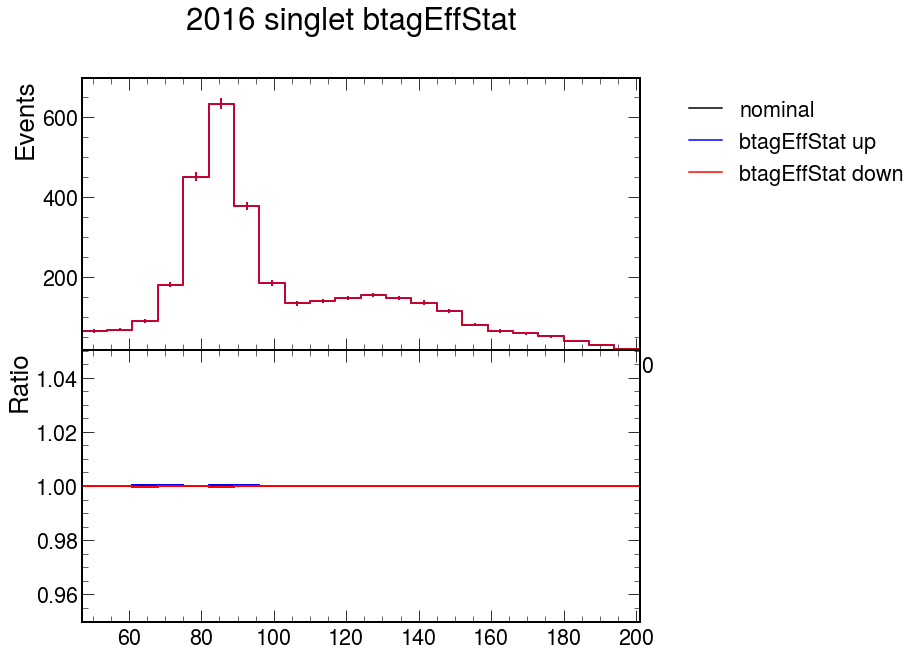

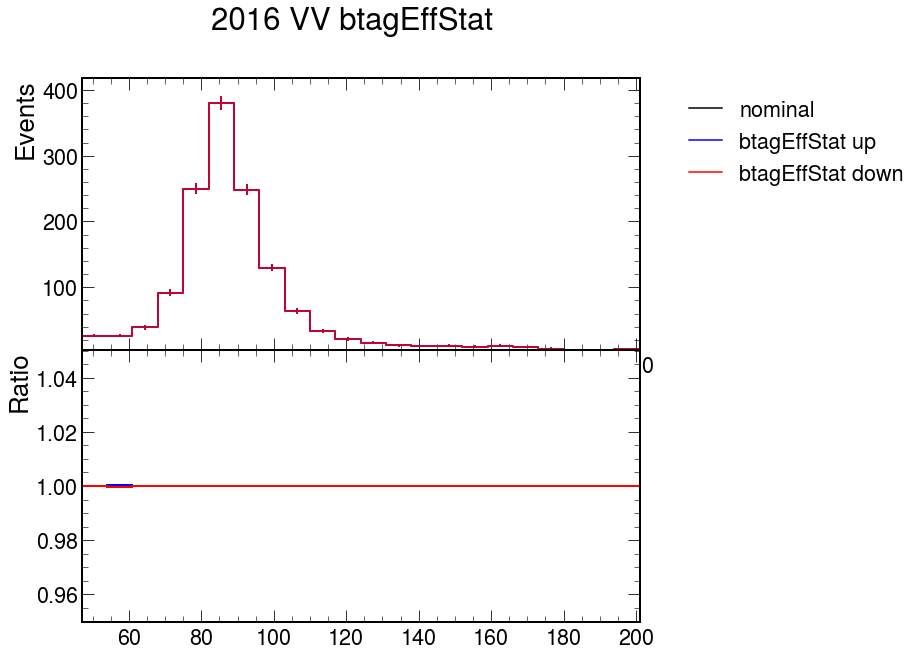

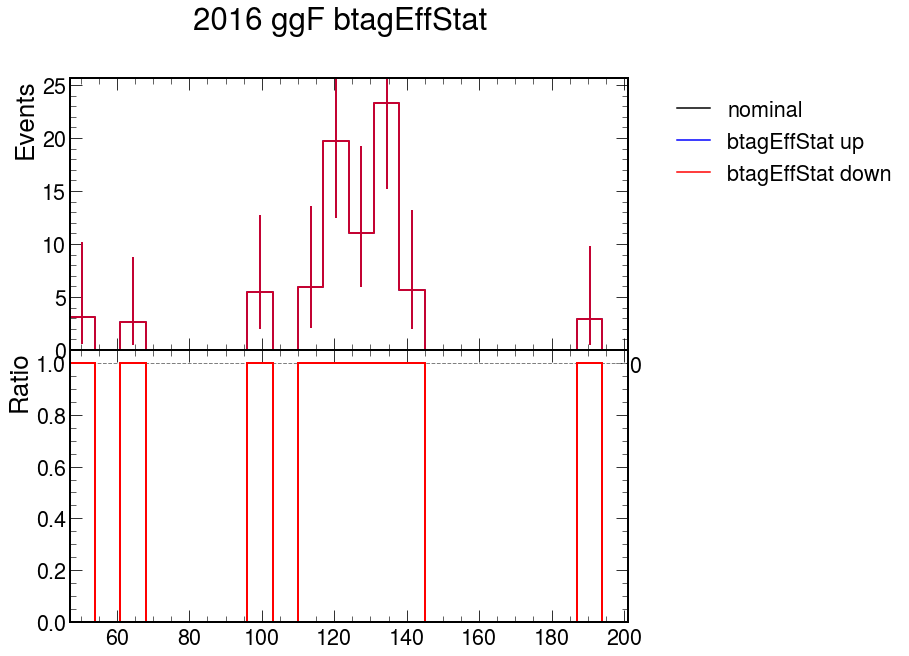

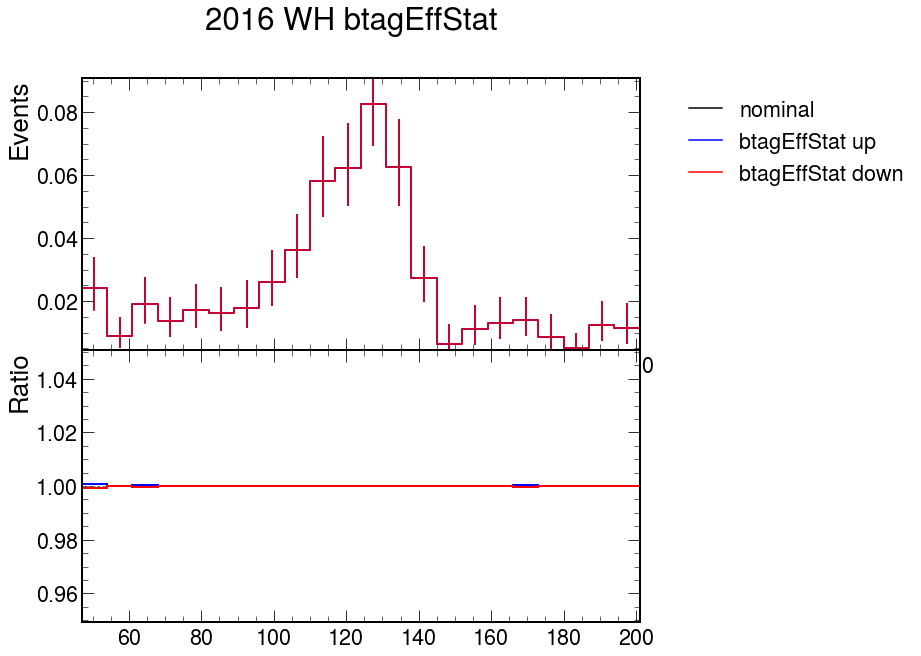

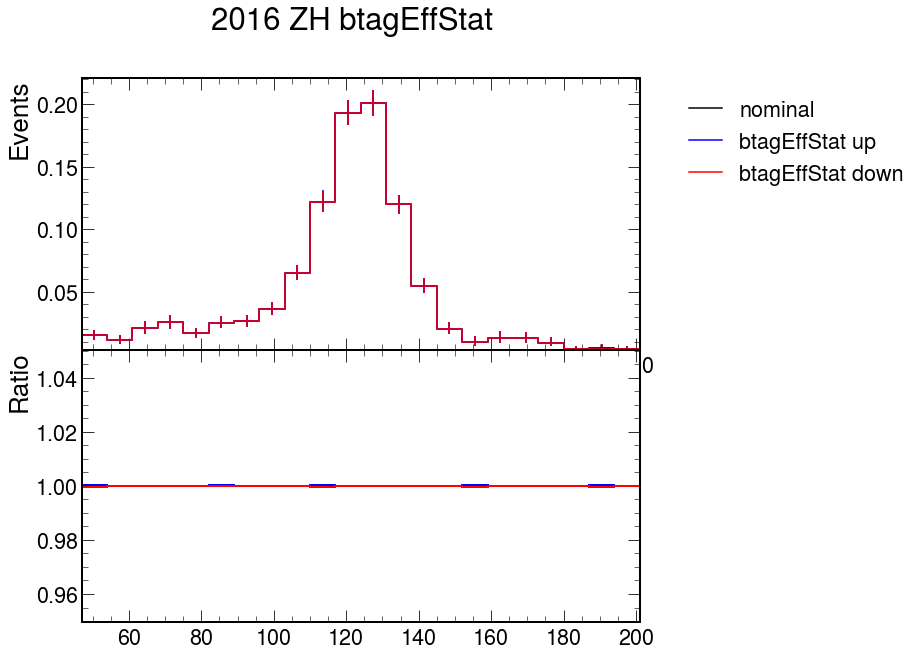

In [14]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagEffStat',year+' '+p + ' btagEffStat',year+'/syst_btagEffStat/'+p)

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i i

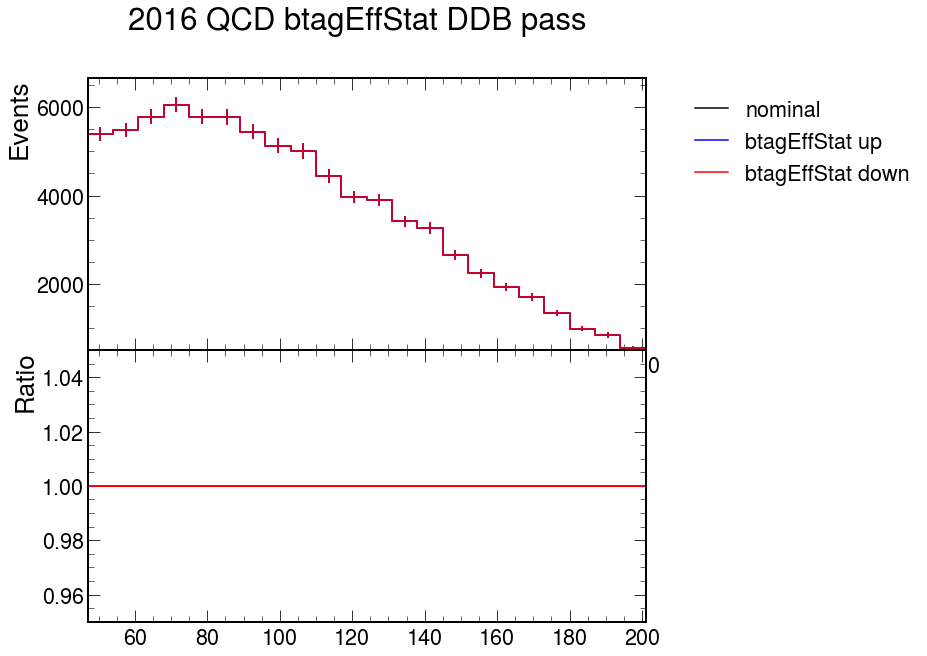

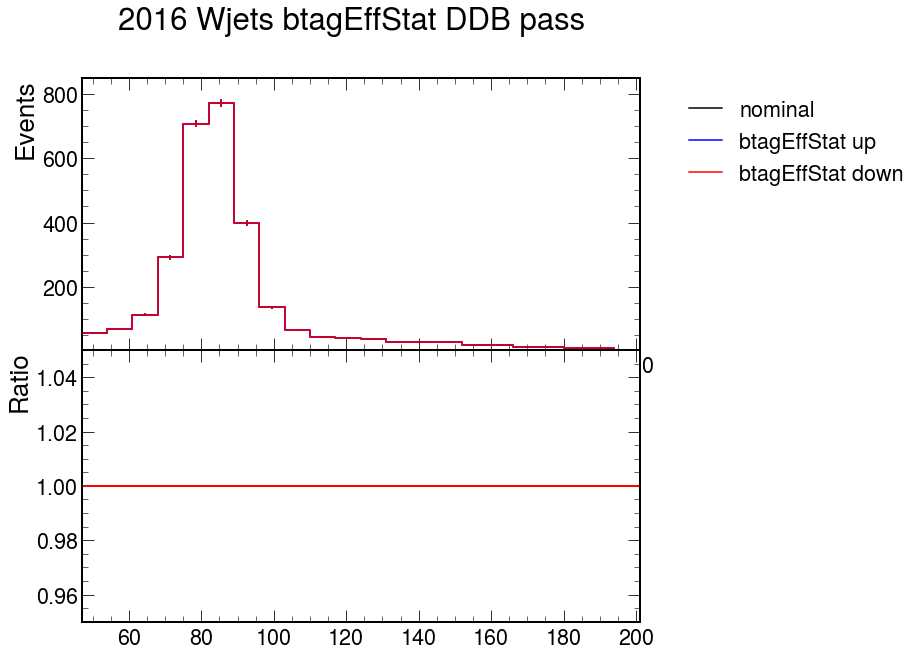

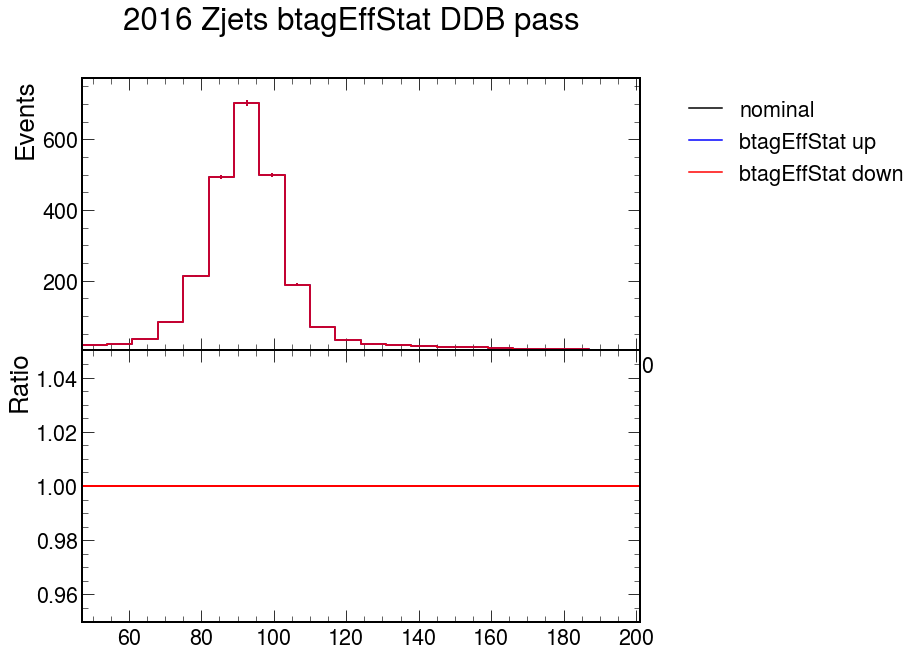

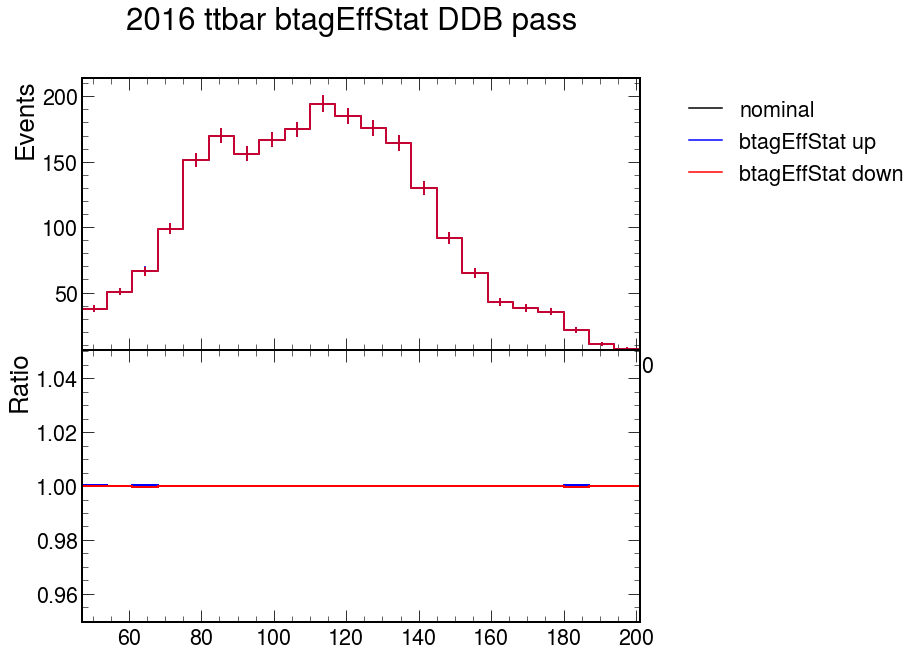

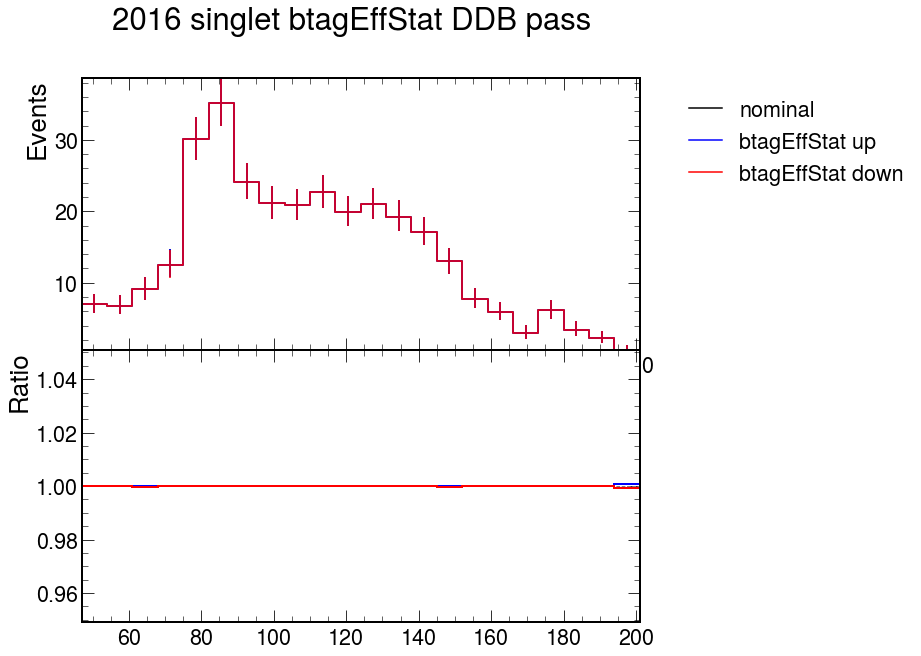

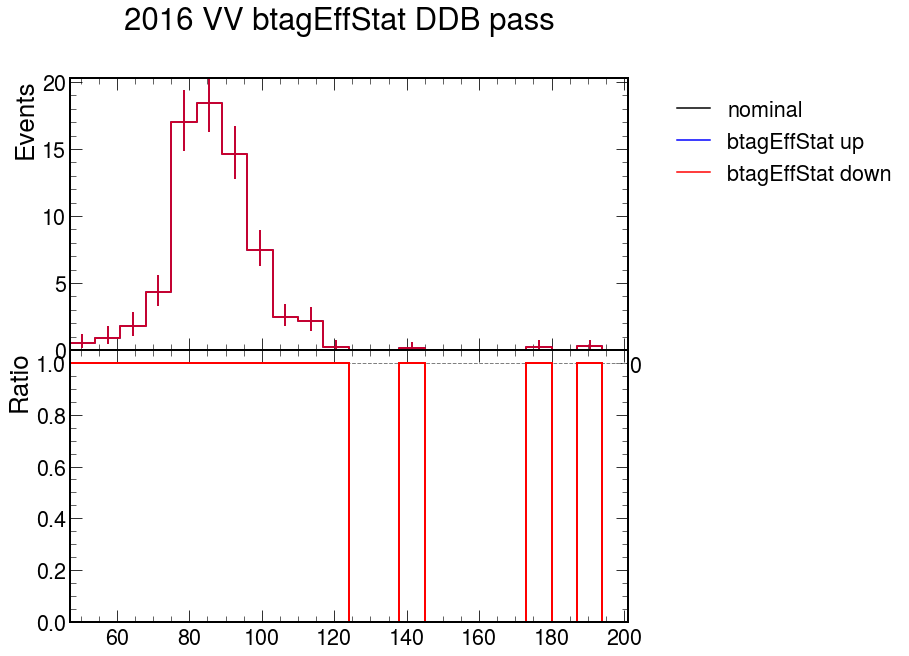

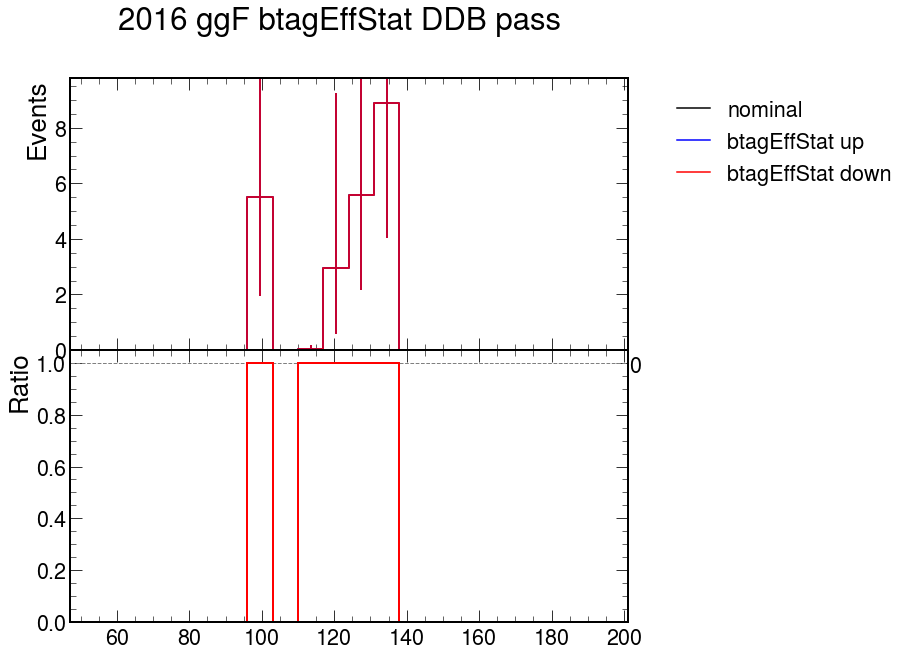

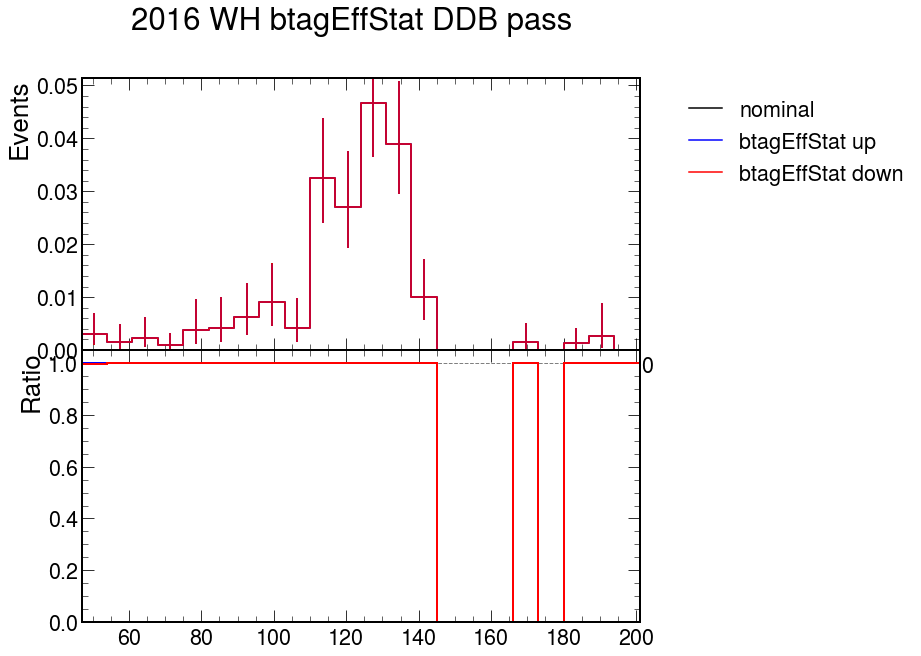

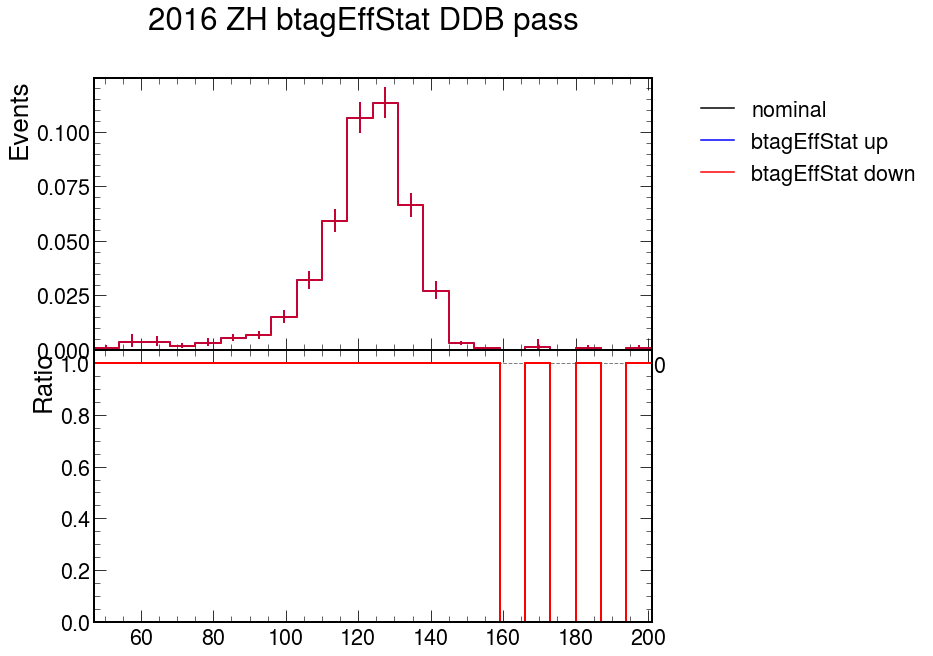

In [15]:
for p in mc:
    plot_syst(g.integrate('process',p),'btagEffStat',year + ' ' + p + ' btagEffStat DDB pass', year+'/syst_btagEffStat/'+p+"_pass")

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])


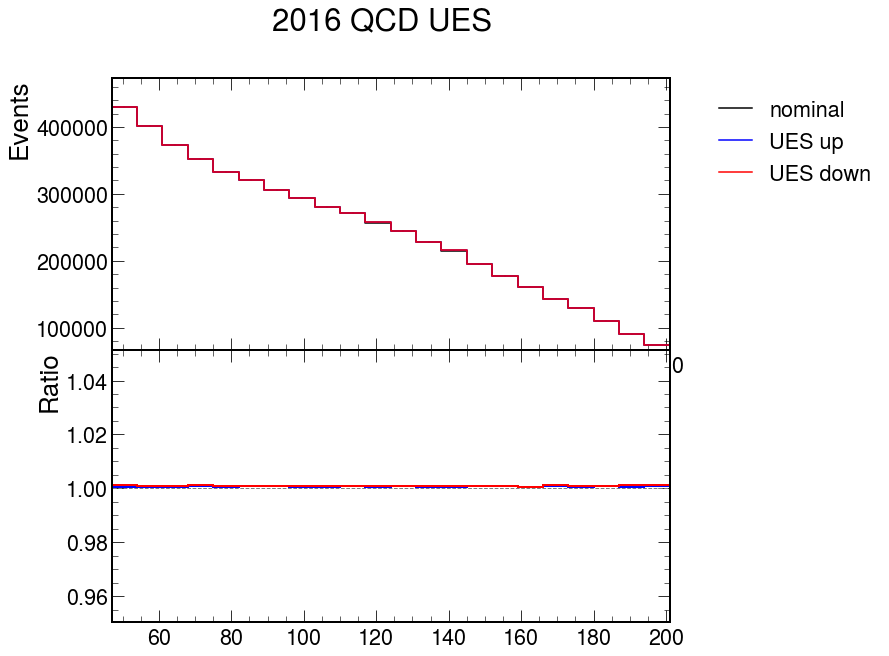

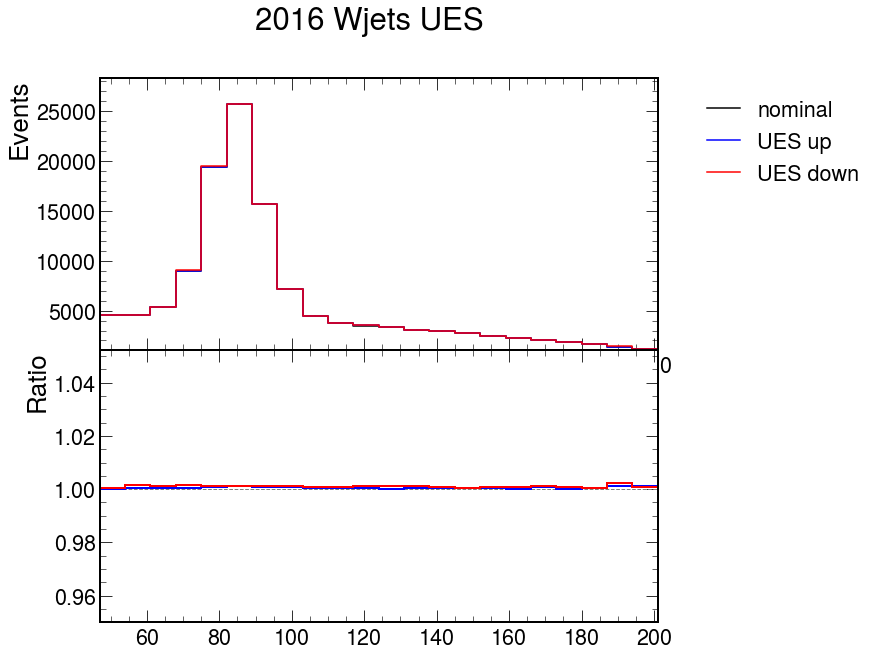

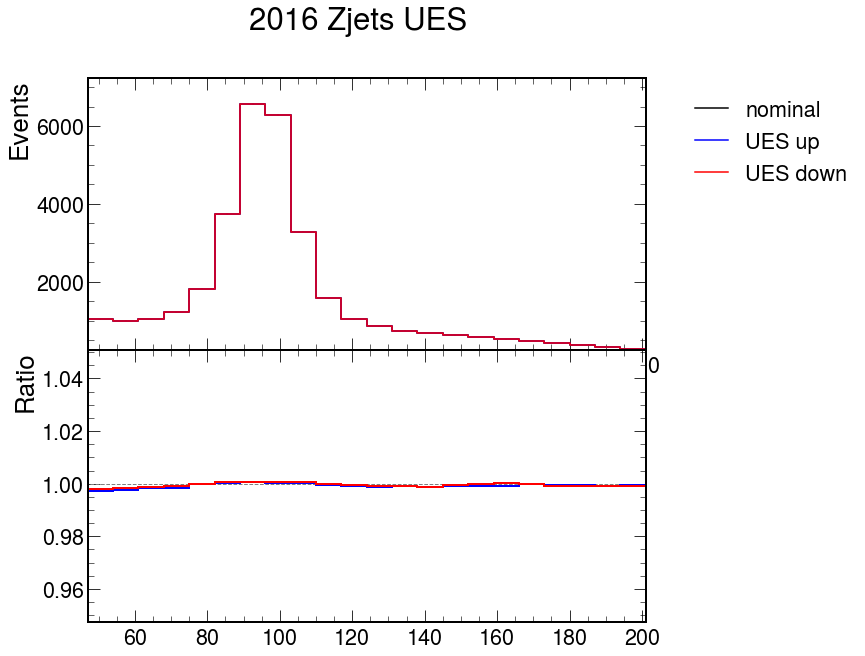

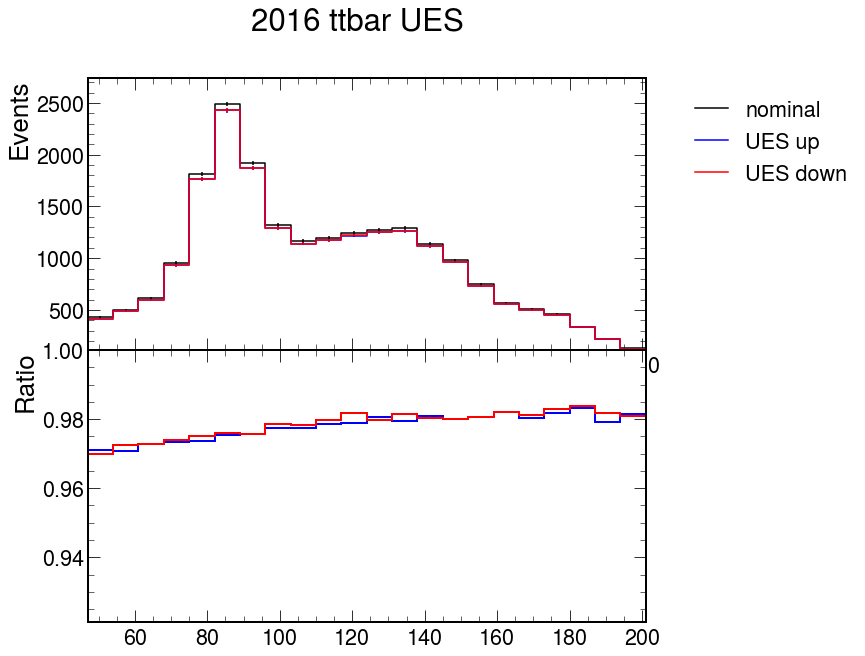

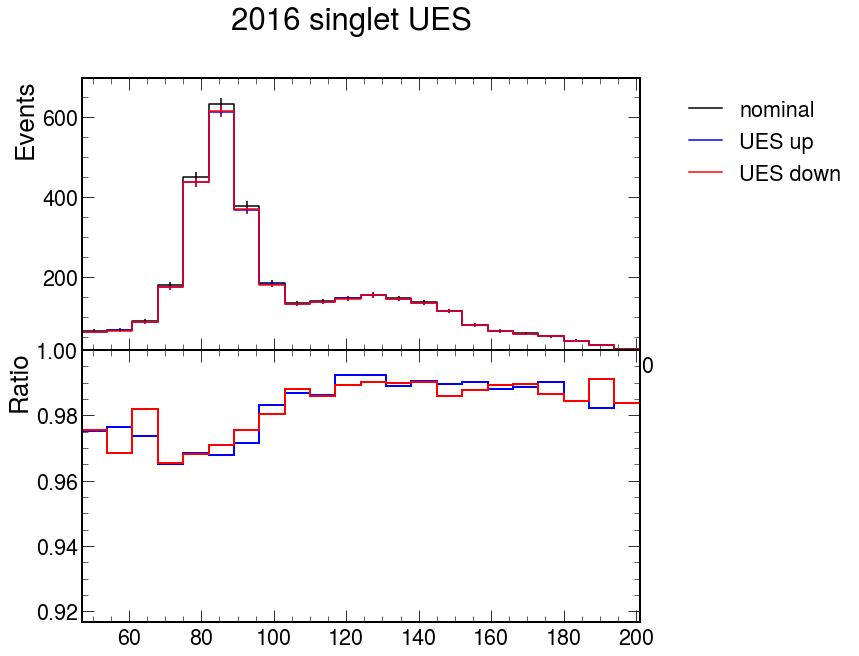

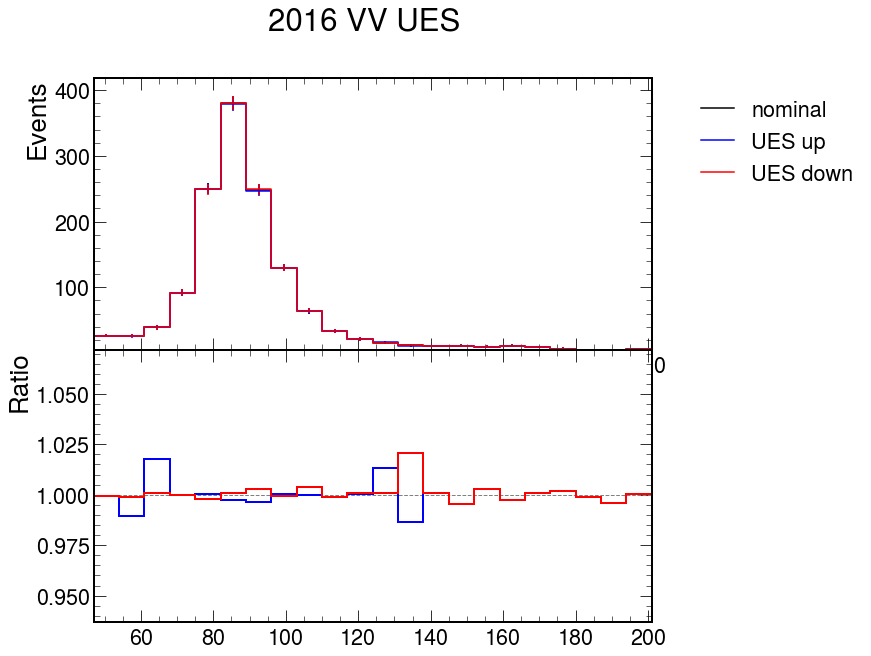

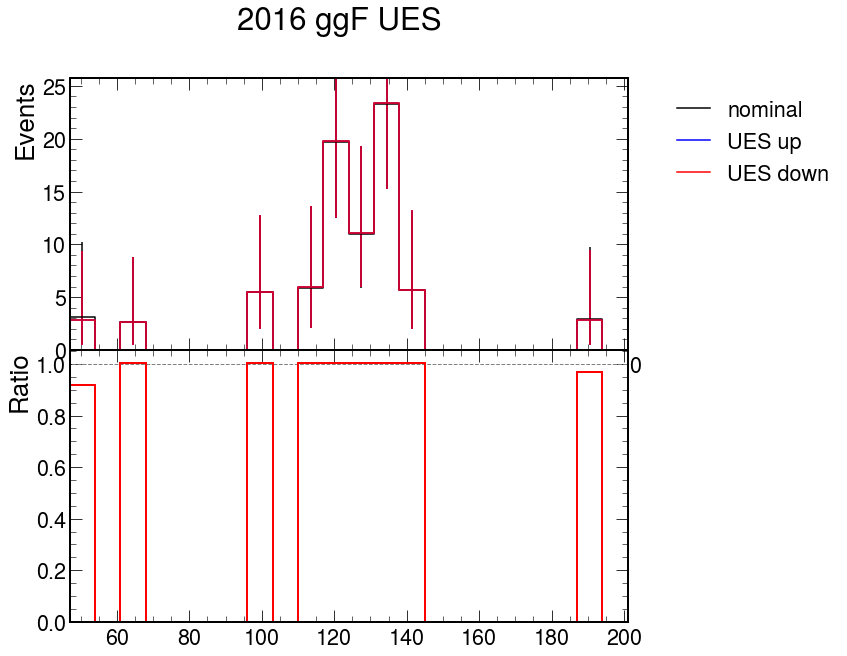

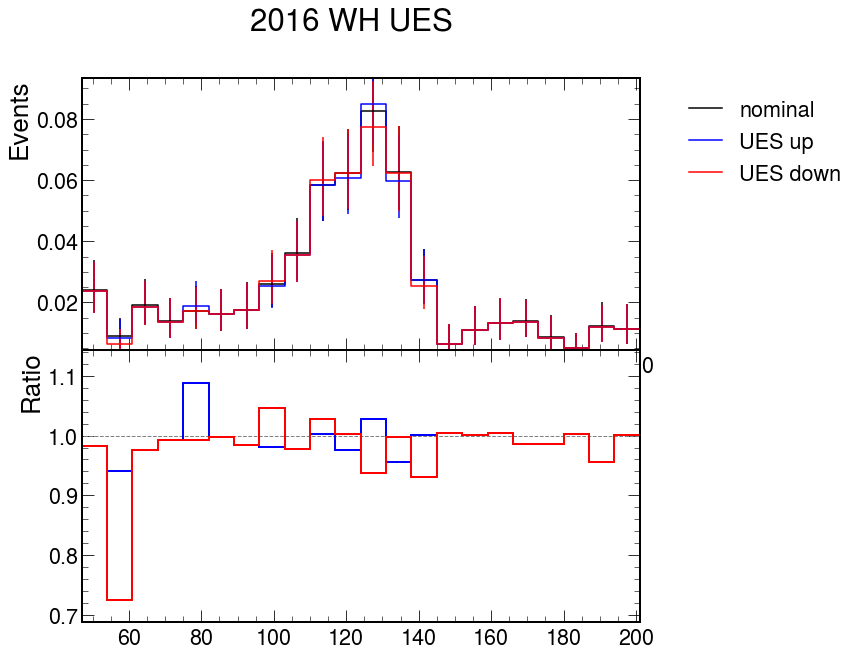

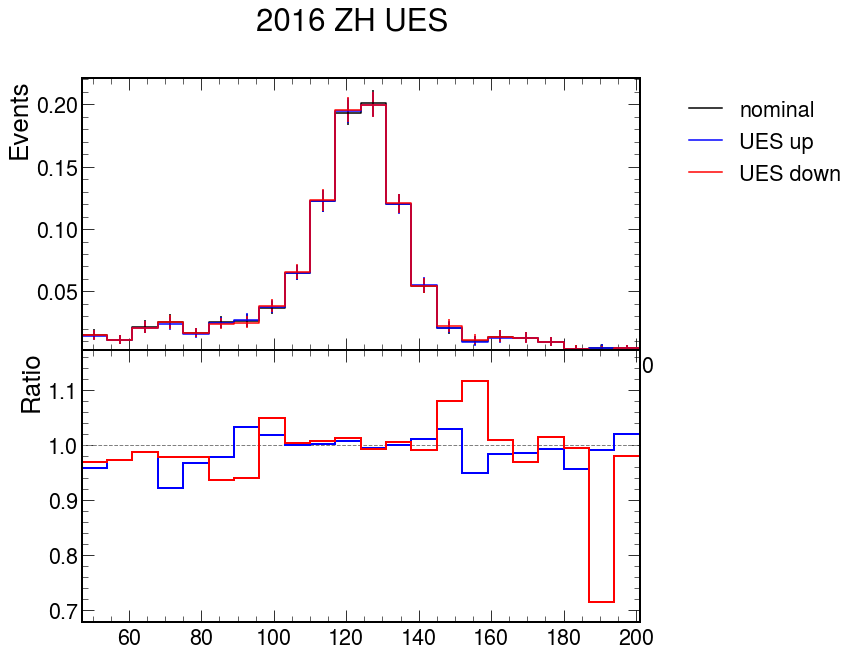

In [16]:
for p in mc:
    plot_syst(h.integrate('process',p),'UES',year+' '+p + ' UES',year+'/syst_UES/'+p)

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i i

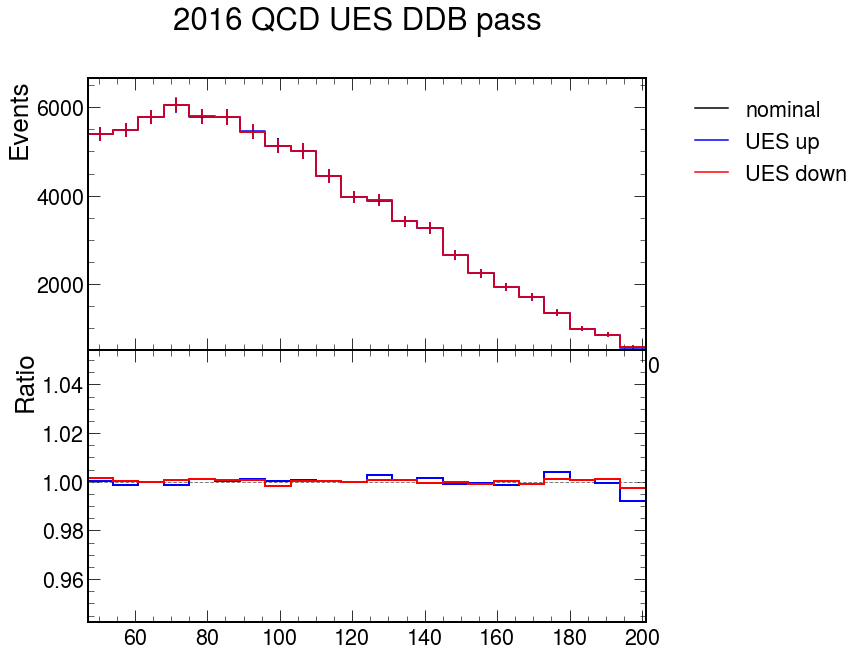

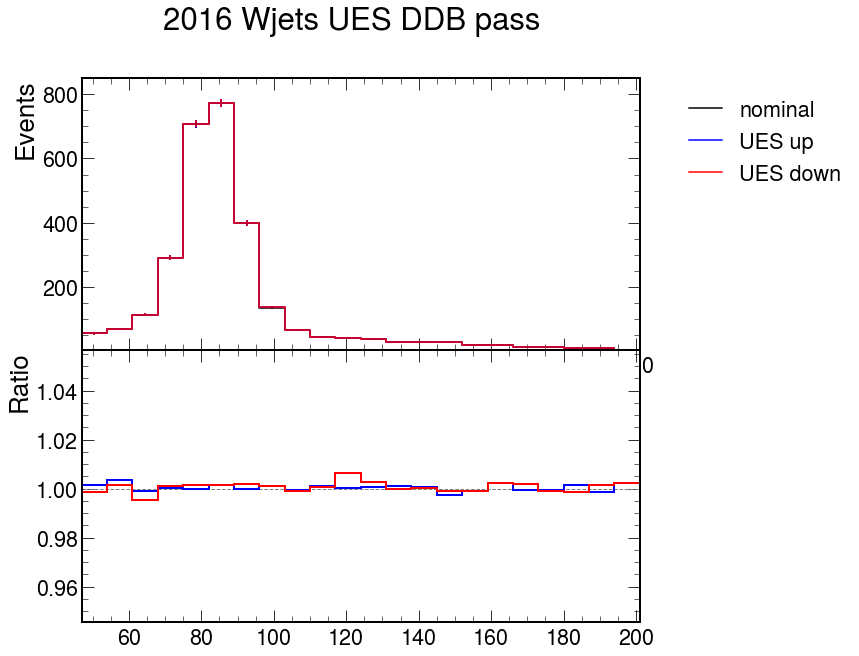

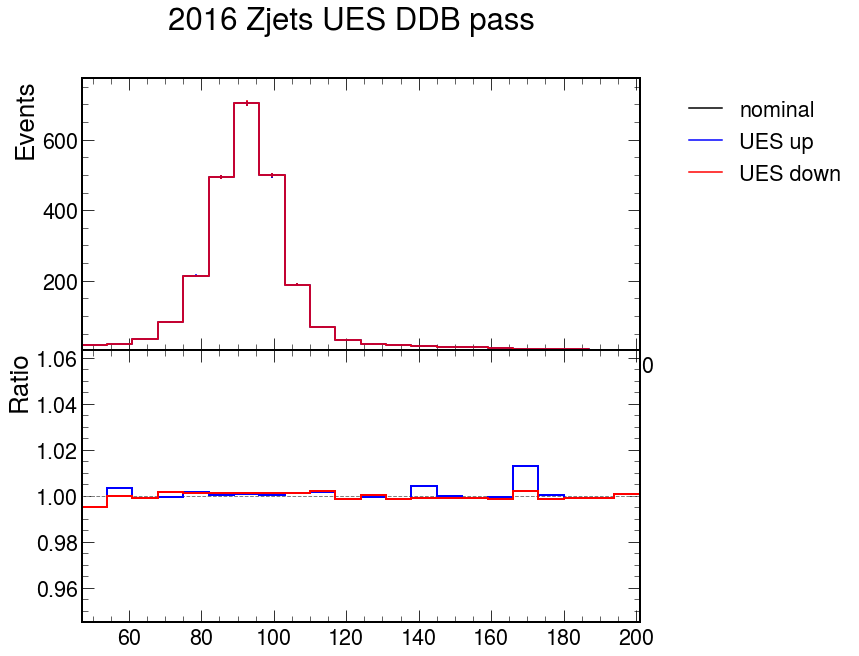

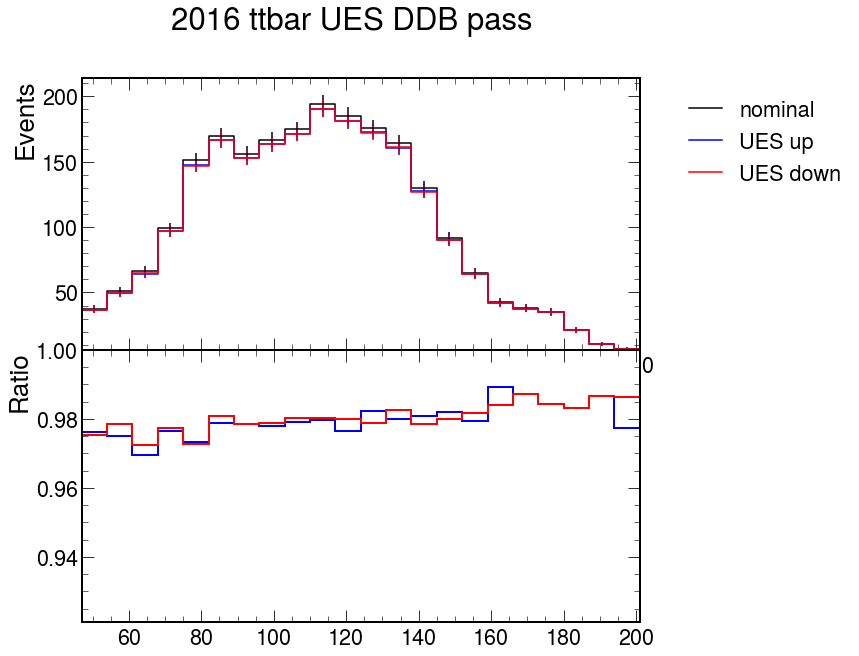

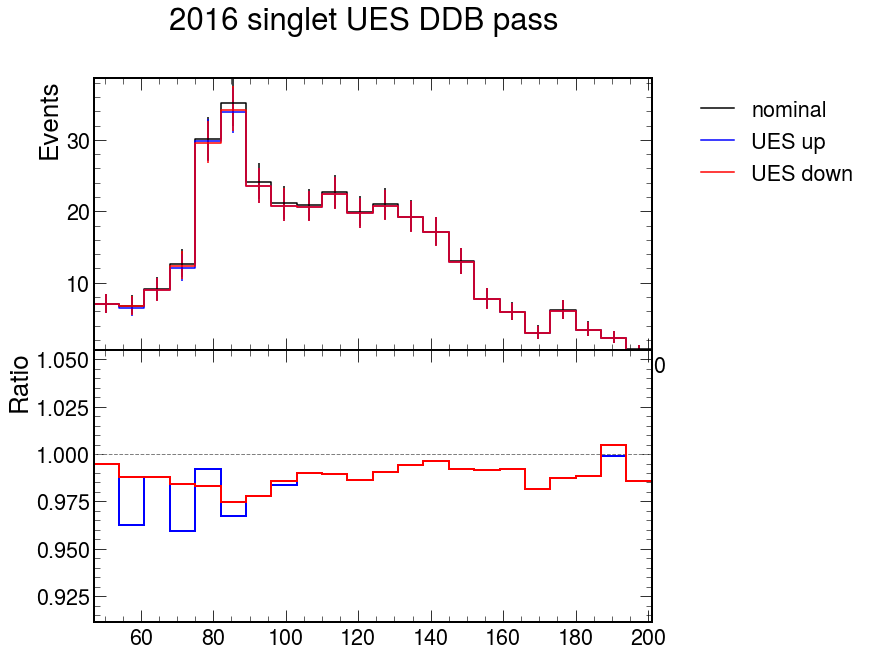

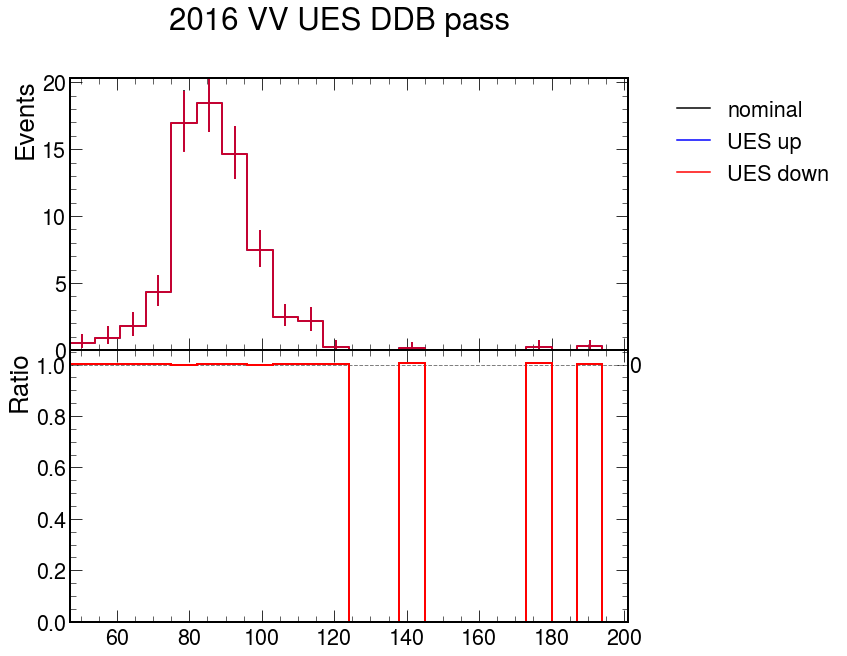

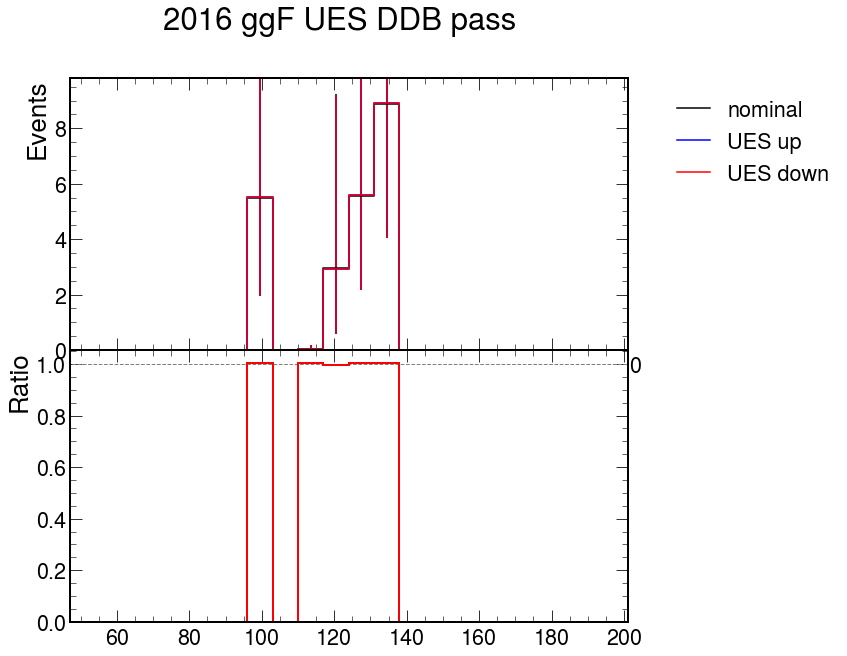

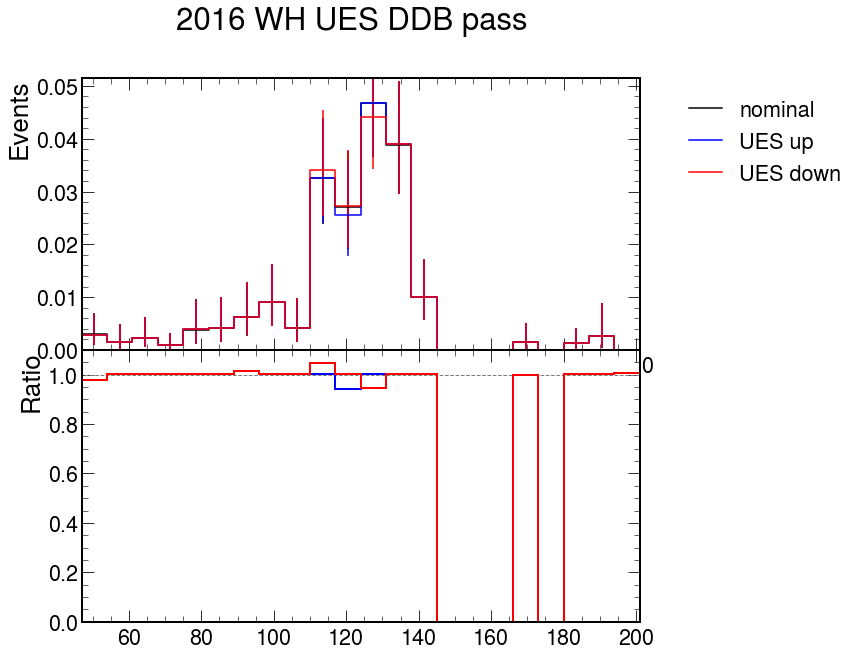

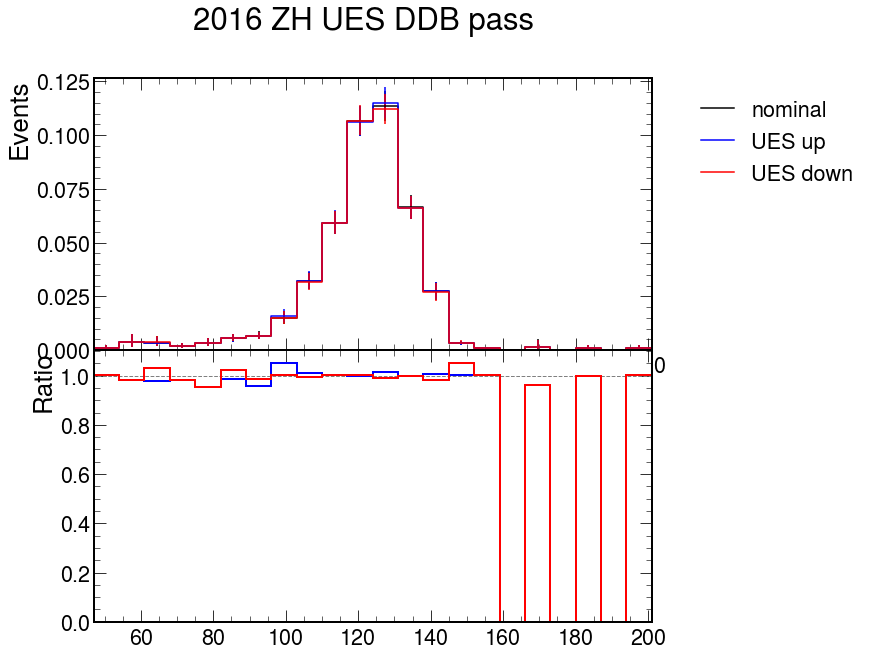

In [17]:
for p in mc:
    plot_syst(g.integrate('process',p),'UES',year + ' ' + p + ' UES DDB pass', year+'/syst_UES/'+p+"_pass")

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw 

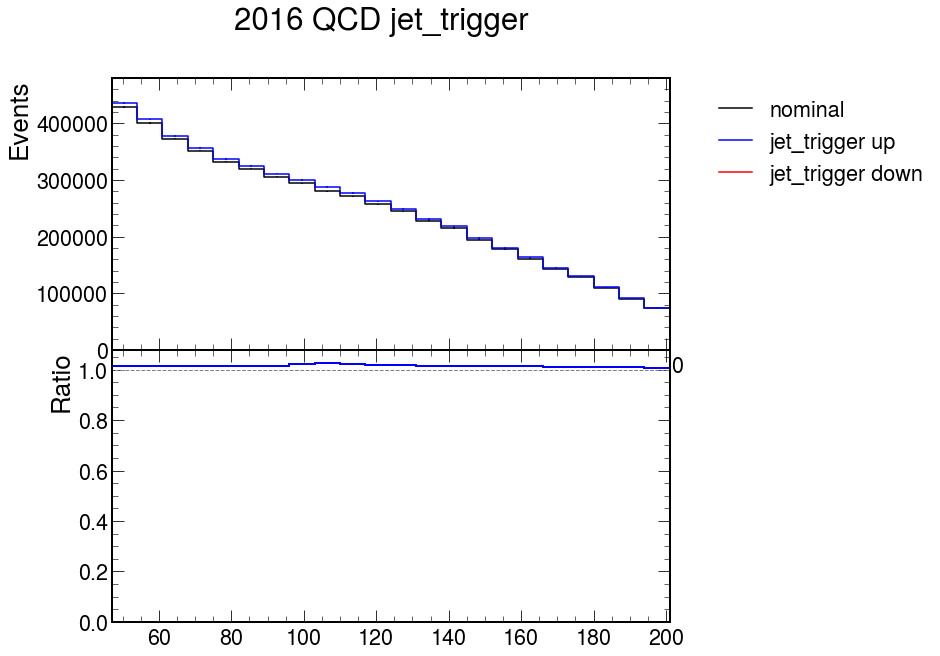

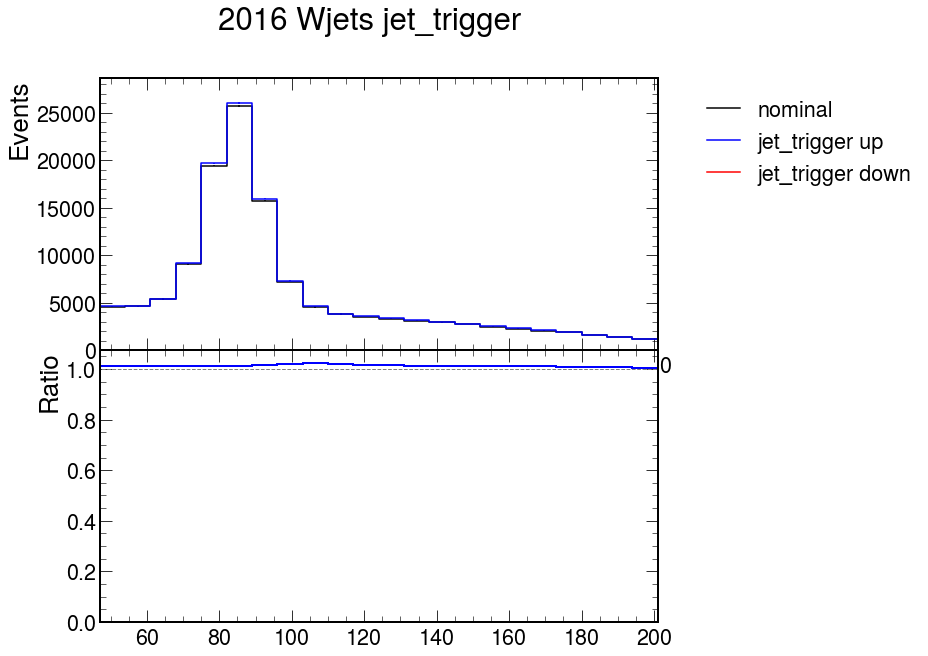

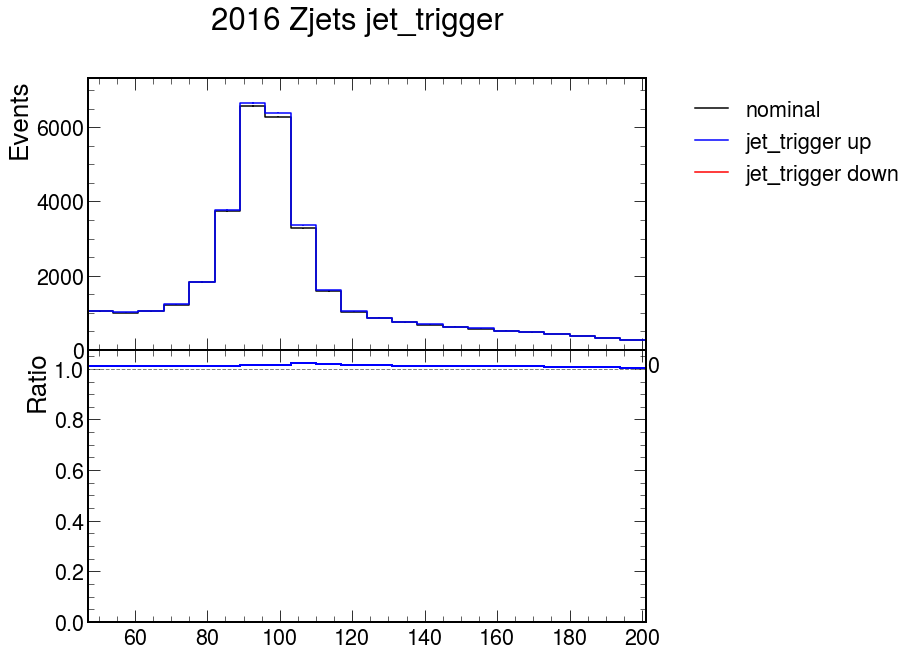

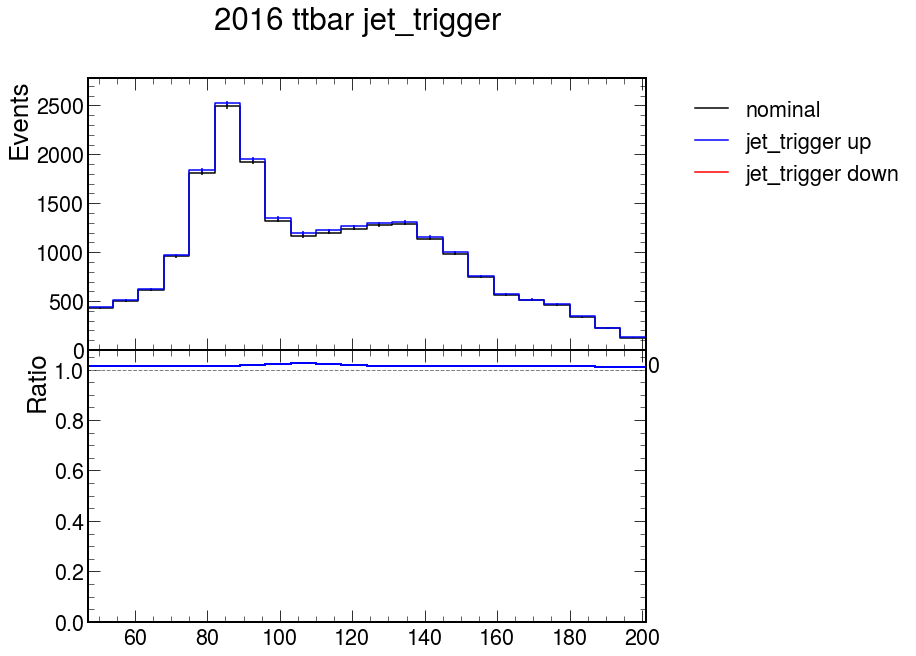

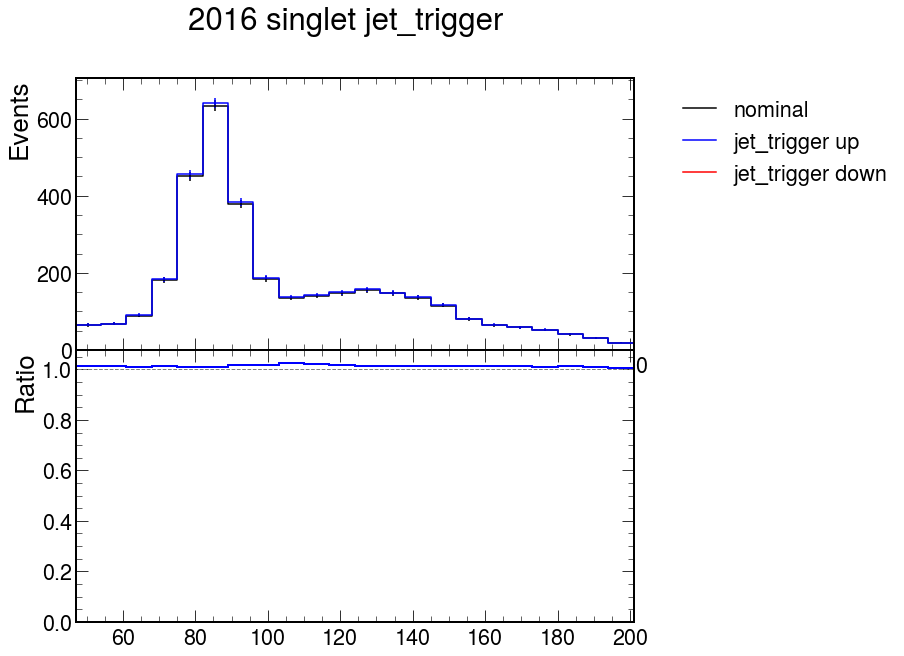

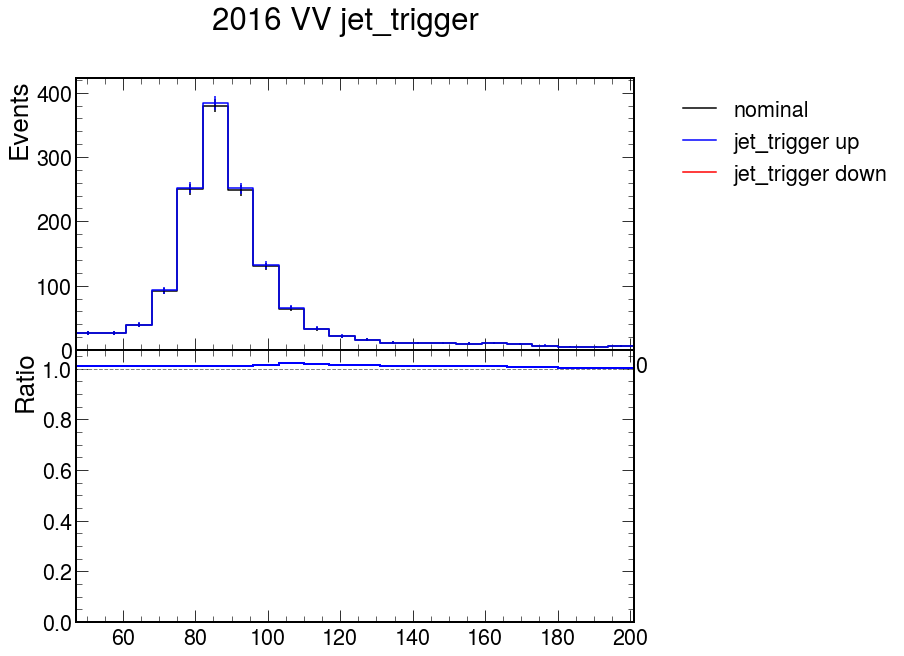

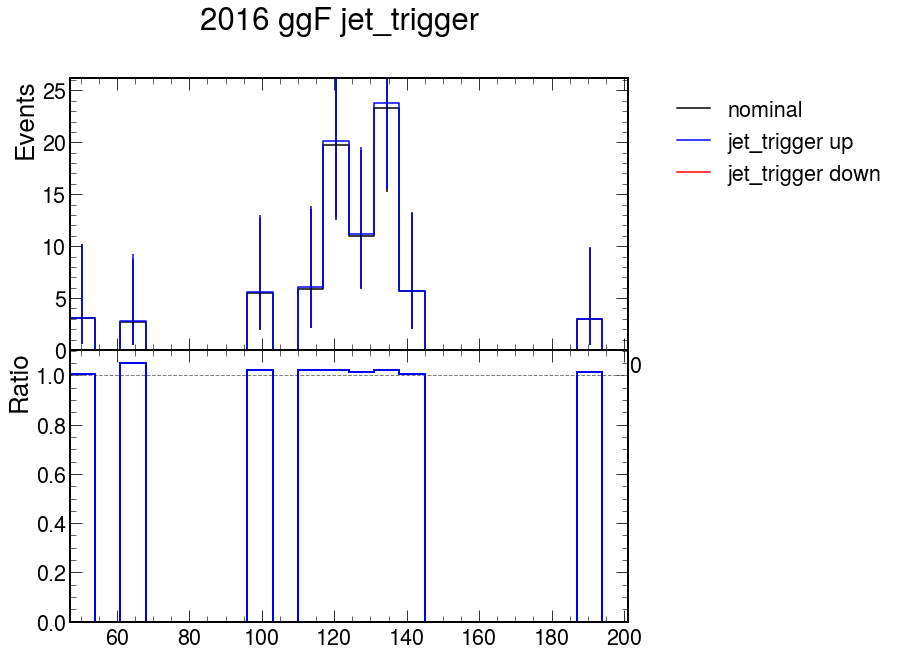

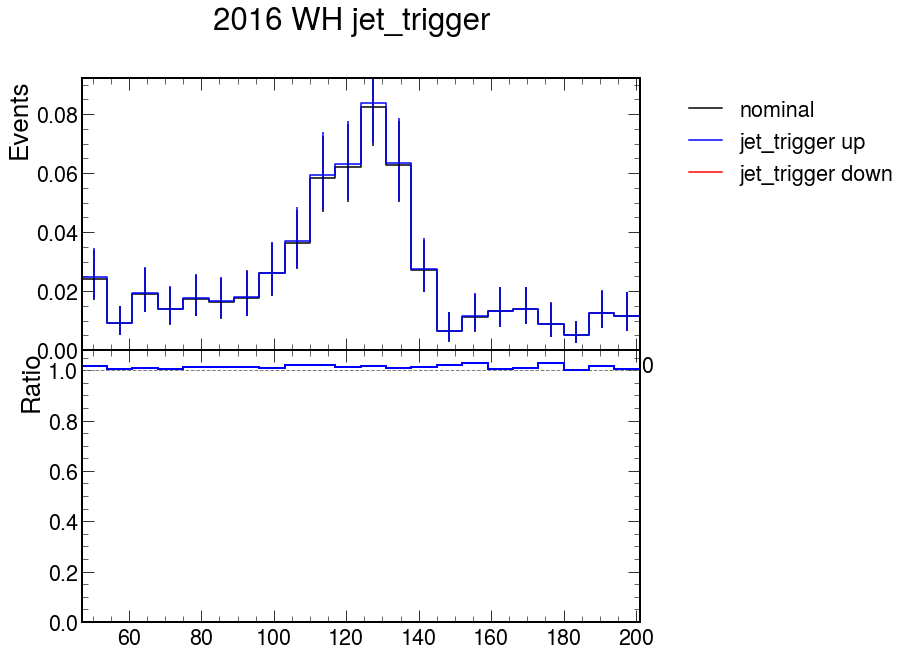

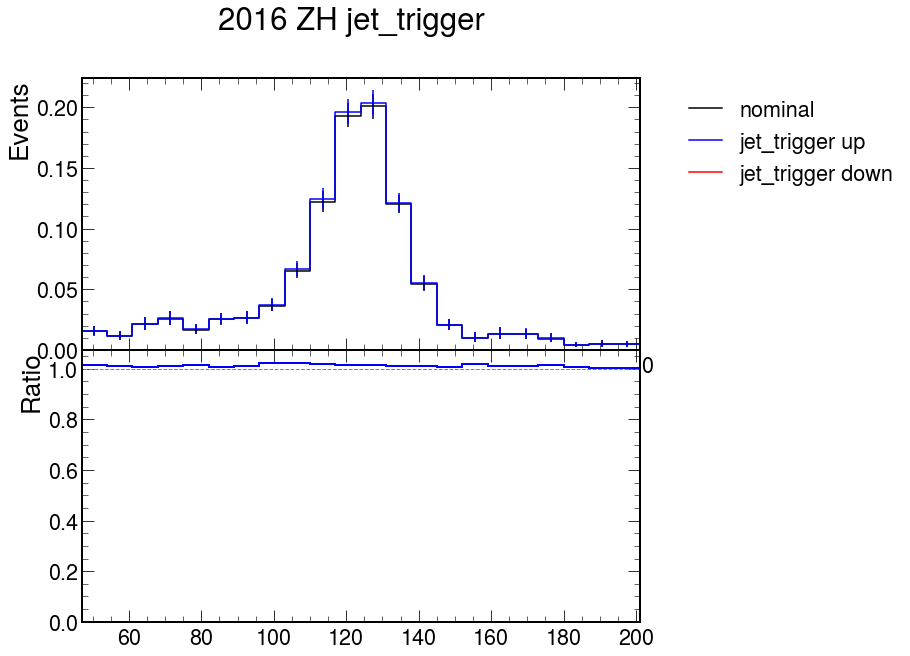

In [18]:
for p in mc:
    plot_syst(h.integrate('process',p),'jet_trigger',year+' '+p +' jet_trigger',year+'/syst_jet_trigger/'+p)

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw 

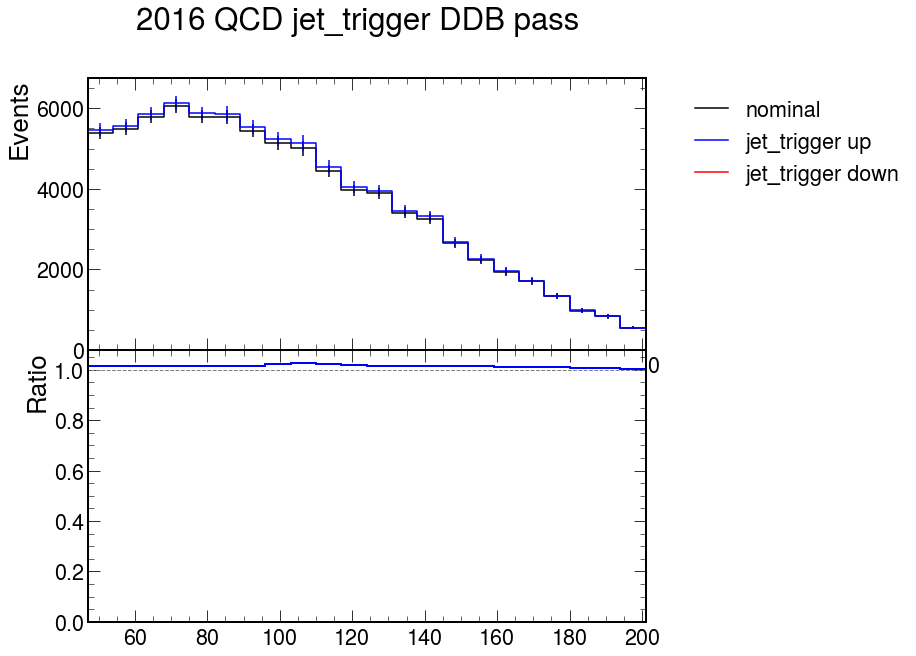

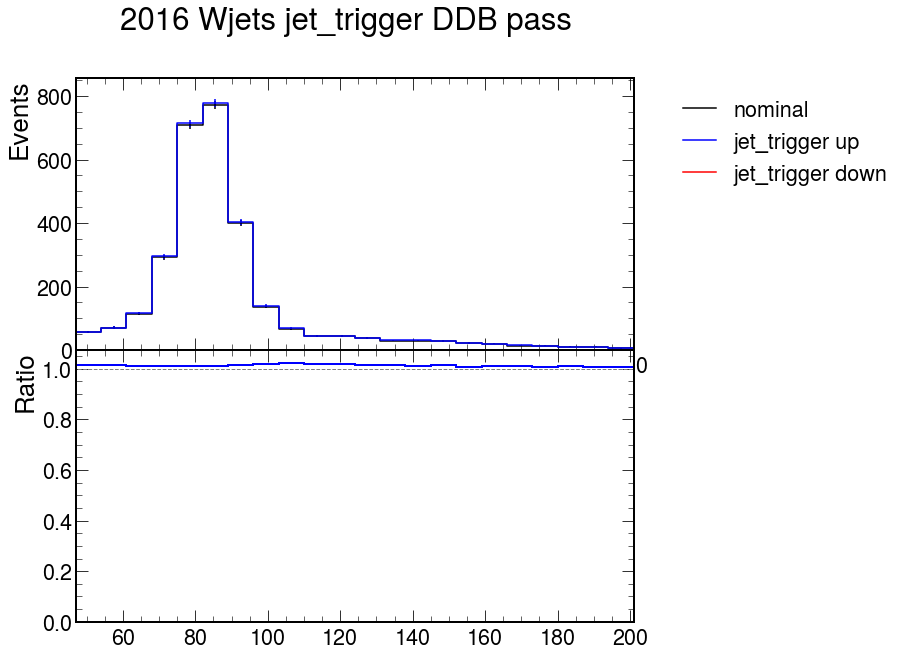

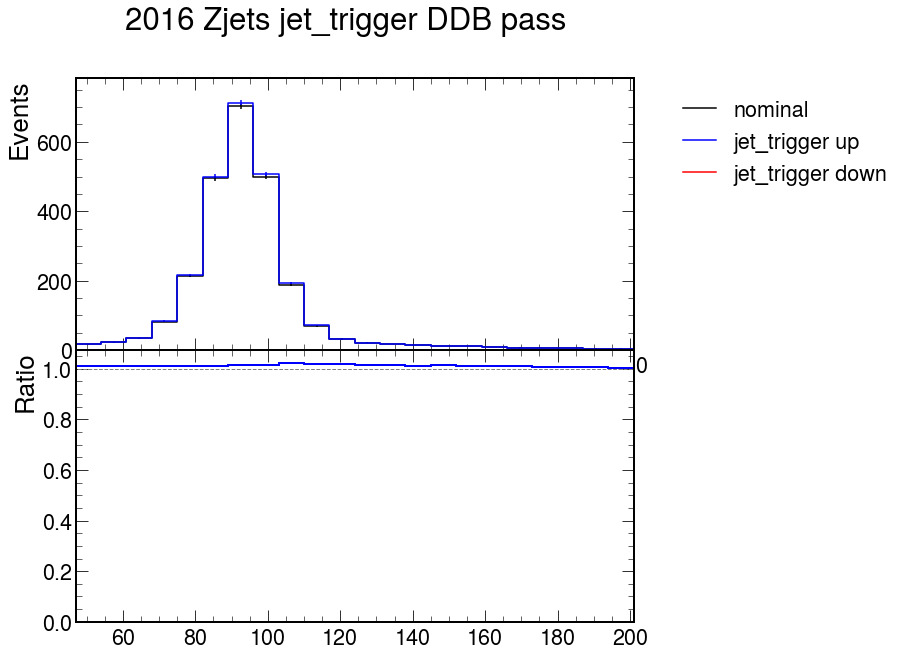

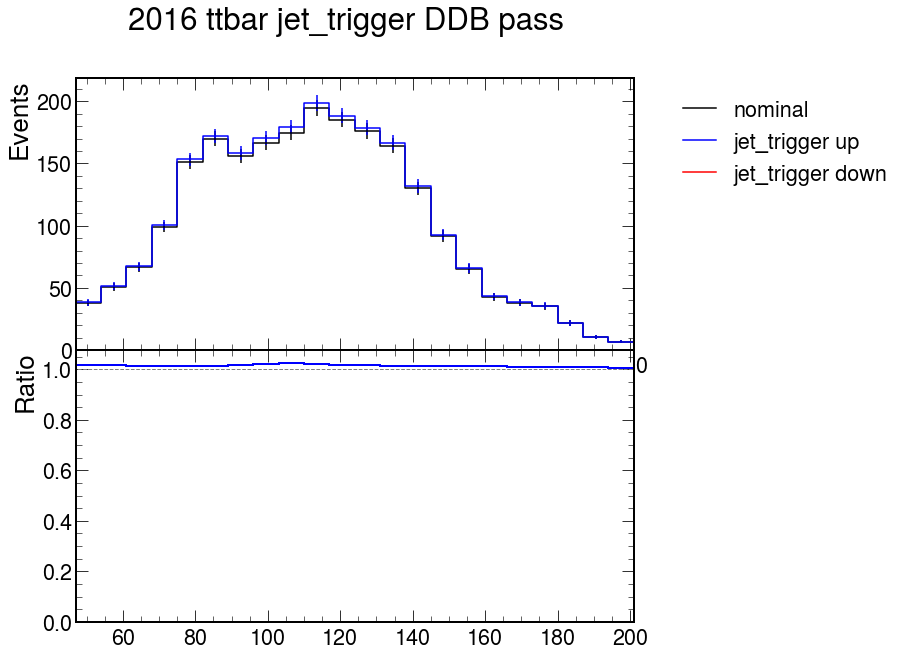

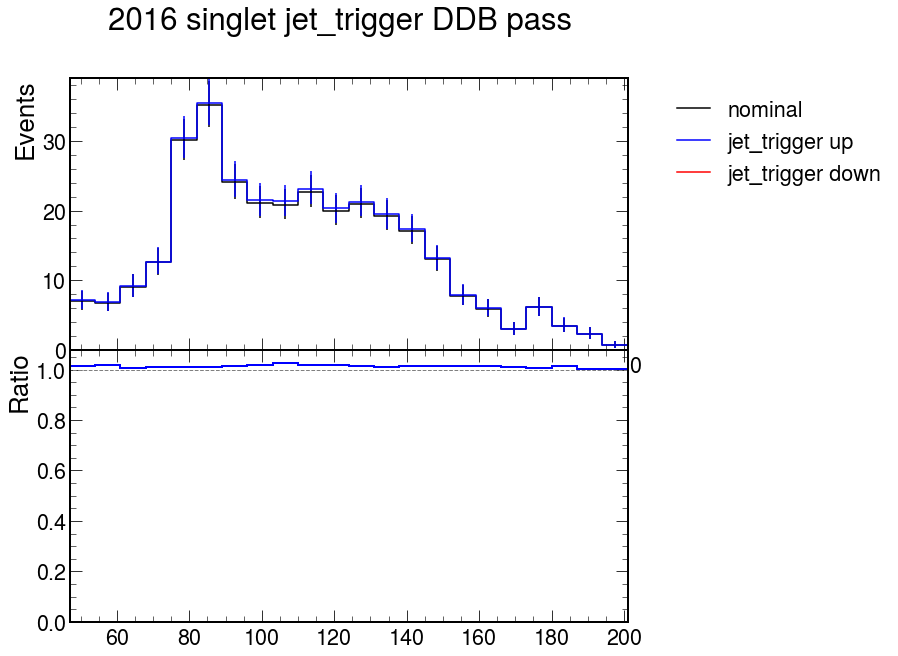

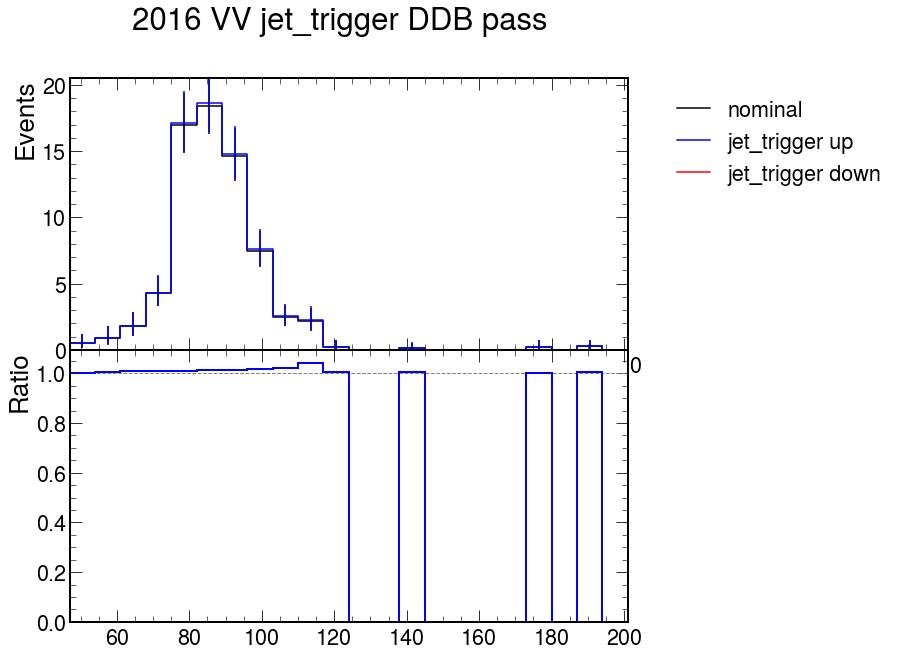

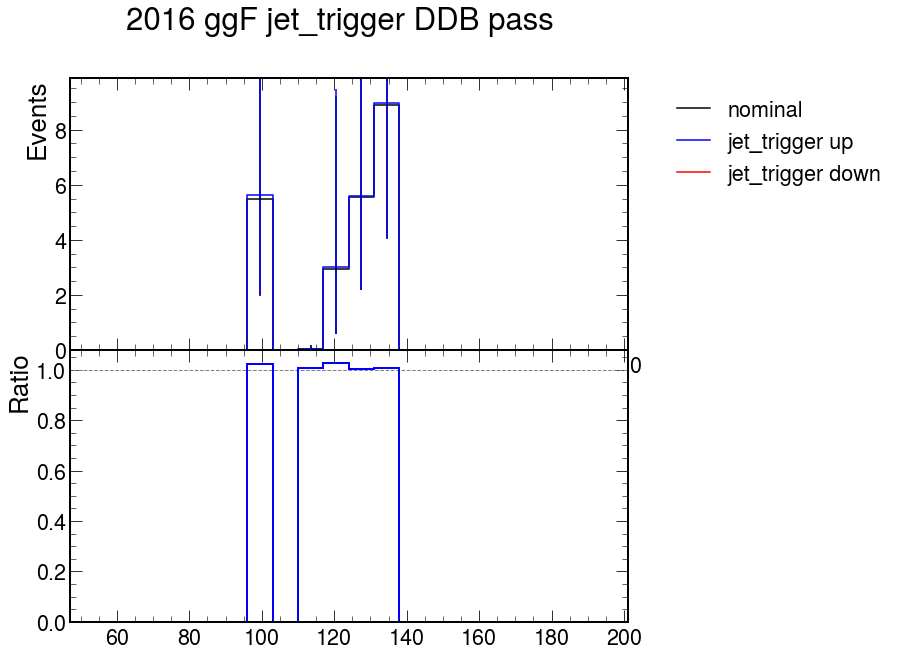

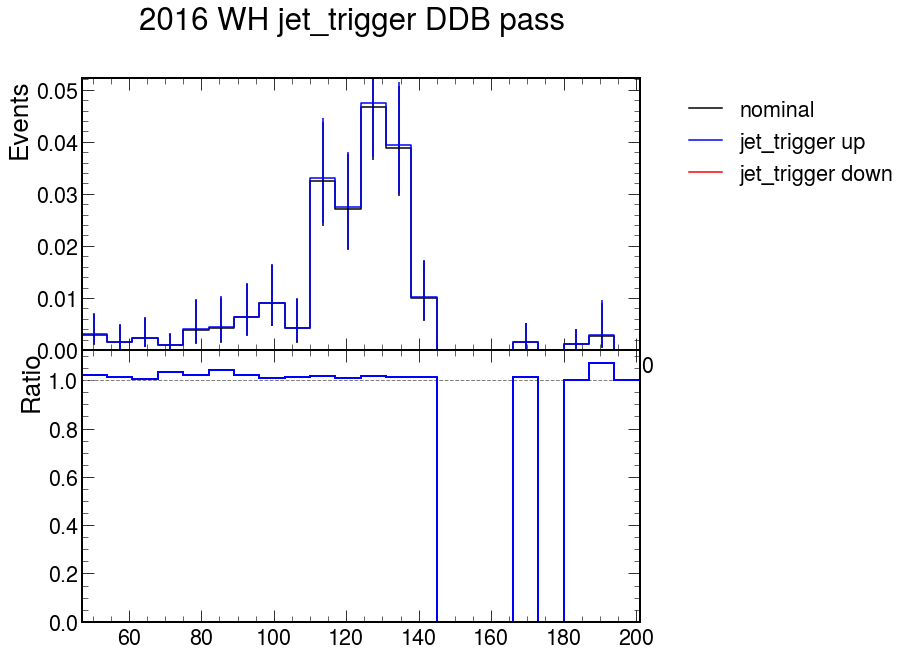

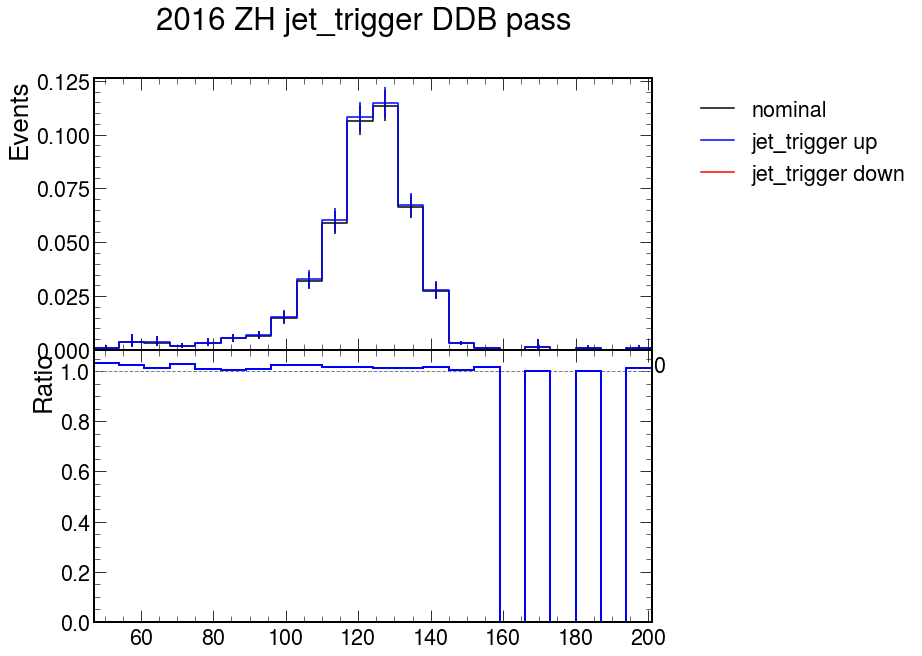

In [19]:
for p in mc:
    plot_syst(g.integrate('process',p),'jet_trigger',year + ' ' + p + ' jet_trigger DDB pass', year+'/syst_jet_trigger/'+p+"_pass")

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])


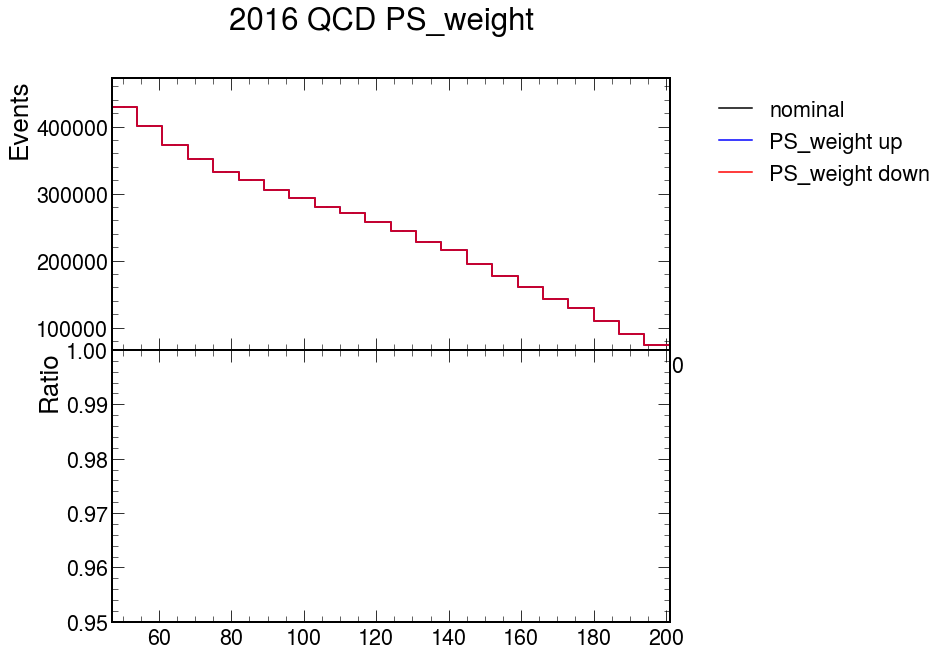

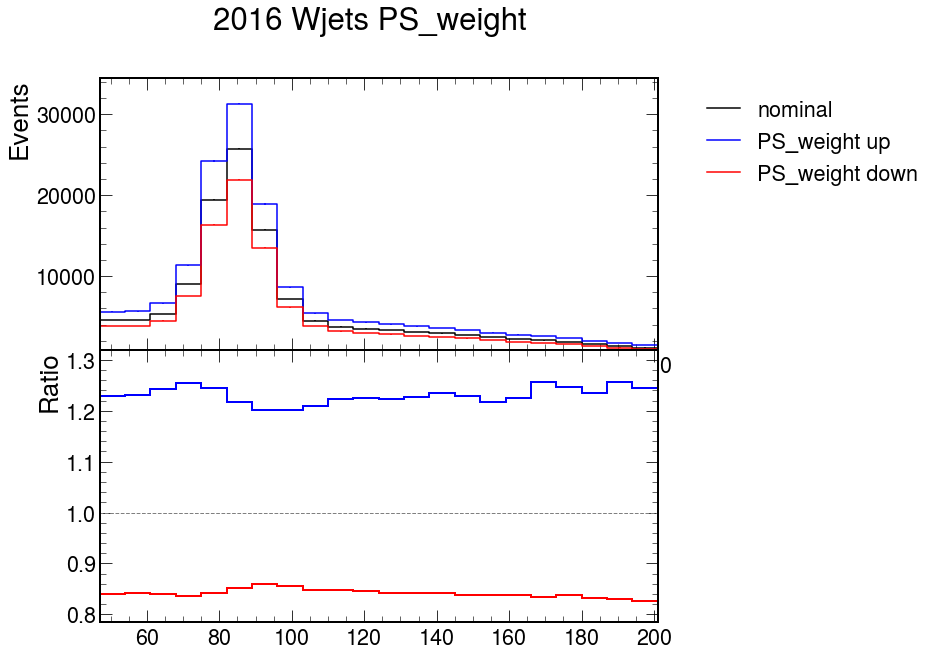

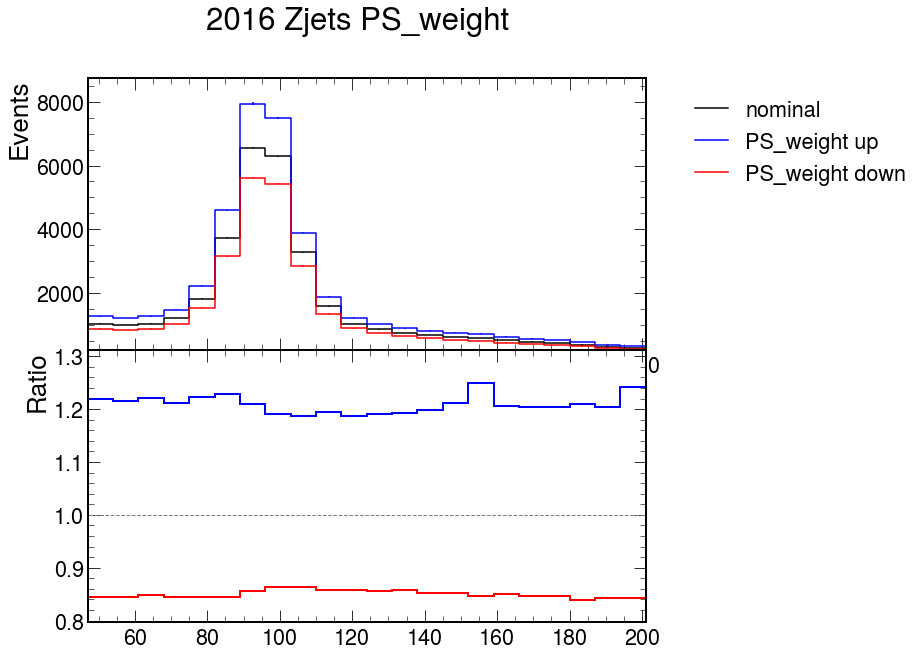

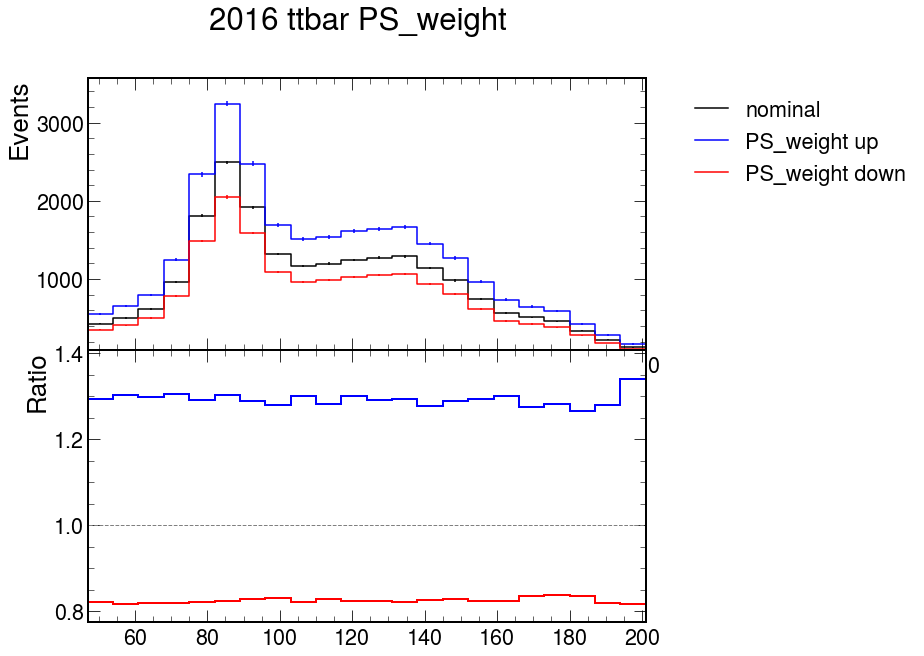

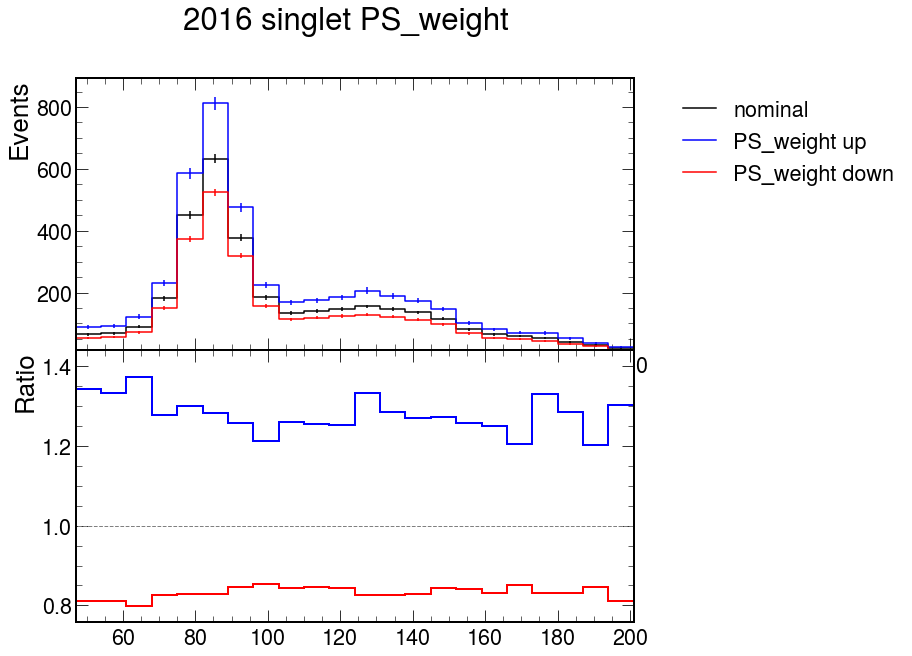

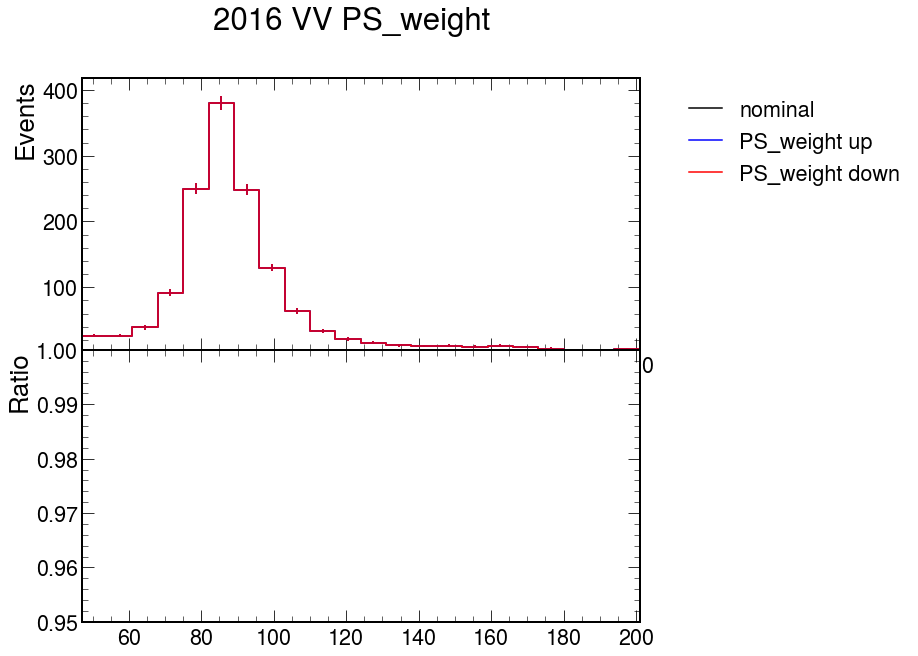

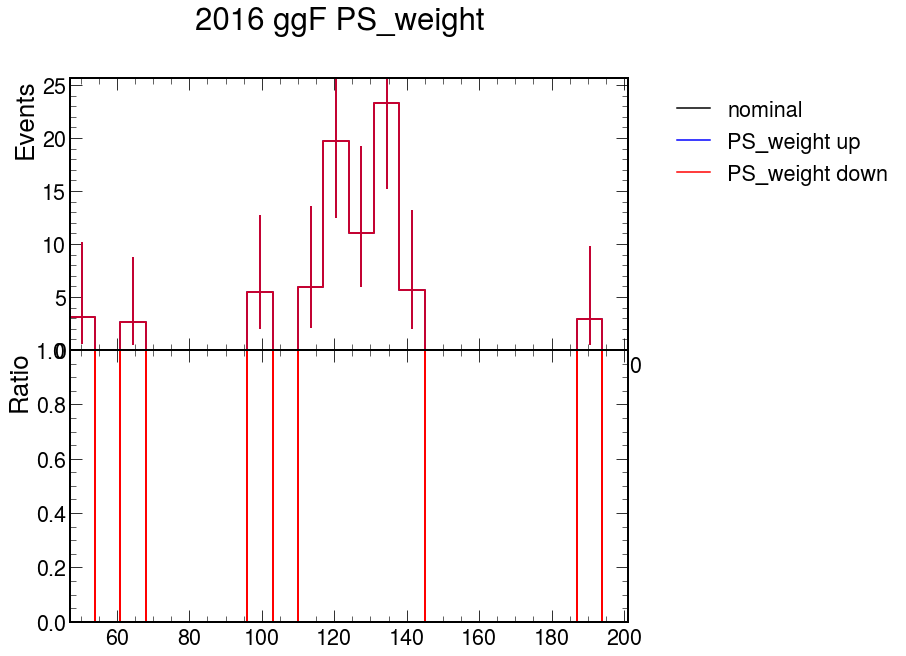

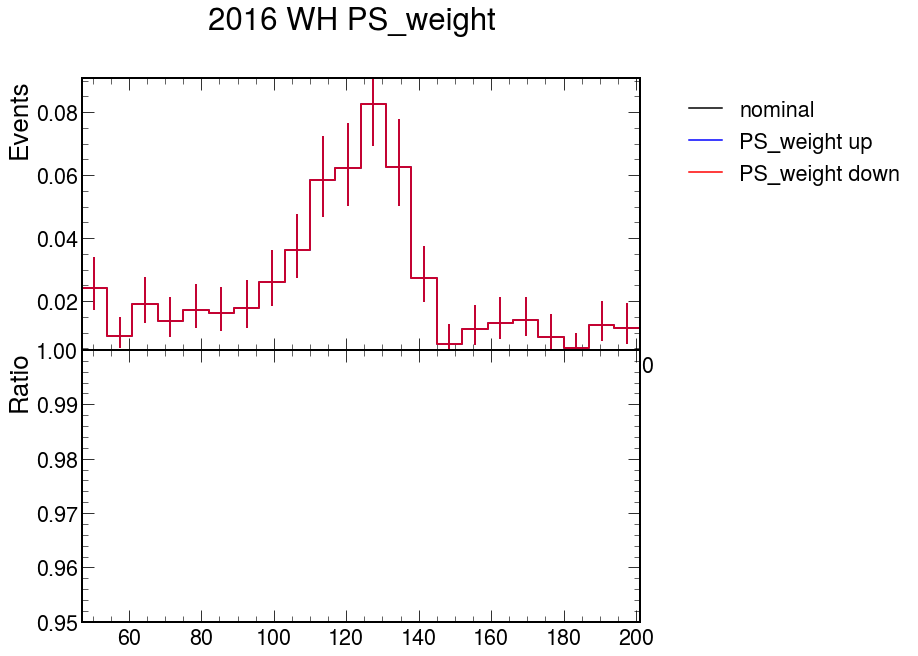

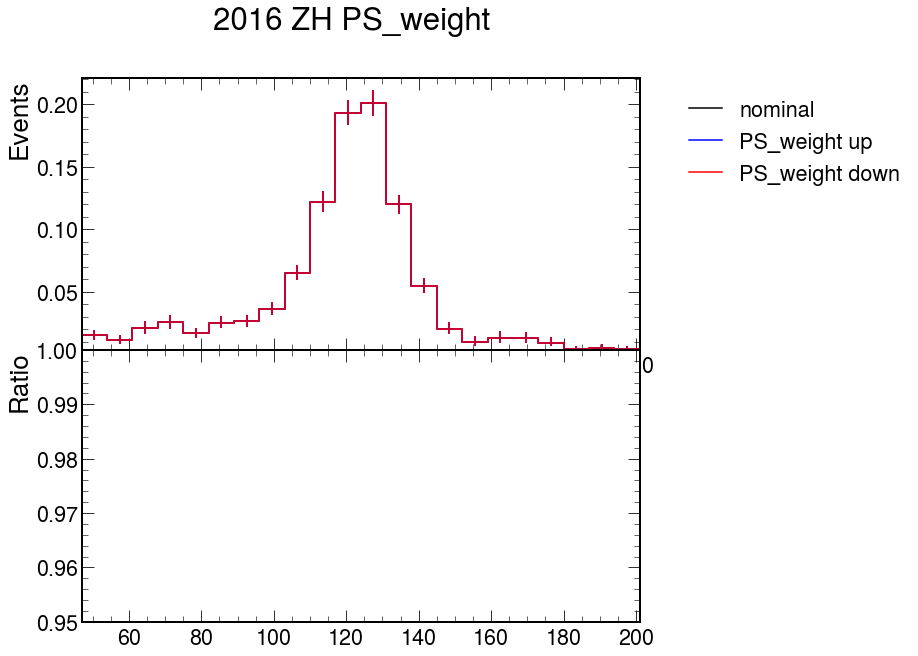

In [20]:
for p in mc:
    plot_syst(h.integrate('process',p),'PS_weight',year+' '+p+' PS_weight',year+'/syst_PS_weight/'+p)

/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/inclusive/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i i

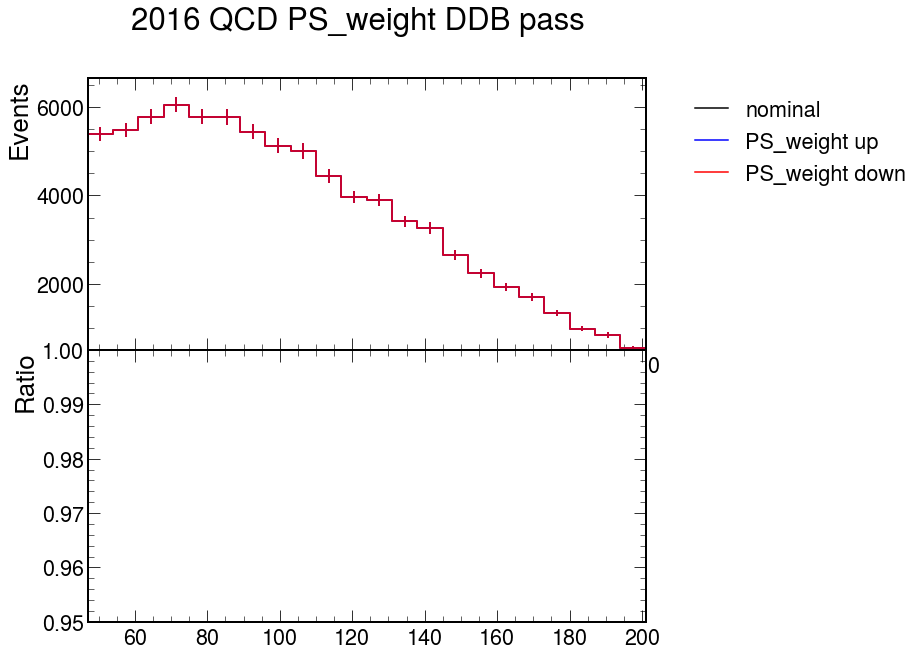

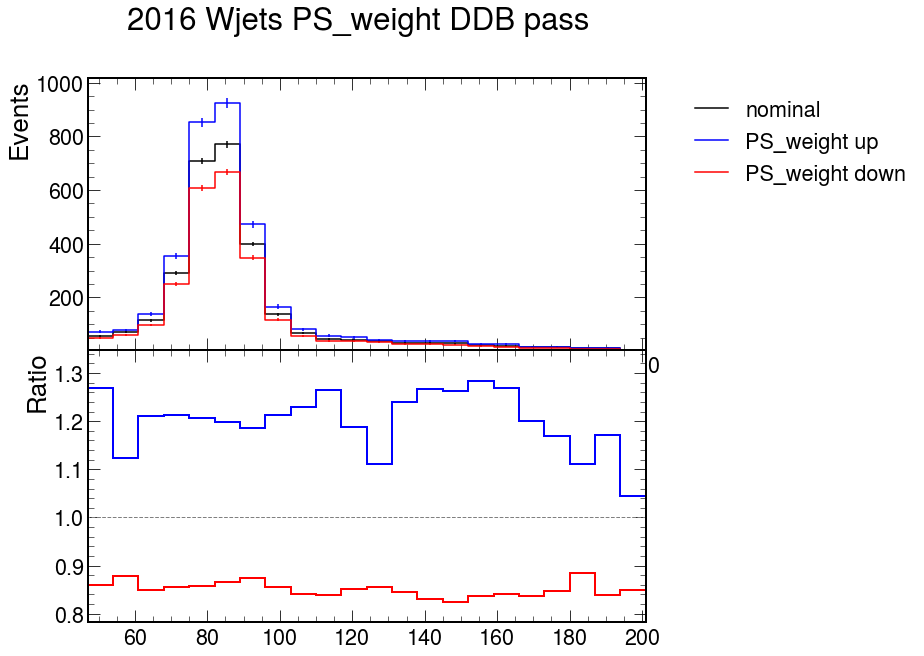

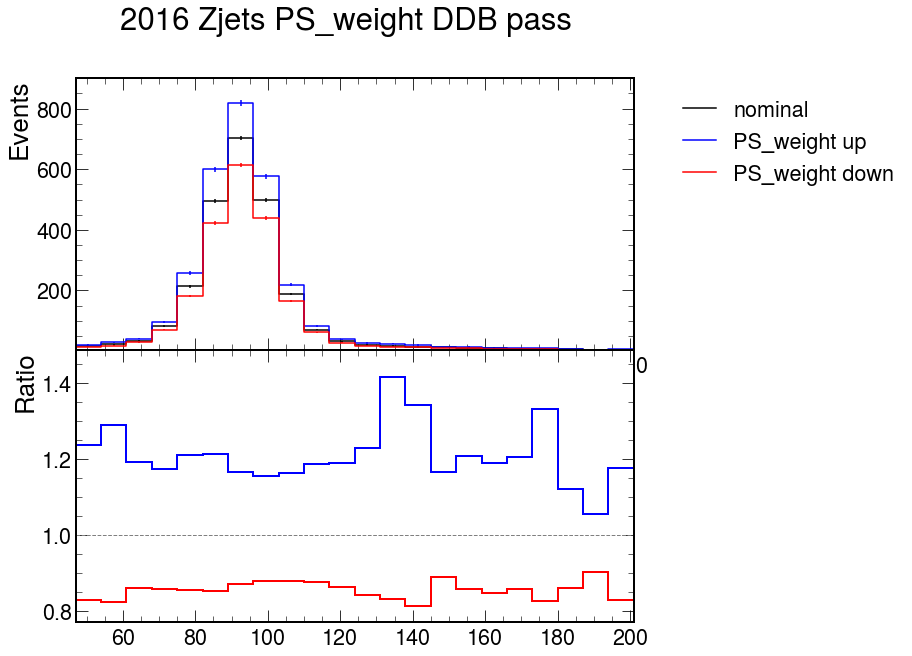

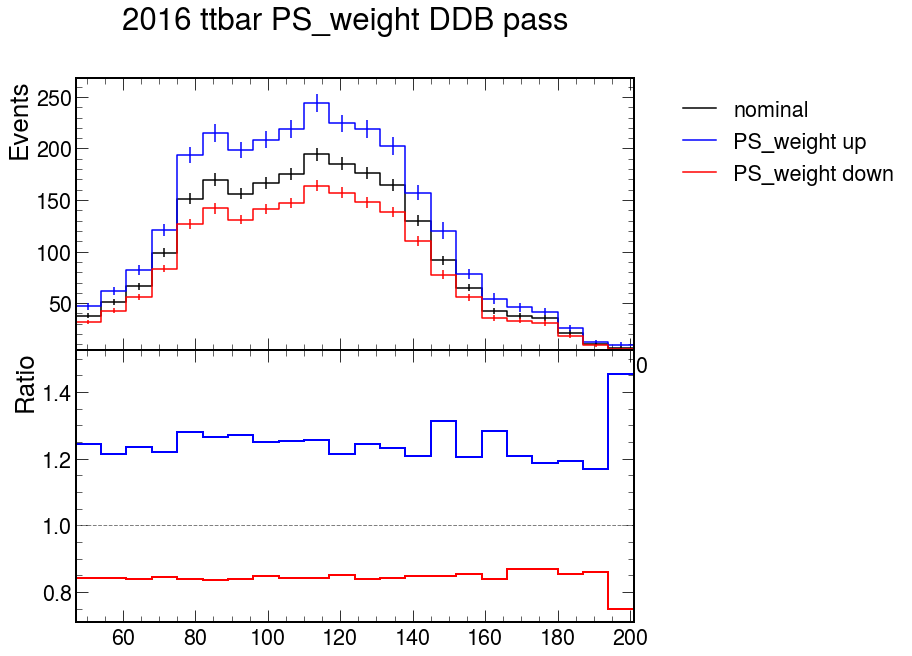

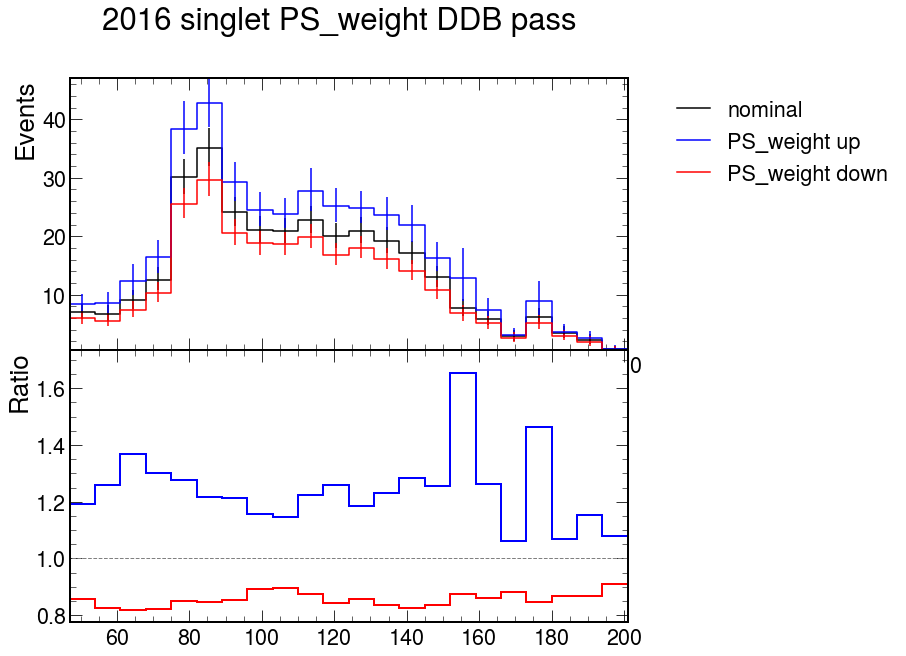

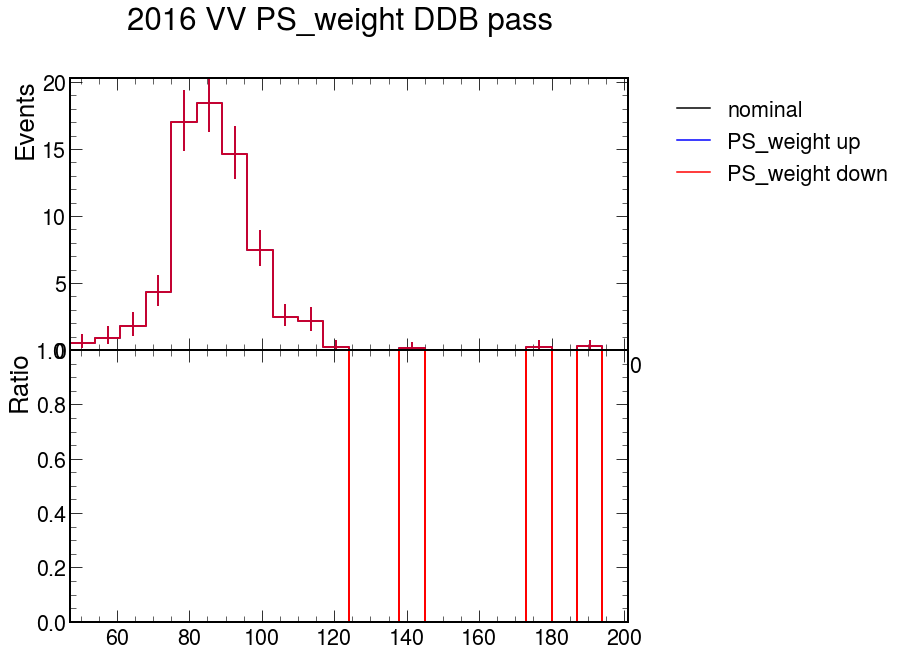

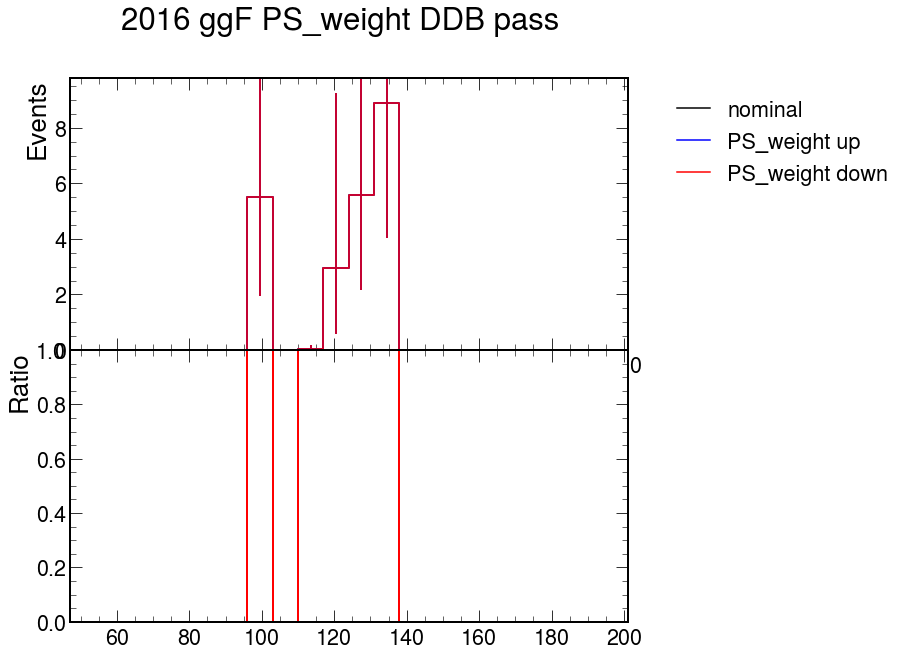

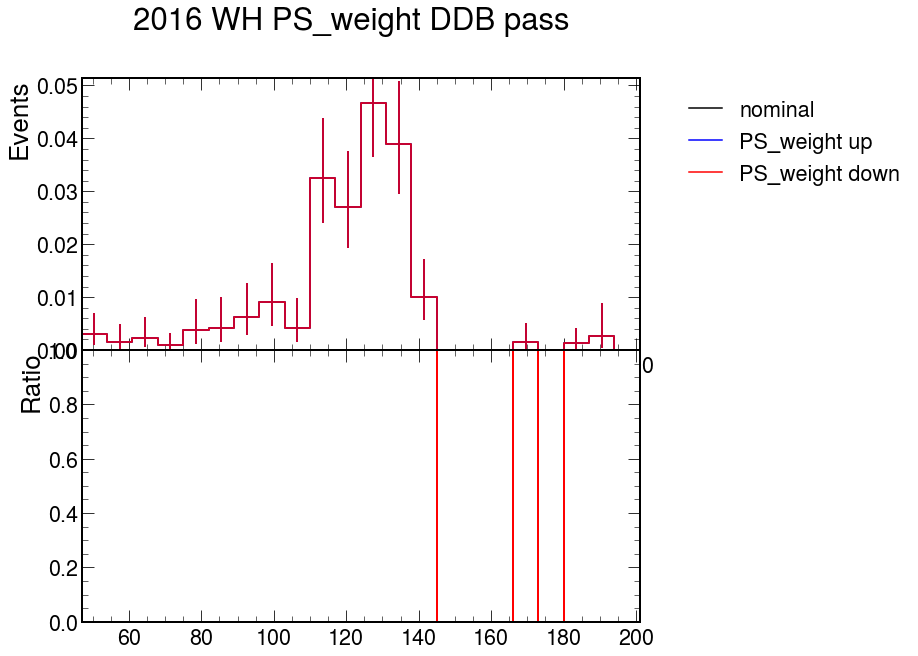

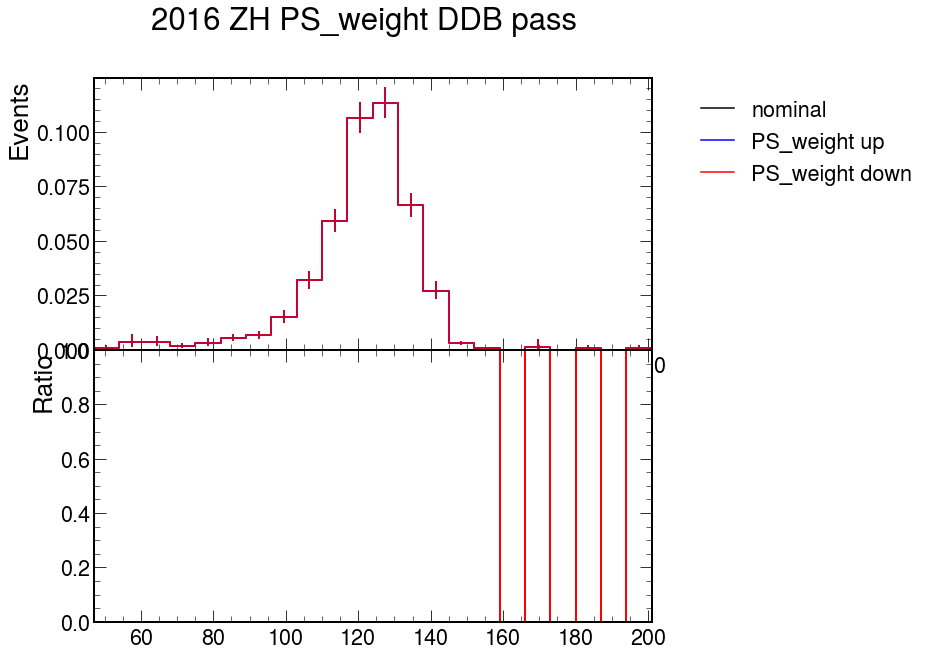

In [21]:
for p in mc:
    plot_syst(g.integrate('process',p),'PS_weight',year + ' ' + p + ' PS_weight DDB pass', year+'/syst_PS_weight/'+p+"_pass")